# Data Science - Préparer des données pour un organisme de santé publique

# Auteur : Mme Maty KANE

# Date : le 17 décembre 2024

# __________________________________________________________________________________________

# PREMIERE PARTIE : NETTOYAGE DES DONNEES

# __________________________________________________________________________________________

## SOMMAIRE

### [INTRODUCTION](#INTRODUCTION)
- [Contexte](#Contexte)
- [Objectifs](#Objectifs)

### [ETAPE 1 : NETTOYAGE ET FILTRAGE DES FEATURES ET PRODUITS](#ETAPE-1-:-NETTOYAGE-ET-FILTRAGE-DES-FEATURES-ET-PRODUITS)
- [1. Chargement des données](#Chargement-des-données)
  - [1.1. Importation des Bibliothèques](#Importation-des-Bibliothèques)
  - [1.2. Importation du jeu de données](#Importation-du-jeu-de-données)
      - [a) Chargement des données](#Chargement-des--données)
      - [b) Dimensions du dataset](#(nombre-de-lignes-et-de-colonnes))
      - [c) Résumé des variables qualitatives](#Résumé-des-variables-qualitatives)
      - [d) Résumé des variables quantitatives](#Résumé-des-variables-quantitatives)
      - [e) Types de données](#Types-de-données)
      - [f) Conversion des caractéristiques de date et heure en type datetime pour faciliter les analyses temporelles](#Conversion-des-caractéristiques-de-date-et-heure-en-type-datetime-pour-faciliter-les-analyses-temporelles)
      - [g) Conversion des variables nominales en type category](#Conversion-des-variables-nominales-en-type-category)
      - [h) Conversion des variables ordinales en type CategoricalDtype(ordered=True) (pour tenir compte de l'ordre naturel des catégories)](#Conversion-des-variables-ordinales-en-type-CategoricalDtype(ordered=True)-(pour-tenir-compte-de-l'ordre-naturel-des-catégories))
   - [1.3. Identification des variables pertinentes](#Identification-des-variables-pertinentes)
        - [a) Valeurs manquantes](#Valeurs-manquantes)
        - [b) Pourcentage des valeurs manquantes](#Pourcentage-des-valeurs-manquantes)
        - [c) Visualisation des valeurs manquantes](#Visualisation-des-valeurs-manquantes)
        - [d) Taux de remplissage du dataframe et Récupération des colonnes ayant moins de 80% de valeurs manquantes](#Taux-de-remplissage-du-dataframe-et-Récupération-des-colonnes-ayant-moins-de-80%-de-valeurs-manquantes)
        - [e) Suppression des colonnes non-pertinentes pour le projet](#Suppression-des-colonnes-non-pertinentes-pour-le-projet)
        - [f) Fréquence et Réduction des pays dans la colonne Countries](#Fréquence-et-Réduction-des-pays-dans-la-colonne-Countries)
        - [g) Exclusion des colonnes non alimentaires](#Exclusion-des-colonnes-non-alimentaires)
        - [h) Identification des colonnes clés](#Identification-des-colonnes-clés)
    - [1.4. Gestion des doublons](#Gestion-des-doublons)
    - [1.5. Identification de la cible et définition des prédicteurs (features)](#Identification-de-la-cible-et-définition-des-prédicteurs-(features))
    - [1.6. Exploration de la relation entre les variables quantitatives et qualitatives dans notre jeu de données](#Exploration-de-la-relation-entre-les-variables-quantitatives-et-qualitatives-dans-notre-jeu-de-données)
        - [a) Visualisation des distributions des variables numériques](#Visualisation-des-distributions-des-variables-numériques)
        - [b) Matrice de corrélation des variables numériques](#Matrice-de-corrélation-des-variables-numériques)
        - [c) Distribution des variables catégorielles](#Distribution-des-variables-catégorielles)
    - [1.7. Automatisation de toutes les étapes de filtrage](#Automatisation-de-toutes-les-étapes-de-filtrage)

### [ETAPE 2 : IDENTIFIER ET TRAITER LES VALEURS ABERRANTES](#ETAPE-2-:-IDENTIFIER-ET-TRAITER-LES-VALEURS-ABERRANTES)
- [1. Détection des Outliers sur toutes les colonnes](#Détection-des-Outliers-sur-toutes-les-colonnes)
- [2. Inspection manuelle des outliers sur toutes les colonnes](#Inspection-manuelle-des-outliers-sur-toutes-les-colonnes)
- [3. Traitement des valeurs aberrantes par colonne](#Traitement-des-valeurs-aberrantes-par-colonne)
    - [3.1. Traitement de la colonne 'energy_100g'](#Traitement-de-la-colonne-'energy_100g')
    - [3.2. Traitement de la colonne 'saturated-fat_100g'](#Traitement-de-la-colonne-'saturated-fat_100g')
    - [3.3. Traitement de la colonne 'fat_100g'](#Traitement-de-la-colonne-'fat_100g')
    - [3.4. Traitement de la colonne 'carbohydrates_100g'](#Traitement-de-la-colonne-'carbohydrates_100g')
    - [3.5. Traitement de la colonne 'sugars_100g'](#Traitement-de-la-colonne-'sugars_100g')
    - [3.6. Traitement de la colonne 'fiber_100g'](#Traitement-de-la-colonne-'fiber_100g')
    - [3.7. Traitement de la colonne 'proteins_100g'](#Traitement-de-la-colonne-'proteins_100g')
    - [3.8. Traitement de la colonne 'salt_100g'](#Traitement-de-la-colonne-'salt_100g')
- [4. Automatisation des étapes d'identification et de traitement des valeurs aberrantes](#Automatisation-des-étapes-d'identification-et-de-traitement-des-valeurs-aberrantes)

### [ETAPE 3 : TRAITEMENT DES VALEURS MANQUANTES](#ETAPE-3-:-TRAITEMENT-DES-VALEURS-MANQUANTES)
- [1. Identification des valeurs manquantes](#Identification-des-valeurs-manquantes)
- [2. Visualisation des valeurs manquantes](#Visualisaion-des-valeurs-manquantes)
- [3. Traitement des valeurs manquantes](#Traitement-des-valeurs-manquantes)
    - [3.1. Traitement de la colonne 'product_name'](#Traitement-de-la-colonne-'product_name')
    - [3.2. Traitement de la colonne 'energy_100g'](#Traitement-de-la-colonne-'energy_100g')
    - [3.3. Traitement de la colonne 'saturated-fat_100g'](#Traitement-de-la-colonne-'saturated-fat_100g')
    - [3.4. Traitement de la colonne 'sugars_100g'](#Traitement-de-la-colonne-'sugars_100g')
    - [3.5. Traitement de la colonne 'proteins_100g'](#Traitement-de-la-colonne-'proteins_100g')
    - [3.6. Traitement de la colonne 'salt_100g'](#Traitement-de-la-colonne-'salt_100g')
    - [3.7. Traitement de la colonne 'fat_100g'](#Traitement-de-la-colonne-'fat_100g')
    - [3.8. Traitement de la colonne 'carbohydrates_100g'](#Traitement-de-la-colonne-'carbohydrates_100g')
    - [3.9. Traitement de la colonne 'fiber_100g'](#Traitement-de-la-colonne-'fiber_100g')
- [4. Dataframe final](#Dataframe-final)
    - [4.1. Extraction de X et y de data_filtrée_pertinente](#Extraction-de-X-et-y-de-data_filtrée_pertinente)
    - [4.2. Vérification du taux de remplissage final après nettoyage et imputation](#Vérification-du-taux-de-remplissage-final-après-nettoyage-et-imputation)
    - [4.3. Sauvegarde](#Sauvegarde)


# __________________________________________________________________________________________

# INTRODUCTION <a id="INTRODUCTION"></a>

## Contexte <a id="Contexte"></a>

Open Food Facts est une base de données open-source sur les produits alimentaires, et elle comprend une grande variété de colonnes, certaines textuelles, d'autres numériques, sur des informations telles que les ingrédients, la nutrition, les additifs, les catégories, les marques, etc.

l'agence Santé publique France souhaite améliorer le processus de saisie des données dans la base Open Food Facts en créant un système de suggestion ou d'auto-complétion des données.

Notre mission est de nettoyer et explorer des données en interne, afin de déterminer la faisabilité de cette idée d’application de Santé publique France. 

### Objectifs <a id="Objectifs"></a>

Objectifs à atteindre dans cette phase de nettoyage :

Préparer un dataset propre et exploitable pour entraîner un modèle qui prédit ou complète la variable cible

Avoir un processus automatisé pour nettoyer et filtrer les données.

# __________________________________________________________________________________________

# ETAPE 1 : NETTOYAGE ET FILTRAGE DES FEATURES ET PRODUITS <a id="ETAPE 1-:-NETTOYAGE-ET-FILTRAGE-DES-FEATURES-ET-PRODUITS"></a>

# 1. Chargement des Données <a id="Chargement-des-données"></a>

## 1.1. Importation des Bibliothèques <a id="Importation-des-Bibliothèques-et-jeux-de-données"></a>

In [623]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import requests
import time

## 1.2. Importation et description du jeu de données <a id="Importation-et-description-du-jeu-de-données"></a>

#### a) Chargement des données <a id="Chargement-des-données"></a>

In [627]:
data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep='\t')

C:\Users\matym\AppData\Local\Temp\ipykernel_952\1774790906.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep='\t')


Le fichier utilise une tabulation (\t) comme séparateur entre les colonnes, au lieu de la virgule (qui est le séparateur par défaut dans les fichiers CSV).

Sans cet argument, pandas interpréterait par défaut les virgules comme séparateurs (sep=','), ce qui peut être problématique.

#### b) Dimensions du dataset (nombre de lignes et de colonnes) <a id="Dimensions-du-dataset"></a>

In [630]:
data.shape

(290937, 162)

Ce jeu de données contient 290937 lignes et 162 colonnes.

#### c) Résumé des variables qualitatives <a id="Résumé-des-variables-qualitatives"></a>

In [633]:
data.describe(exclude=[np.number])

code                                                url  \
count   290914                                             290914   
unique  290805                                             290914   
top      11778  http://world-fr.openfoodfacts.org/produit/0000...   
freq         2                                                  1   

                creator   created_t      created_datetime  last_modified_t  \
count            290935      290934                290928           290937   
unique             3208      162383                162326           156519   
top     usda-ndb-import  1489055829  2017-03-09T10:37:09Z       1439141742   
freq             168465          20                    20               33   

       last_modified_datetime product_name  \
count                  290937       277930   
unique                 156395       201335   
top      2015-08-09T17:35:42Z    Ice Cream   
freq                       33          409   

                                             generic_name quantity  \
count                                               44179    86911   
unique                                              32745    11851   
top     Pâtes alimentaires au blé dur de qualité supér...    500 g   
freq                                                  178     3810   

               packaging    packaging_tags     brands brands_tags  \
count              67071             67072     269996      269990   
unique             12735             10580      52087       44848   
top     Sachet,Plastique  sachet,plastique  Carrefour   carrefour   
freq                1977              3531       2918        3084   

                                        categories  \
count                                        71986   
unique                                       32126   
top     Snacks sucrés,Biscuits et gâteaux,Biscuits   
freq                                           270   

                                          categories_tags  \
count                                               71965   
unique                                              18493   
top     en:sugary-snacks,en:biscuits-and-cakes,en:bisc...   
freq                                                  674   

                                     categories_fr origins origins_tags  \
count                                        71987   18306        18274   
unique                                       18503    4207         3808   
top     Snacks sucrés,Biscuits et gâteaux,Biscuits  France       france   
freq                                           674    5038         5163   

       manufacturing_places manufacturing_places_tags  \
count                 29822                     29818   
unique                 5981                      5613   
top                  France                    france   
freq                   9115                      9195   

                                                   labels  \
count                                               39383   
unique                                              15796   
top     Organic, EU Organic, fr:AB Agriculture Biologique   
freq                                                 2948   

                                              labels_tags  \
count                                               39451   
unique                                              11937   
top     en:organic,en:eu-organic,fr:ab-agriculture-bio...   
freq                                                 4951   

                                         labels_fr   emb_codes emb_codes_tags  \
count                                        39473       25538          25535   
unique                                       11939        6783           6636   
top     Bio,Bio européen,AB Agriculture Biologique  EMB 56251E     emb-56251e   
freq                                          4951         216            216   

       first_packaging_code_geo cities            cities_tags purchase_places  \
count  

#### d) Résumé des variables quantitatives <a id="Résumé-des-variables-quantitatives"></a>

In [635]:
data.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  233359.000000                233359.000000   
mean             NaN       1.949880                     0.015294   
std              NaN       2.502555                     0.124419   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            233359.000000   
mean                         NaN                                 0.050124   
std                          NaN                                 0.254113   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 5.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  saturated-fat_100g  \
count  2.430610e+05            843.000000  227767.000000       213116.000000   
mean   1.138896e+03            583.861139      12.656499            5.088369   
std    6.659893e+03            716.418782      17.548960            7.909769   
min    0.000000e+00              0.000000       0.000000            0.000000   
25%    3.720000e+02             46.300000       0.000000            0.000000   
50%    1.100000e+03            300.000000       5.000000            1.790000   
75%    1.674000e+03            897.000000      20.000000            7.140000   
max    3.251373e+06           3830.000000     714.290000          210.000000   

       butyric-acid_100g  caproic-acid_100g  caprylic-acid_100g  \
count                0.0                0.0                 1.0   
mean                 NaN                NaN                 7.4   
std                  NaN                NaN                 NaN   
min                  NaN                NaN                 7.4   
25%                  NaN                NaN                 7.4   
50%                  NaN                NaN                 7.4   
75%                  NaN                NaN                 7.4   
max                  NaN                NaN                 7.4   

       capric-acid_100g  lauric-acid_100g  myristic-acid_100g  \
count          2.000000          4.000000                 1.0   
mean           6.040000         36.136182                18.9   
std            0.226274         24.101433                 NaN   
min            5.880000          0.044730                18.9   
25%            5.960000         34.661183                18.9   
50%            6.040000         47.600000                18.9   
75%            6.120000         49.075000                18.9   
max            6.200000         49.300000                18.9   

       palmitic-acid_100g  stearic-acid_100g  arachidic-acid_100g  \
count                 1.0                1.0            23.000000   
mean                  8.1             

#### e) Types de données <a id="Types-de-données"></a>

In [637]:
data.info()
pd.set_option('display.max_columns', None) # pour afficher toutes les colonnes 
pd.set_option('display.max_rows', 100) # pour afficher 100 lignes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290937 entries, 0 to 290936
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 359.6+ MB


Notre DataFrame contient 106 colonnes de type float64.

Il contient également 56 colonnes de type object.

memory usage: 359.6+ MB : Cela indique que le DataFrame utilise environ 359, 6 Mégaooctets (MB) de mémoire.

* Optimisation de la mémoire

In [640]:
# Conversion des types de données pour économiser de la mémoire
for col in data.select_dtypes(include=['int64']).columns:
    data[col] = data[col].astype('int32')
for col in data.select_dtypes(include=['float64']).columns:
    data[col] = data[col].astype('float32')

* Aperçu rapide des 5 premières lignes du jeu de données

In [642]:
data.head(100)

code                                                url  \
0    3087  http://world-fr.openfoodfacts.org/produit/0000...   
1    4530  http://world-fr.openfoodfacts.org/produit/0000...   
2    4559  http://world-fr.openfoodfacts.org/produit/0000...   
3   16087  http://world-fr.openfoodfacts.org/produit/0000...   
4   16094  http://world-fr.openfoodfacts.org/produit/0000...   
5   16100  http://world-fr.openfoodfacts.org/produit/0000...   
6   16117  http://world-fr.openfoodfacts.org/produit/0000...   
7   16124  http://world-fr.openfoodfacts.org/produit/0000...   
8   16193  http://world-fr.openfoodfacts.org/produit/0000...   
9   16513  http://world-fr.openfoodfacts.org/produit/0000...   
10  16612  http://world-fr.openfoodfacts.org/produit/0000...   
11  16650  http://world-fr.openfoodfacts.org/produit/0000...   
12  16872  http://world-fr.openfoodfacts.org/produit/0000...   
13  16933  http://world-fr.openfoodfacts.org/produit/0000...   
14  17497  http://world-fr.openfoodfacts.org/produit/0000...   
15  18012  http://world-fr.openfoodfacts.org/produit/0000...   
16  18050  http://world-fr.openfoodfacts.org/produit/0000...   
17  18173  http://world-fr.openfoodfacts.org/produit/0000...   
18  18197  http://world-fr.openfoodfacts.org/produit/0000...   
19  18227  http://world-fr.openfoodfacts.org/produit/0000...   
20  18265  http://world-fr.openfoodfacts.org/produit/0000...   
21  18289  http://world-fr.openfoodfacts.org/produit/0000...   
22  18319  http://world-fr.openfoodfacts.org/produit/0000...   
23  18340  http://world-fr.openfoodfacts.org/produit/0000...   
24  18357  http://world-fr.openfoodfacts.org/produit/0000...   
25  18371  http://world-fr.openfoodfacts.org/produit/0000...   
26  18388  http://world-fr.openfoodfacts.org/produit/0000...   
27  18395  http://world-fr.openfoodfacts.org/produit/0000...   
28  18401  http://world-fr.openfoodfacts.org/produit/0000...   
29  18418  http://world-fr.openfoodfacts.org/produit/0000...   
30  18449  http://world-fr.openfoodfacts.org/produit/0000...   
31  18456  http://world-fr.openfoodfacts.org/produit/0000...   
32  18500  http://world-fr.openfoodfacts.org/produit/0000...   
33  18517  http://world-fr.openfoodfacts.org/produit/0000...   
34  18524  http://world-fr.openfoodfacts.org/produit/0000...   
35  18555  http://world-fr.openfoodfacts.org/produit/0000...   
36  18562  http://world-fr.openfoodfacts.org/produit/0000...   
37  18579  http://world-fr.openfoodfacts.org/produit/0000...   
38  18630  http://world-fr.openfoodfacts.org/produit/0000...   
39  18708  http://world-fr.openfoodfacts.org/produit/0000...   
40  18753  http://world-fr.openfoodfacts.org/produit/0000...   
41  18760  http://world-fr.openfoodfacts.org/produit/0000...   
42  18869  http://world-fr.openfoodfacts.org/produit/0000...   
43  18883  http://world-fr.openfoodfacts.org/produit/0000...   
44  18937  http://world-fr.openfoodfacts.org/produit/0000...   
45  18944  http://world-fr.openfoodfacts.org/produit/0000...   
46  24600  http://world-fr.openfoodfacts.org/produit/0000...   
47  27083  http://world-fr.openfoodfacts.org/produit/0000...   
48  27205  http://world-fr.openfoodfacts.org/produit/0000...   
49  30038  http://world-fr.openfoodfacts.org/produit/0000...   
50  30540  http://world-fr.openfoodfacts.org/produit/0000...   
51  30557  http://world-fr.openfoodfacts.org/produit/0000...   
52  30564  http://world-fr.openfoodfacts.org/produit/0000...   
53  30571  http://world-fr.openfoodfacts.org/produit/0000...   
54  30595  http://world-fr.openfoodfacts.org/produit/0000...   
55  30625  http://world-fr.openfoodfacts.org/produit/0000...   
56  30649  http://world-fr.openfoodfacts.org/produit/0000...   
57  30717  http://world-fr.openfoodfacts.org/produit/0000...   
58  30724  http://world-fr.openfoodfacts.org/produit/0000...   
59  31097  http://world-fr.openfoodfacts.org/produit/0000...   
60  31141  http://world-fr.openfoodfacts.org/produit/0000...   
61  31172  http://world-fr.openfoodfa

Chaque colonne correspond à une variable (feature), et chaque ligne correspond à un produit.

Nous voyons que sur les premières lignes au moins, de nombreuses données sont manquantes. Ces données manquantes sont indiquées par NaN.

#### f) Conversion des caractéristiques de date et heure en type datetime pour faciliter les analyses temporelles <a id="Conversion-des-caractéristiques-de-date-et-heure-en-type-datetime-pour-faciliter-les-analyses-temporelles"></a>

In [645]:
# Liste des colonnes de type datetime
datetime_features = [
    'created_datetime',
    'last_modified_datetime',
    'created_t',
    'last_modified_t',
]

# Conversion des colonnes de dates et heures en format datetime
for feature in datetime_features:
    data[feature] = pd.to_datetime(data[feature], errors='coerce')

# Vérification : Affichage des premières lignes pour vérifier les conversions
print(data[datetime_features].head())

           created_datetime    last_modified_datetime  \
0 2016-09-17 09:17:46+00:00 2016-09-17 09:18:13+00:00   
1 2017-03-09 14:32:37+00:00 2017-03-09 14:32:37+00:00   
2 2017-03-09 14:32:37+00:00 2017-03-09 14:32:37+00:00   
3 2017-03-09 10:35:31+00:00 2017-03-09 10:35:31+00:00   
4 2017-03-09 10:34:13+00:00 2017-03-09 10:34:13+00:00   

                      created_t               last_modified_t  
0 1970-01-01 00:00:01.474103866 1970-01-01 00:00:01.474103893  
1 1970-01-01 00:00:01.489069957 1970-01-01 00:00:01.489069957  
2 1970-01-01 00:00:01.489069957 1970-01-01 00:00:01.489069957  
3 1970-01-01 00:00:01.489055731 1970-01-01 00:00:01.489055731  
4 1970-01-01 00:00:01.489055653 1970-01-01 00:00:01.489055653  


#### g) Conversion des variables nominales en type category <a id="Conversion-des-variables-nominales-en-type-category"></a>

In [647]:
# Détection des variables nominales en fonction de leur type
nominal_columns = data.select_dtypes(include=['object', 'category']).columns

# Vérification si les valeurs sont ordonnées (par exemple, les notes ou classes)
nominal_features = []
for col in nominal_columns:
    if data[col].dtype == 'category':
        # Vérification si les catégories sont ordonnées
        if not data[col].cat.ordered:
            nominal_features.append(col)
    else:
        nominal_features.append(col)

print("Variables nominales détectées :")
print(nominal_features)

Variables nominales détectées :
['code', 'url', 'creator', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'image_small_url']


In [648]:
# Liste des colonnes à convertir en catégorie
nominal_columns_to_convert = [
    'code', 'url', 'creator', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 
    'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 
    'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 
    'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 
    'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives', 'additives_tags', 'additives_fr', 
    'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 
    'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'image_small_url'
]

# Conversion des colonnes de type 'object' en 'category'
for feature in nominal_columns_to_convert:
    if feature in data.columns:
        data[feature] = data[feature].astype('category')
        print(f"La colonne '{feature}' a été convertie en type : {data[feature].dtype}")

La colonne 'code' a été convertie en type : category
La colonne 'url' a été convertie en type : category
La colonne 'creator' a été convertie en type : category
La colonne 'product_name' a été convertie en type : category
La colonne 'generic_name' a été convertie en type : category
La colonne 'quantity' a été convertie en type : category
La colonne 'packaging' a été convertie en type : category
La colonne 'packaging_tags' a été convertie en type : category
La colonne 'brands' a été convertie en type : category
La colonne 'brands_tags' a été convertie en type : category
La colonne 'categories' a été convertie en type : category
La colonne 'categories_tags' a été convertie en type : category
La colonne 'categories_fr' a été convertie en type : category
La colonne 'origins' a été convertie en type : category
La colonne 'origins_tags' a été convertie en type : category
La colonne 'manufacturing_places' a été convertie en type : category
La colonne 'manufacturing_places_tags' a été converti

#### h) Conversion des variables ordinales en type CategoricalDtype(ordered=True) (pour tenir compte de l'ordre naturel des catégories) <a id="Conversion-des-variables-ordinales-en-type-CategoricalDtype(ordered=True)-(pour-tenir-compte-de-l'ordre-naturel-des-catégories)"></a>

In [650]:
# Vérification si 'nutrition_grade_fr' est bien une variable ordinale
print(data['nutrition_grade_fr'].cat.ordered)

False


In [651]:
# Liste des caractéristiques ordinales
ordinal_features = [
    'nutrition_grade_fr',
]

# Importation de CategoricalDtype
from pandas.api.types import CategoricalDtype

# Conversion du type pour les caractéristiques ordinales
for feature in ordinal_features:
    # Conversion explicite en type CategoricalDtype avec l'option 'ordered=True'
    data[feature] = data[feature].astype(CategoricalDtype(ordered=True))
    
    # Affichage du type de données et des catégories de la colonne après conversion
    print(f"La colonne '{feature}' a été convertie en type : {data[feature].dtype}")
    print(f"Les catégories de la colonne '{feature}' sont : {data[feature].cat.categories}")
    print(f"L'ordre des catégories est-il défini ? {'Oui' if data[feature].cat.ordered else 'Non'}\n")

La colonne 'nutrition_grade_fr' a été convertie en type : category
Les catégories de la colonne 'nutrition_grade_fr' sont : Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
L'ordre des catégories est-il défini ? Oui



## 1.3. Identification des variables pertinentes <a id="Identification-des-variables-pertinentes"></a>
Nous devons maintenant examiner les colonnes pertinentes (features) pour l’analyse.

### a) Valeurs manquantes <a id="Valeurs-manquantes"></a>

In [654]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                           23
url                            23
creator                         2
created_t                    4096
created_datetime               24
                            ...  
carbon-footprint_100g      290720
nutrition-score-fr_100g     85448
nutrition-score-uk_100g     85448
glycemic-index_100g        290937
water-hardness_100g        290937
Length: 162, dtype: int64


### b) Pourcentage des valeurs manquantes <a id="Pourcentage-des-Valeurs-manquantes"></a>

In [656]:
# Calcul du pourcentage des valeurs manquantes pour chaque colonne
missing_percentage = data.isna().mean() * 100

# Filtrage et affichage uniquement des colonnes qui ont des valeurs manquantes
missing_columns = missing_percentage[missing_percentage > 0]
print(missing_columns)

# Calcul du pourcentage total de valeurs manquantes dans le DataFrame
total_missing_percentage = data.isna().sum().sum() / data.size * 100
print(f"Pourcentage total de valeurs manquantes : {total_missing_percentage:.2f}%")

code                         0.007905
url                          0.007905
creator                      0.000687
created_t                    1.407865
created_datetime             0.008249
                              ...    
carbon-footprint_100g       99.925413
nutrition-score-fr_100g     29.369932
nutrition-score-uk_100g     29.369932
glycemic-index_100g        100.000000
water-hardness_100g        100.000000
Length: 162, dtype: float64
Pourcentage total de valeurs manquantes : 75.98%


### c) Visualisation des valeurs manquantes <a id="Visualisation-des-Valeurs-manquantes"></a>

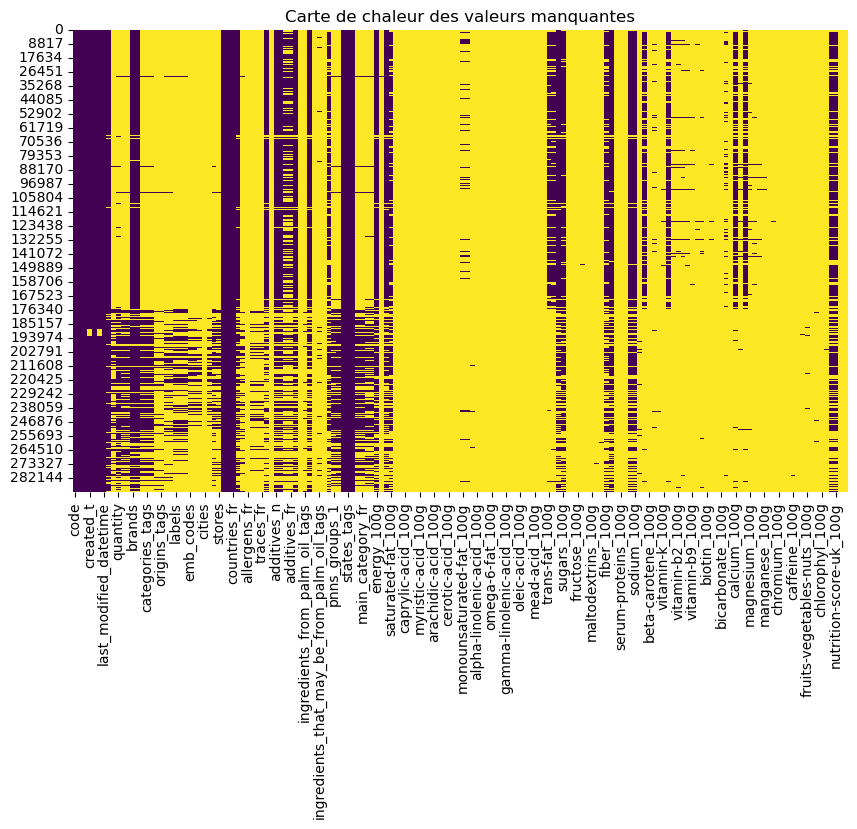

In [658]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Carte de chaleur des valeurs manquantes')
plt.show()

### d) Taux de remplissage du dataframe et Récupération des colonnes ayant moins de 80% de valeurs manquantes <a id="Taux-de-remplissage-du-dataframe-et-Récupération-des-colonnes-ayant-moins-de-80%-de-valeurs-manquantes"></a>

In [660]:
def filtrer_valeurs_manquantes(dataframe, seuil=80):
    # Affichage des taux de remplissage des colonnes
    taux_remplissage = dataframe.isnull().mean() * 100
    colonnes_non_manquantes = taux_remplissage[taux_remplissage < seuil].index
    
    print(f"Colonnes avec moins de {seuil}% de valeurs manquantes :")
    print(colonnes_non_manquantes)
    
    # Filtrage des colonnes avec moins de 80% de valeurs manquantes
    dataframe_filtré = dataframe[colonnes_non_manquantes]
    
    return dataframe_filtré

# Application de la fonction pour filtrer les colonnes
data_filtrée = filtrer_valeurs_manquantes(data)

Colonnes avec moins de 80% de valeurs manquantes :
Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'serving_size', 'additives_n',
       'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100

### e) Suppression des colonnes non-pertinentes pour le projet <a id="Suppression-des-colonnes-non-pertinentes-pour-le-projet"></a>

In [662]:
# Liste des colonnes à supprimer
columns_useless = [
    'url',
    'creator',
    'created_datetime',
    'last_modified_datetime',
    'created_t',
    'last_modified_t',
    'states',
    'states_tags',
]

# Suppression des colonnes inutiles
data_filtrée = data_filtrée.drop(columns=columns_useless, errors='ignore')

# Vérification : Affichage des colonnes finales après suppression
print("\nColonnes finales après suppression :")
print(data_filtrée.columns)


Colonnes finales après suppression :
Index(['code', 'product_name', 'quantity', 'packaging', 'packaging_tags',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_fr', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states_fr', 'main_category',
       'main_category_fr', 'image_url', 'image_small_url', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')


### f) Fréquence et Réduction des pays dans la colonne Countries <a id="Fréquence-et-Réduction-des-pays-dans-la-colonne-Countries"></a>

* L’objectif de l’agence Santé publique France est d'améliorer les données pour un public français. Il est donc logique de travailler sur les produits qui concernent ce public.
En filtrant les données pour inclure "France," on se concentre sur des produits pertinents pour les utilisateurs en France.

* Les produits liés à d’autres pays peuvent avoir des champs non pertinents ou des informations différentes (par exemple, les ingrédients spécifiques à d’autres marchés), ce qui pourrait intriduire des informations non pertinentes, erronées, ou incohérentes pouvant perturber le système d’auto-complétion.

Nous allons inclure les produits liés à la France, même en combinaison avec d’autres pays.

* Enfin, nettoyer et explorer les données uniquement pour les produits liés à la France permet de concentrer nos efforts sur un ensemble réduit mais pertinent de données. Cela accélère la mise en place du système de suggestion.

In [665]:
#Filtrage pour ne garder que les lignes où le pays est la France
data_filtrée = data_filtrée[data_filtrée['countries'].str.contains('France', case=False, na=False)]

# Vérification de la répartition des pays après le filtrage
pays_comptes = data_filtrée['countries'].value_counts().head(40)
print(f"Répartition des pays après filtre (seulement France) :\n{pays_comptes}")

# 4. Vérification de la forme du DataFrame filtré
print(f"Forme du DataFrame filtré pour la France : {data_filtrée.shape}")

Répartition des pays après filtre (seulement France) :
countries
France                                70089
France, Suisse                          383
Belgique,France                         203
France,Suisse                           144
France,UK                               134
UK,France                               125
France,United Kingdom                   122
France, en:switzerland                   92
France, US                               67
France,Allemagne                         66
France, en:belgium                       65
France,Switzerland                       59
France,Royaume-Uni                       59
France,Guadeloupe                        53
Belgique, en:france                      47
France,Belgique                          41
France,Espagne                           36
France,La Réunion                        34
United States, en:france                 34
Belgium,France                           33
United Kingdom, en:france                32
France,État

### g) Exclusion des colonnes non alimentaires <a id="Exclusion-des-colonnes-non-alimentaires"></a>

In [667]:
# Filtrage pour ne garder que les produits alimentaires
mots_clés_non_alimentaires = [
    'shampooing', 'savon', 'crème lavante','gel douche', 'dentifrice', 'déodorant', 
    'lotion', 'maquillage', 'fond de teint', 'blanchisseur', 'gommage', 'baume', 'sérum',
    'masque', 'rouge à lèvres', 'vernis à ongles', 'après-shampoing', 'huile capillaire',
    'shampooing sec', 'démaquillant', 'crème solaire', 'crème hydratante', 'baume à lèvres', 
    'mousse de bain', 'gels de rasage', 'déodorant', 'lait pour le corps', 'lait de toilette', 
    'détergent', 'nettoyant', 'désinfectant', 'produit ménager', 'produit pour vitres', 
    'nettoyant multi-usage', 'désodorisant', 'liquide vaisselle', 'poudre à récurer', 
    'nettoyant pour sol', 'nettoyant pour four', 'nettoyant pour toilettes', 'lingettes', 
    'crème pour bébé', 'couches', 'shampoing pour bébé', 'huile de massage pour bébé', 
    'médicament', 'pansements', 'bandages', 'gel antiseptique', 'crème antiseptique', 
    'compresses', 'désinfectant pour les mains', 'masque facial', 'thermomètre', 'gants jetables', 
    'encens', 'parfum d’intérieur', 'piles', 'accessoires de téléphone', 'batterie', 
    'tissu', 'brosses à dents', 'lingettes nettoyantes', 'sacs poubelles', 'panier à linge', 
    'produits pour animaux'
]
mask_non_alimentaire = data_filtrée['product_name'].str.contains('|'.join(mots_clés_non_alimentaires), case=False, na=False)

# Vérification des produits non alimentaires détectés
produits_non_alimentaires = data_filtrée[mask_non_alimentaire]
print(f"Produits non alimentaires détectés :\n{produits_non_alimentaires[['product_name']]}")

# Exclusion des produits non alimentaires
data_filtrée = data_filtrée[~mask_non_alimentaire]

# Vérification de la répartition des produits après le filtrage
print(f"Nombre de produits après exclusion des non-alimentaires : {data_filtrée.shape[0]}")

Produits non alimentaires détectés :
                                             product_name
197861                  savon de marseille a la glycerine
197869  Liquide vaisselle Bicarbonate écorce d'orange ...
197872  Shampooing Diamond Color cheveux colorés ou mé...
198657                                  gel douche zéro %
208162                    Savon liquide a l'huile d'olive
220376                                    Jus de Batterie
222741  Lingettes pocket pour visage et mains, biodégr...
226532                                      La Baume 2015
227826  Gel douche hydratant, Parfum jasmin & fleur de...
230592                     Masque à croustiller goût Salé
231038  Noreva Lotion Universelle Nettoyante Micellair...
231261                                    Lingettes bébé 
233625                                  liquide vaisselle
234540              baume corps nourrissant Rêve d'Orient
237697                              dentifrice scooby doo
247698    Shampooing purifiant à l'

### h) Identification des colonnes clés <a id="Identification-des-colonnes-clés"></a>

Voici les colonnes qui pourraient répondre à notre problématique : 

Colonnes nutritionnelles :

* energy_100g : Énergie (en kilojoules ou kilocalories pour 100 g)
* fat_100g : Matières grasses (en grammes pour 100 g)
* saturated-fat_100g : Acides gras saturés
* carbohydrates_100g : Glucides
* sugars_100g : Sucres
* fiber_100g : Fibres
* proteins_100g : Protéines
* salt_100g : Sel
* sodium_100g : Sodium

Autres colonnes contextuelles :
* code
* product_name
* pnns_groups_2

In [670]:
# Liste des colonnes à sélectionner
colonnes_pertinentes = [
    'code', 
    'product_name',
    'pnns_groups_2',
    'nutrition_grade_fr',
    'energy_100g', 
    'fat_100g', 
    'saturated-fat_100g', 
    'carbohydrates_100g', 
    'sugars_100g', 
    'fiber_100g', 
    'proteins_100g', 
    'salt_100g', 
    'sodium_100g',
]

# Vérification des colonnes disponibles dans le DataFrame
colonnes_disponibles = [col for col in colonnes_pertinentes if col in data_filtrée.columns]

# Filtrage des colonnes pertinentes
data_filtrée_pertinente = data_filtrée[colonnes_disponibles]

# Affichage des 100 premières lignes
data_filtrée_pertinente.head(100)

code                                       product_name  \
46          24600                                      Filet de bœuf   
106         36252                                     Lion Peanut x2   
136         39259                                            Twix x2   
138         39529                                     Pack de 2 Twix   
182       5200016                                  lentilles vertes    
183       7020254                                                NaN   
184       7730009                  Biscuits sablés fourrage au cacao   
187       9336247                                                NaN   
188      10090206              Thé de Noël aromatisé orange-cannelle   
189      10127735                       Sirops pour ganache macarons   
190      10187319                                     Mini Confettis   
191      10207260                         Praliné Amande Et Noisette   
226      40608754                              Pepsi, Nouveau goût !   
234      69161025                          Tarte Poireaux Et Lardons   
240      87177756                                                7Up   
242            10                                  Madeleines nature   
279            30                                      Cakes Raisins   
283            31                                   Cakes aux Fruits   
284          3100                                   Chair à saucisse   
299            50                             Financiers aux Amandes   
301            51                                    Fondants Citron   
307     606009841                                Beignets framboises   
415     886100252                                              Pepsi   
425    1000004005                                                NaN   
428           104                                  30 Panach' Fruits   
431      11021096                    Foie gras de canard du Périgord   
433       1108217  Médaillon au foie gras de canard et aux champi...   
434       1108545           Terrine de magret de canard au Sauternes   
443      11201096                          Foie gras canard Périgord   
444       1120209                             Pâté au foie de canard   
445       1123550                     Terrine caille pruneaux d'agen   
446      11251085                          Foie de canard aux figues   
448       1126220         Tartinade de foie gras de canard aux cèpes   
449      11281070                           Foie gras d'oie Périgord   
450      11281076                        Foie gras d'oie du Périgord   
452         11501                             Curiously Strong Mints   
454         11693    All Buter Belgian White Chocolate Chunk Cookies   
455         11709                                                NaN   
456         11730                         Cookies Cranberry & Orange   
457         11747             Triple Belgian Chocolaté Chunk Cookies   
458         11778                                Stem Ginger Cookies   
459         11815                                Stem Ginger Dunkers   
463         13628                                   Chicken pad thaï   
493         18210                            Carrot & Coriander soup   
495    2000003395                    Black & White Crispbread Sticks   
497         20220                             Apple Pear & Asparagus   
508           227                            Bijou Caramel ChocoLait   
509         23092                         Maple syrup & pecan cookie   
510         23115             Giant cookies triple belgian chocolate   
511         23375                                                NaN   
523         24846                                     Masala Ketchup   
526         25751                                    Honey roast ham   
532         26857                  Cornish Cruncher & Balsamic Onion   
543         28653                              Jersey Milk Chocolate   
544         28813                                    

In [671]:
# Calcul des taux de remplissage pour chaque colonne sélectionnée
taux_remplissage = data_filtrée_pertinente.notnull().mean()
print("Taux de remplissage des colonnes sélectionnées :")
print(taux_remplissage)

Taux de remplissage des colonnes sélectionnées :
code                  1.000000
product_name          0.982262
pnns_groups_2         0.829628
nutrition_grade_fr    0.752495
energy_100g           0.789368
fat_100g              0.584165
saturated-fat_100g    0.763009
carbohydrates_100g    0.578476
sugars_100g           0.764722
fiber_100g            0.554159
proteins_100g         0.785914
salt_100g             0.765284
sodium_100g           0.765243
dtype: float64


In [672]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                      0
product_name           1294
pnns_groups_2         12429
nutrition_grade_fr    18056
energy_100g           15366
fat_100g              30336
saturated-fat_100g    17289
carbohydrates_100g    30751
sugars_100g           17164
fiber_100g            32525
proteins_100g         15618
salt_100g             17123
sodium_100g           17126
dtype: int64


In [673]:
# Suppression des colonnes avec un taux de remplissage inférieur à 50%
seuil_remplissage = 0.5
colonnes_a_garder = taux_remplissage[taux_remplissage >= seuil_remplissage].index
data_filtrée_pertinente = data_filtrée_pertinente[colonnes_a_garder]
print(f"Colonnes finales après filtrage sur le taux de remplissage : {colonnes_a_garder}")

Colonnes finales après filtrage sur le taux de remplissage : Index(['code', 'product_name', 'pnns_groups_2', 'nutrition_grade_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g'],
      dtype='object')


## 1.4. Gestion des doublons <a id="Gestion-des-doublons"></a>

In [675]:
# Identification des doublons
nombre_doublons = data_filtrée_pertinente.duplicated().sum()

# Suppression des doublons
avant_doublons = data_filtrée_pertinente.shape[0]
data_filtrée_pertinente = data_filtrée_pertinente.drop_duplicates()
apres_doublons = data_filtrée_pertinente.shape[0]

# Résultats
print(f"Nombre de doublons détectés : {nombre_doublons}")
print(f"Lignes avant suppression des doublons : {avant_doublons}, après : {apres_doublons}")

Nombre de doublons détectés : 0
Lignes avant suppression des doublons : 72952, après : 72952


* Les doublons dans les données peuvent fausser les analyses. Nous allons les détecter en fonction d'une colonne clé, comme 'code'.

* Ensuite, parfois, plusieurs lignes peuvent avoir le même code mais des informations différentes dans d’autres colonnes. Avant de supprimer, on vérifie si ces différences sont significatives. 

In [677]:
# Vérification du nombre de doublons basés sur la colonne 'code'
doublons_code = data_filtrée_pertinente['code'].duplicated().sum()
print(f"Nombre de doublons détectés dans la colonne 'code' : {doublons_code}")

#Visualisation des doublons
# Si des doublons sont détectés, affichage des lignes impliquées
if doublons_code > 0:
    # Identification de toutes les occurrences des doublons
    lignes_doublons = data_filtrée_pertinente[data_filtrée_pertinente['code'].duplicated(keep=False)]
    print("Lignes impliquées dans les doublons (toutes occurrences) :")
    print(lignes_doublons.sort_values(by='code'))
else:
    print("Aucun doublon détecté dans la colonne 'code'.")

Nombre de doublons détectés dans la colonne 'code' : 2
Lignes impliquées dans les doublons (toutes occurrences) :
          code                                product_name  \
458      11778                         Stem Ginger Cookies   
9892     11778  All Butter Reduced Fat Stem Ginger Cookies   
67371   635646                         M&S Vegetable pizza   
120240  635646         Chargrilled Vegetable & Basil Pesto   

                pnns_groups_2 nutrition_grade_fr  energy_100g  fat_100g  \
458        Biscuits and cakes                  d       1809.0      13.3   
9892       Biscuits and cakes                  d       1809.0      13.3   
67371                 unknown                NaN          NaN       NaN   
120240  Pizza pies and quiche                  b        859.0       7.8   

        saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
458                    7.0           70.199997    35.700001         2.5   
9892                   7.0           70.199997   

Doublons détectés :
* code 11778 correspond à deux produits légèrement différents : "Stem Ginger Cookies" et "All Butter Reduced Fat Stem Ginger Cookies". les deux produits sont similaires mais ont des compositions différentes (Biscuits au gingembre et à la tige » et « Biscuits au gingembre à tige allégée en gras »). 
Ces deux lignes ne doivent pas être considérées comme des doublons.

* code 635646 correspond également à deux produits différents : "Pizza aux légumes M&S" et "Pesto de légumes grillés et basilic". Ces deux lignes ne doivent pas être considérées comme des doublons.

In [681]:
# Vérification des doublons sur toutes les colonnes
doublons_toutes_colonnes = data_filtrée_pertinente.duplicated().sum()
print(f"Nombre de doublons détectés sur toutes les colonnes : {doublons_toutes_colonnes}")

Nombre de doublons détectés sur toutes les colonnes : 0


In [682]:
# Résumé final du DataFrame
print("Résumé des données filtrées et nettoyées :")
print(data_filtrée_pertinente.info())

Résumé des données filtrées et nettoyées :
<class 'pandas.core.frame.DataFrame'>
Index: 72952 entries, 46 to 290892
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   code                72952 non-null  category
 1   product_name        71658 non-null  category
 2   pnns_groups_2       60523 non-null  category
 3   nutrition_grade_fr  54896 non-null  category
 4   energy_100g         57586 non-null  float32 
 5   fat_100g            42616 non-null  float32 
 6   saturated-fat_100g  55663 non-null  float32 
 7   carbohydrates_100g  42201 non-null  float32 
 8   sugars_100g         55788 non-null  float32 
 9   fiber_100g          40427 non-null  float32 
 10  proteins_100g       57334 non-null  float32 
 11  salt_100g           55829 non-null  float32 
 12  sodium_100g         55826 non-null  float32 
dtypes: category(4), float32(9)
memory usage: 19.6 MB
None


## 1.5. Identification de la cible et définition des prédicteurs (features) <a id="Identification de la cible et définition des prédicteurs (features)"></a>

* Nous allons Identifier la variable cible (target) pour le modèle.

Quelle variable sera prédite par le modèle?

Pour un objectif de système de suggestion ou d'auto-complétion pour la qualité nutritionnelle des produits, nous décidons de choisir nutrition_grade_fr comme cible. Elle correspond au "score nutritionnel" attribué aux produits alimentaires (A, B, C, D, ou E), calculé à partir de divers facteurs nutritionnels. 

De plus, il s'agit d'une variable catégorielle (A, B, C, D, E) qui est plus pratique à prédire et à utiliser dans un contexte de classification pour améliorer l'expérience utilisateur.


* Une fois la cible identifiée, nous allons séparer les colonnes restantes comme prédicteurs (features).

In [688]:
# Définition de la variable cible
variable_cible = 'nutrition_grade_fr'

# Définition des colonnes utiles (non prédicteurs mais nécessaires pour le nettoyage)
colonnes_utiles = ['code', 'product_name', 'pnns_groups_2']

# Définition des colonnes prédicteurs
colonnes_prédicteurs = [
    col for col in data_filtrée_pertinente.columns 
    if col not in [variable_cible] + colonnes_utiles
]

# Vérification si la cible est présente dans le DataFrame
if variable_cible in data_filtrée_pertinente.columns:
    print(f"Variable cible définie : {variable_cible}")
else:
    print(f"La colonne cible '{variable_cible}' n'existe pas dans les données filtrées.")

Variable cible définie : nutrition_grade_fr


* Filtrage des lignes sans valeur cible : la variable cible peut avoir des valeurs manquantes, il est donc important de supprimer les lignes où la cible est manquante.

Il est préférable de filtrer les lignes avec des valeurs manquantes dans la cible (nutrition_grade_fr) avant de séparer les prédicteurs (X) et la cible (Y). En effet, les lignes avec des valeurs manquantes dans la cible ne pourront pas être utilisées pour l'entraînement ou l'évaluation du modèle, donc il est essentiel de les supprimer avant toute analyse ou séparation.

In [691]:
# Suppression des lignes où la cible est manquante
data_filtrée_pertinente = data_filtrée_pertinente.dropna(subset=[variable_cible])

# Vérification si toutes les lignes ont maintenant une valeur pour la cible
print(f"Nombre de lignes après suppression des lignes avec des valeurs manquantes dans la cible : {data_filtrée_pertinente.shape[0]}")

Nombre de lignes après suppression des lignes avec des valeurs manquantes dans la cible : 54896


* Séparation de la cible (y) et des prédicteurs (X)

In [693]:
# Séparation de la cible et des prédicteurs
X = data_filtrée_pertinente[colonnes_prédicteurs]  # Prédicteurs
y = data_filtrée_pertinente[variable_cible]        # Cible
non_predicteurs_utiles = data_filtrée_pertinente[colonnes_utiles]  # Colonnes non prédicteurs mais utiles

# Affichage des dimensions
print(f"Nombre de prédicteurs : {X.shape[1]}")
print(f"Nombre de lignes dans X : {X.shape[0]}")
print(f"Dimensions de la cible (y) : {y.shape}")
print(f"Colonnes utiles non prédicteurs : {non_predicteurs_utiles.columns.tolist()}")

Nombre de prédicteurs : 9
Nombre de lignes dans X : 54896
Dimensions de la cible (y) : (54896,)
Colonnes utiles non prédicteurs : ['code', 'product_name', 'pnns_groups_2']


* Vérification des distributions des variables :
Il est utile de visualiser la distribution de notre variable cible et des prédicteurs numériques pour repérer des anomalies ou des besoins en normalisation.

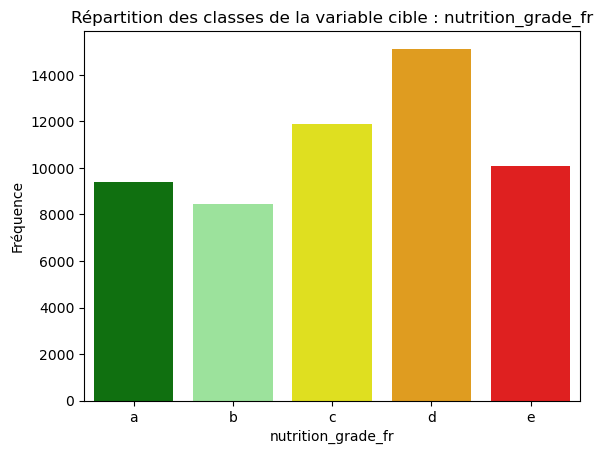


Répartition des classes dans la cible :
nutrition_grade_fr
d    15127
c    11871
e    10087
a     9381
b     8430
Name: count, dtype: int64


In [696]:
# Visualisation de la distribution des classes dans la cible

# Palette de couleurs pour les classes
palette = {
    'a': 'green',       # Grade A (Très bon)
    'b': 'lightgreen',  # Grade B (Bon)
    'c': 'yellow',      # Grade C (Moyen)
    'd': 'orange',      # Grade D (Pas terrible)
    'e': 'red'          # Grade E (Mauvais)
}

# Création du graphique avec palette appliquée via `hue`
sns.countplot(x=y, hue=y, dodge=False, palette=palette, legend=False)
plt.title(f"Répartition des classes de la variable cible : {variable_cible}")
plt.xlabel(variable_cible)
plt.ylabel("Fréquence")
plt.show()

# Affichage de la fréquence des classes
print(f"\nRépartition des classes dans la cible :")
print(y.value_counts())

## 1.6. Exploration de la relation entre les variables quantitatives et qualitatives dans notre jeu de données <a id="Exploration-de-la-relation-entre-les-variables-quantitatives-et-qualitatives-dans-notre-jeu-de-données"></a>

#### a) Visualisation des distributions des variables numériques <a id="Visualisation des distributions des variables numériques"></a>
* Histogrammes pour voir la distribution des données.
* Boxplots pour identifier les valeurs aberrantes (outliers).

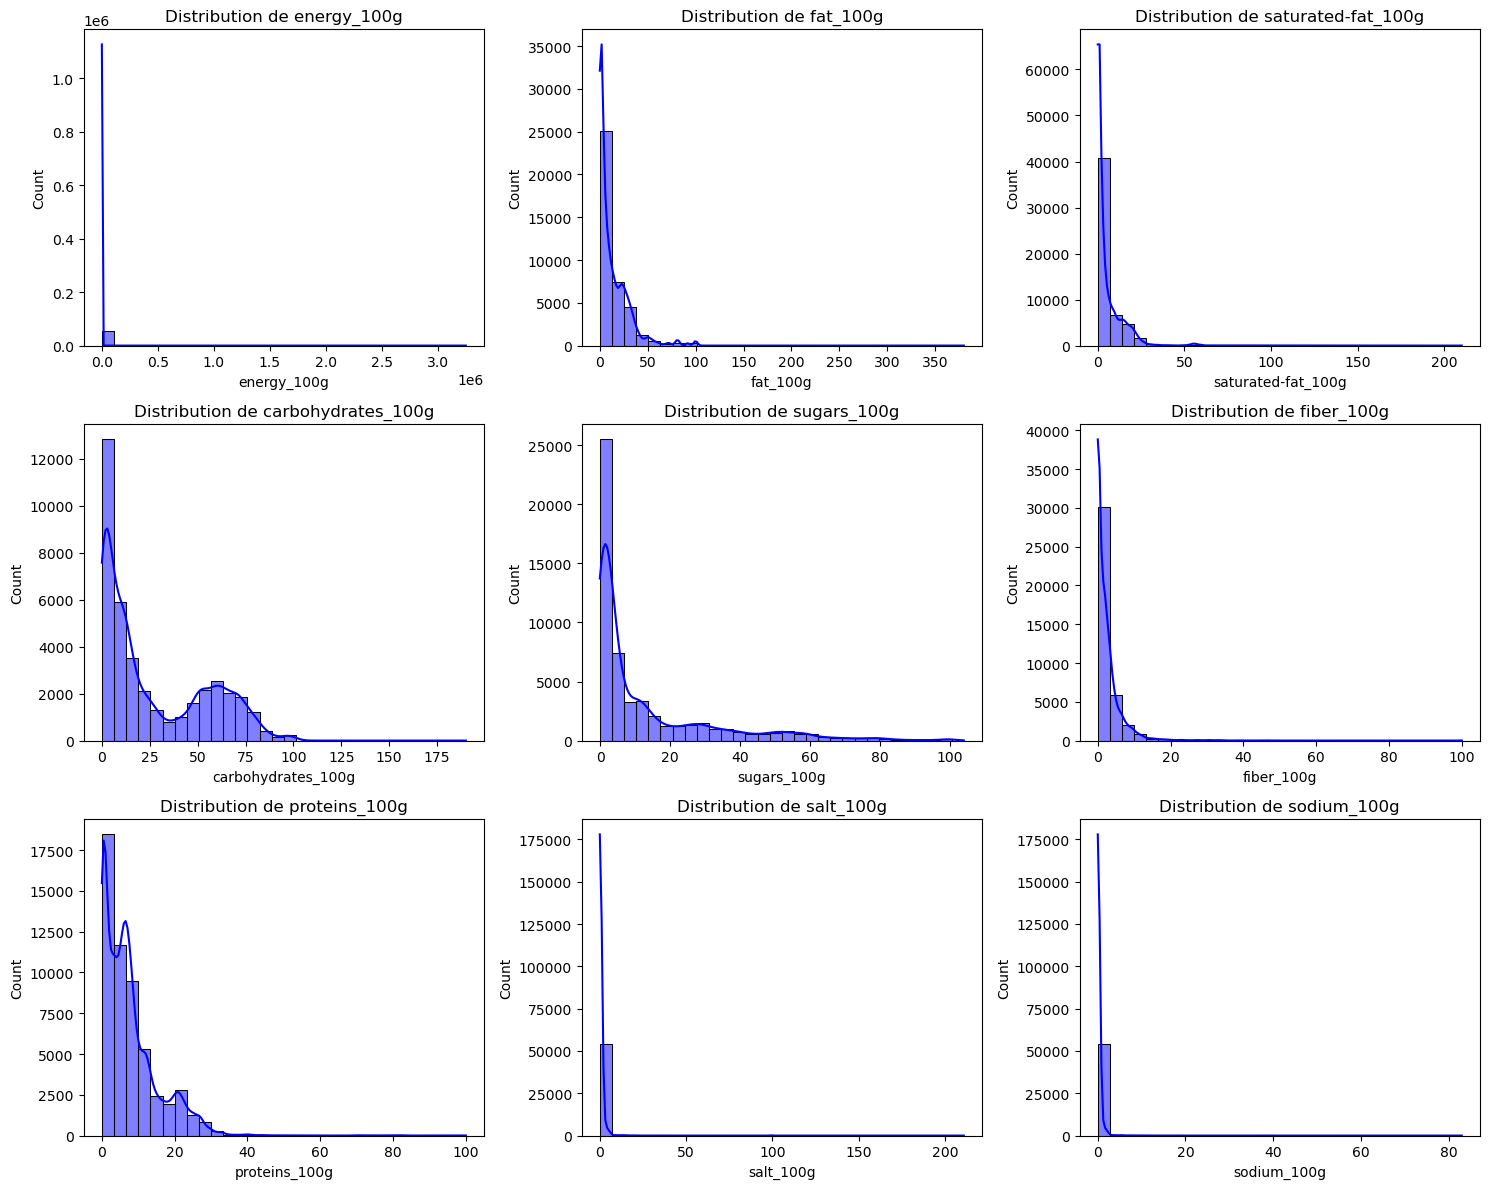

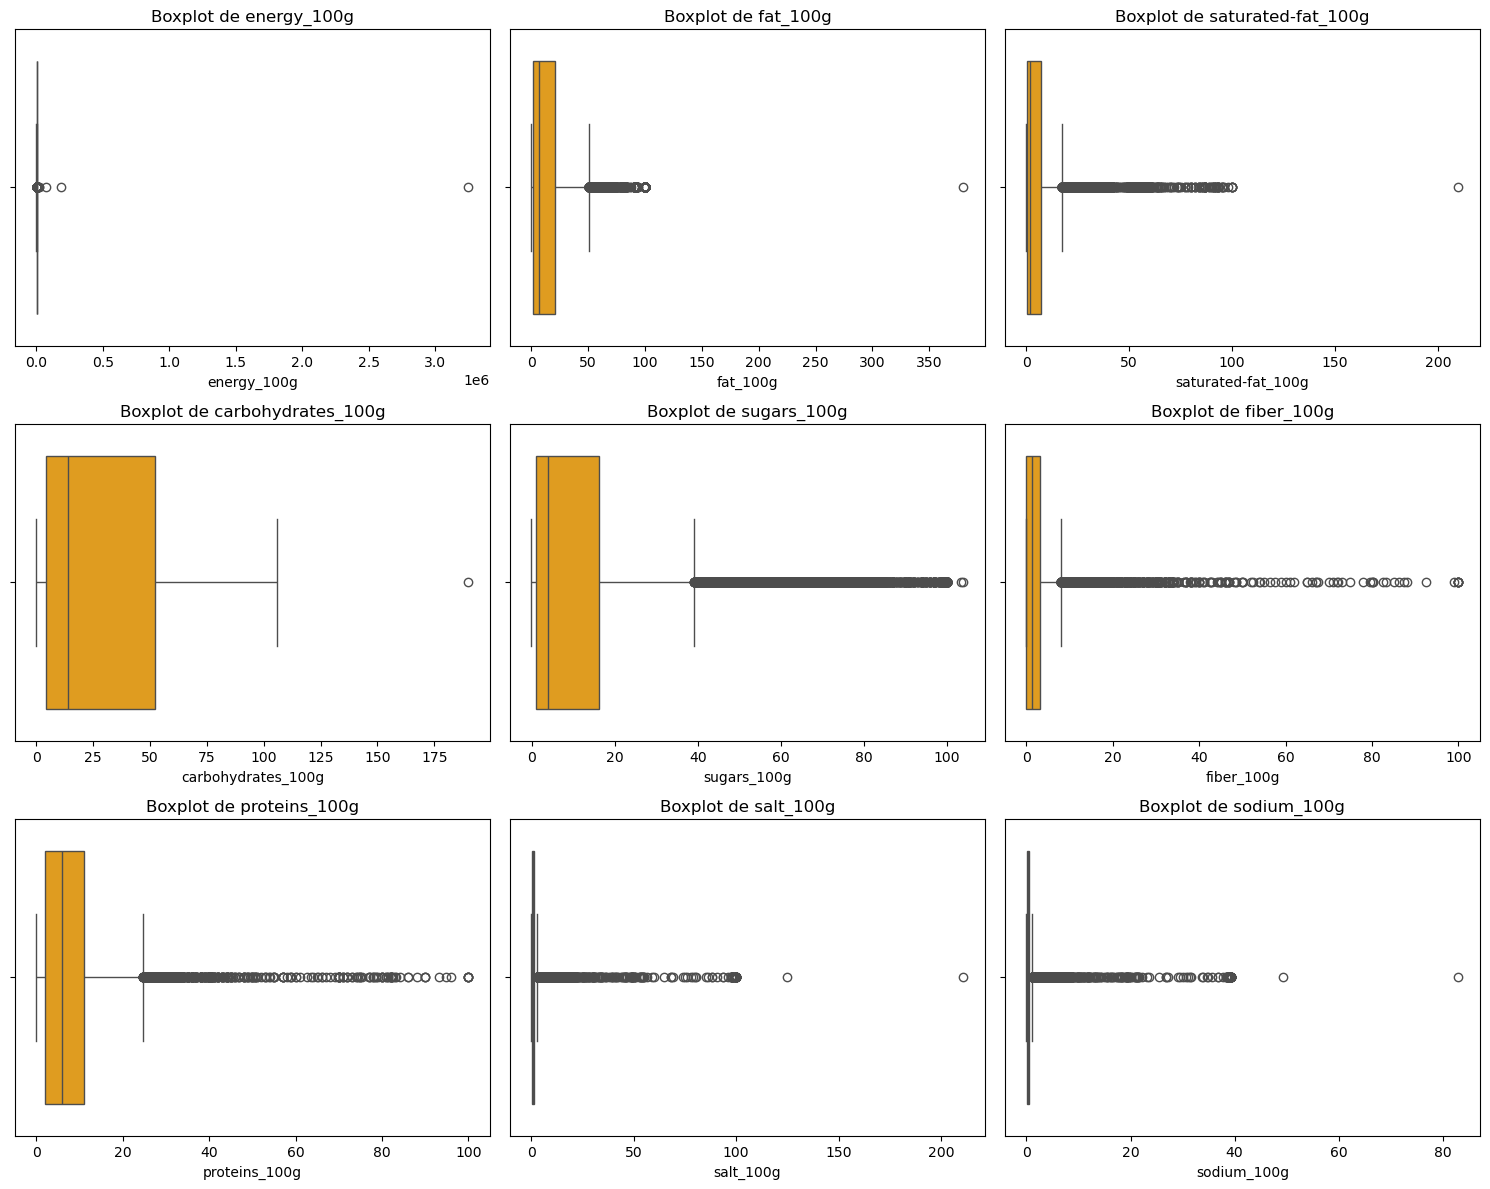

In [700]:
# Liste des colonnes numériques
colonnes_numeriques = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
    'proteins_100g', 'salt_100g', 'sodium_100g'
]

# Création des histogrammes
plt.figure(figsize=(15, 12))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()

# Création des boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=X[col], color='orange')
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

Interprétation des histogrammes :
* La plupart des variables numériques (énergie, graisses, sucres, fibres, protéines, etc.) montrent des distributions fortement biaisées vers la gauche (skewness positive).
Une partie importante des données est concentrée sur de petites valeurs, tandis qu'une minorité correspond à des valeurs élevées qui peuvent indiquer des valeurs aberrantes ou extrêmes.

* Certaines variables, comme energy_100g, ont des valeurs anormalement élevées (par exemple, jusqu'à 1 000 000), ce qui est irréaliste pour une valeur énergétique (en général, l'énergie ne dépasse pas quelques milliers de kJ/100g pour la majorité des produits alimentaires).
Ces valeurs extrêmes faussent la moyenne et rendent difficile l’interprétation des statistiques globales.


Interprétation des boxplots :
* La présence de nombreux points hors des moustaches indique des valeurs aberrantes. Ces valeurs peuvent être des erreurs de saisie ou des cas valides mais extrêmes.

Les variables comme energy_100g, fat_100g, sugars_100g, salt_100g, et sodium_100g montrent une grande dispersion avec des valeurs anormales.
Par exemple, des produits alimentaires ne devraient pas contenir 200 g de graisses ou 100 g de sel pour 100 g de produit (ces valeurs dépassent les limites physiologiques).

* Par ailleurs, les variables salt_100g et sodium_100g ont exactement les mêmes valeurs, elles semblent être des doublons. Nous n'en garderons qu'une.

* Suppression de la colonne sodium_100g qui fait doublon avec la colonne salt_100g

In [704]:
# Suppression de la colonne sodium_100g
if 'sodium_100g' in data_filtrée_pertinente.columns:
    data_filtrée_pertinente = data_filtrée_pertinente.drop(columns=['sodium_100g'])
    print("La colonne 'sodium_100g' a été supprimée.")
else:
    print("La colonne 'sodium_100g' n'existe pas dans le dataframe.")

La colonne 'sodium_100g' a été supprimée.


#### b) Matrice de corrélation des variables numériques <a id="Matrice-de-corrélation-des-variables-numériques"></a>
Nous allons analyser les relations entre les variables numériques à l'aide d'une matrice de corrélation avec une heatmap.

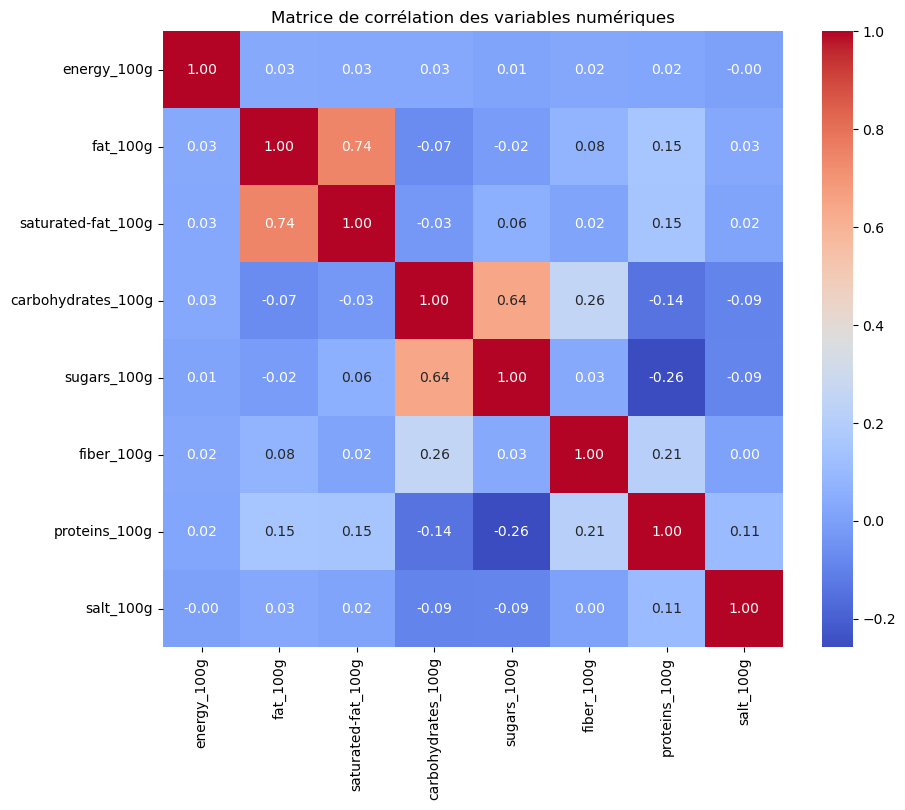

In [706]:
# Liste des colonnes numériques
colonnes_numeriques = [
    'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
    'proteins_100g', 'salt_100g'
]
# Calcul de la matrice de corrélation
correlation_matrix = data_filtrée_pertinente[colonnes_numeriques].corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

#### c) Distribution des variables catégorielles <a id="Distribution-des-variables-catégorielles"></a>
Nous allons éxaminer la répartition des variables catégorielles à l'aide de diagrammes à barres.

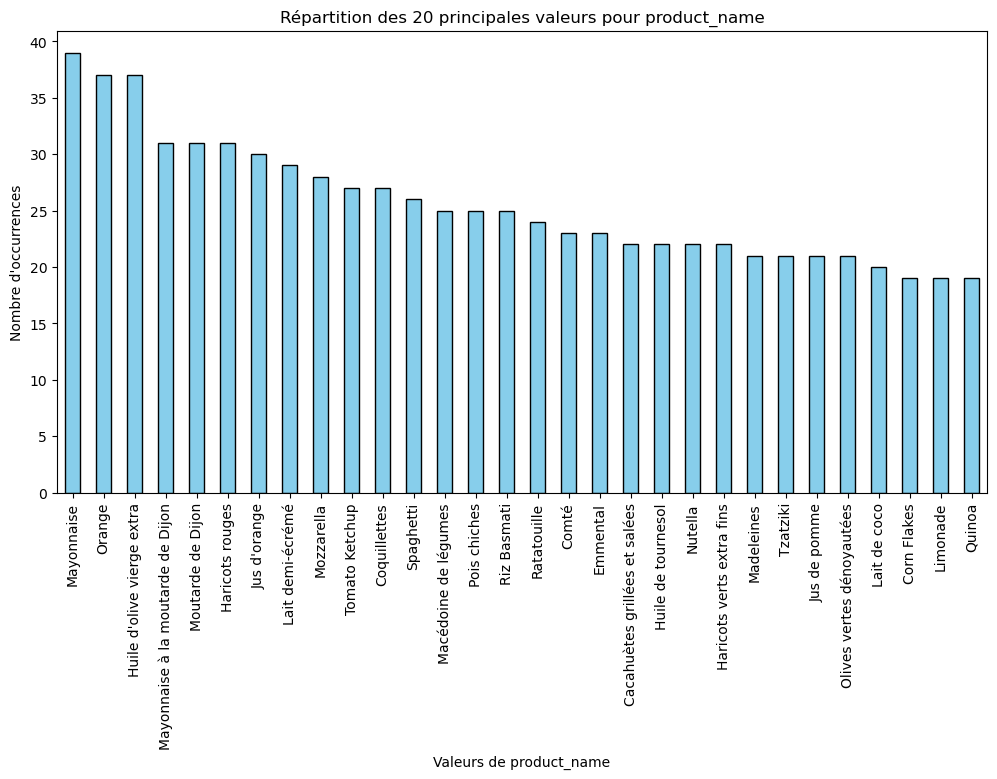

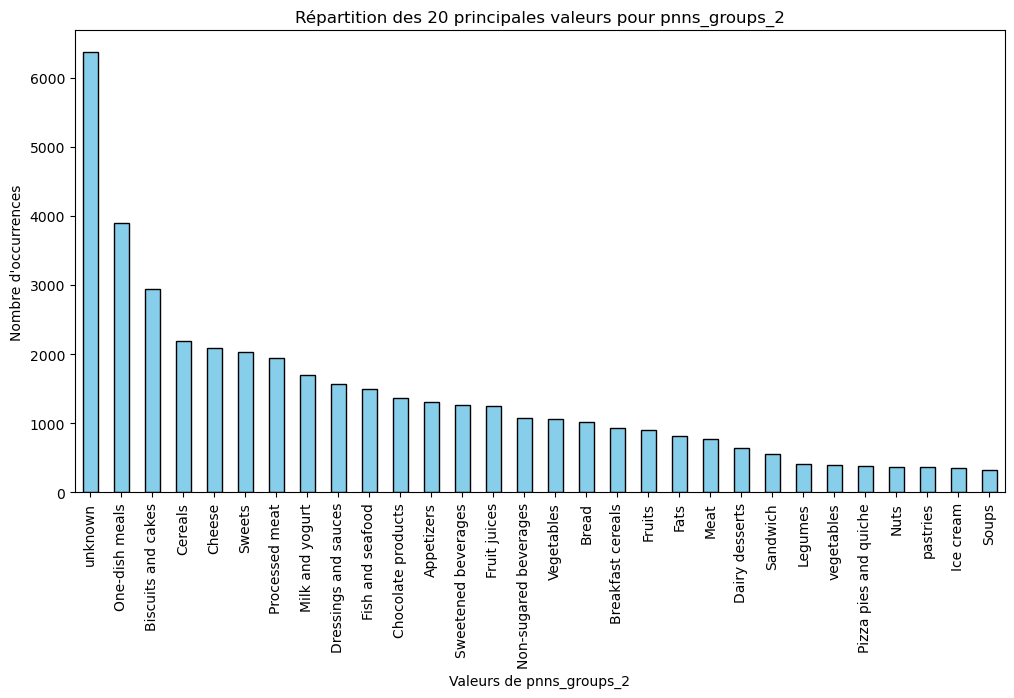

In [713]:
# Liste des colonnes catégorielles
colonnes_categorielles = ['product_name', 'pnns_groups_2']

# Diagrammes à barres pour chaque variable catégorielle
for col in colonnes_categorielles:
    plt.figure(figsize=(12, 6))
    data_filtrée_pertinente[col].value_counts().head(30).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Répartition des 20 principales valeurs pour {col}")
    plt.ylabel("Nombre d'occurrences")
    plt.xlabel(f"Valeurs de {col}")
    plt.xticks(rotation=90)
    plt.show()


## 1.7. Automatisation de toutes les étapes de filtrage <a id="Automatisation-de-toutes-les-étapes-de-filtrage"></a>

In [736]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

def automatiser_traitements(dataframe):
    # Conversion des types de données pour économiser de la mémoire
    for col in dataframe.select_dtypes(include=['int64']).columns:
        dataframe[col] = dataframe[col].astype('int32')
    for col in dataframe.select_dtypes(include=['float64']).columns:
        dataframe[col] = dataframe[col].astype('float32')
    
    # Liste des colonnes datetime
    datetime_features = [
        'created_datetime',
        'last_modified_datetime',
        'created_t',
        'last_modified_t',]
    
    # Conversion des colonnes de dates et heures en format datetime
    for feature in datetime_features:
        dataframe[feature] = pd.to_datetime(dataframe[feature], errors='coerce')

    # Détection des variables nominales
    nominal_columns = dataframe.select_dtypes(include=['object', 'category']).columns
    nominal_features = []
    for col in nominal_columns:
        if dataframe[col].dtype == 'category':
            if not dataframe[col].cat.ordered:
                nominal_features.append(col)
        else:
            nominal_features.append(col)
    
    # Liste des colonnes à convertir en catégorie
    nominal_columns_to_convert = [
        'code', 'url', 'creator', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
        'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places',
        'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
        'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text',
        'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives', 'additives_tags', 'additives_fr',
        'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2',
        'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'image_small_url']
    
    for feature in nominal_columns_to_convert:
        if feature in dataframe.columns:
            dataframe[feature] = dataframe[feature].astype('category')

    # Conversion de 'nutrition_grade_fr' en catégorie ordonnée
    ordinal_features = ['nutrition_grade_fr']
    for feature in ordinal_features:
        dataframe[feature] = dataframe[feature].astype(CategoricalDtype(ordered=True))

    # Filtrage des valeurs manquantes
    def filtrer_valeurs_manquantes(df, seuil=80):
        taux_remplissage = df.isnull().mean() * 100
        colonnes_non_manquantes = taux_remplissage[taux_remplissage < seuil].index
        return df[colonnes_non_manquantes]
    
    dataframe = filtrer_valeurs_manquantes(dataframe)
    
    # Suppression des colonnes inutiles
    columns_useless = [
        'url', 'creator', 'created_datetime', 'last_modified_datetime', 'created_t', 'last_modified_t', 
        'states', 'states_tags']
    dataframe = dataframe.drop(columns=columns_useless, errors='ignore')

    # Filtrage pour ne garder que les lignes où le pays est la France
    dataframe = dataframe[dataframe['countries'].str.contains('France', case=False, na=False)]

    # Filtrage pour ne garder que les produits alimentaires
    mots_clés_non_alimentaires = [
        'shampooing', 'savon', 'crème lavante','gel douche', 'dentifrice', 'déodorant', 'lotion', 'maquillage', 'fond de teint',
        'blanchisseur', 'gommage', 'baume', 'sérum', 'masque', 'rouge à lèvres', 'vernis à ongles', 'après-shampoing', 'huile capillaire',
        'shampooing sec', 'démaquillant', 'crème solaire', 'crème hydratante', 'baume à lèvres', 'mousse de bain', 'gels de rasage', 
        'déodorant', 'lait pour le corps', 'lait de toilette', 'détergent', 'nettoyant', 'désinfectant', 'produit ménager', 'produit pour vitres',
        'nettoyant multi-usage', 'désodorisant', 'liquide vaisselle', 'poudre à récurer', 'nettoyant pour sol', 'nettoyant pour four', 
        'nettoyant pour toilettes', 'lingettes', 'crème pour bébé', 'couches', 'shampoing pour bébé', 'huile de massage pour bébé', 
        'médicament', 'pansements', 'bandages', 'gel antiseptique', 'crème antiseptique', 'compresses', 'désinfectant pour les mains', 
        'masque facial', 'thermomètre', 'gants jetables', 'encens', 'parfum d’intérieur', 'piles', 'accessoires de téléphone', 'batterie',
        'tissu', 'brosses à dents', 'lingettes nettoyantes', 'sacs poubelles', 'panier à linge', 'produits pour animaux']
   
    mask_non_alimentaire = dataframe['product_name'].str.contains('|'.join(mots_clés_non_alimentaires), case=False, na=False)
    dataframe = dataframe[~mask_non_alimentaire]

    # Sélection des colonnes pertinentes
    colonnes_pertinentes = [
        'code', 'product_name', 'pnns_groups_2', 'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
        'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']
    
    colonnes_disponibles = [col for col in colonnes_pertinentes if col in dataframe.columns]
    dataframe = dataframe[colonnes_disponibles]

    # Suppression des doublons
    dataframe = dataframe.drop_duplicates()

    # Suppression des lignes où la cible est manquante
    dataframe = dataframe.dropna(subset=['nutrition_grade_fr'])

    # Suppression de la colonne sodium_100g
    if 'sodium_100g' in dataframe.columns:
        dataframe = dataframe.drop(columns=['sodium_100g'])

    return dataframe


# Chargement des données
data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep='\t')

# Application de la fonction automatisée pour obtenir data_filtrée
data_filtrée = automatiser_traitements(data)

# Sélection des colonnes pertinentes dans 'data_filtrée' pour obtenir data_filtrée_pertinente
colonnes_pertinentes = [
    'code', 'product_name', 'pnns_groups_2', 'nutrition_grade_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
    'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

colonnes_disponibles = [col for col in colonnes_pertinentes if col in data_filtrée.columns]
data_filtrée_pertinente = data_filtrée[colonnes_disponibles]

# Définir la variable cible et les colonnes prédicteurs
variable_cible = 'nutrition_grade_fr'
colonnes_utiles = ['code', 'product_name', 'pnns_groups_2']
colonnes_prédicteurs = [col for col in data_filtrée_pertinente.columns if col not in [variable_cible] + colonnes_utiles]

# Séparation des données pour les prédicteurs (X) et la cible (y)
X = data_filtrée_pertinente[colonnes_prédicteurs]  # Prédicteurs
y = data_filtrée_pertinente[variable_cible]        # Cible
non_predicteurs_utiles = data_filtrée_pertinente[colonnes_utiles]  # Colonnes non prédicteurs mais utiles

# Vérification des données
print(type(X))  # <class 'pandas.core.frame.DataFrame'>
print(X.head())

print(type(y))  # <class 'pandas.core.series.Series'>
print(y.head())

print(type(non_predicteurs_utiles))  # <class 'pandas.core.frame.DataFrame'>
non_predicteurs_utiles.head()

C:\Users\matym\AppData\Local\Temp\ipykernel_952\2849829904.py:106: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep='\t')


<class 'pandas.core.frame.DataFrame'>
     energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
106       1883.0      20.0                12.5                70.0   
190       1753.0       NaN                 0.8                 NaN   
191       2406.0       NaN                 2.9                 NaN   
226        177.0       0.0                 0.0                10.4   
234       1079.0       NaN                11.0                 NaN   

     sugars_100g  fiber_100g  proteins_100g  salt_100g  
106    57.500000         2.5            2.5    0.09652  
190    87.699997         0.9            0.6    0.01000  
191    50.299999         3.9            9.5    0.00300  
226    10.400000         0.0            0.0    0.02540  
234     1.000000         1.4            7.5    0.80000  
<class 'pandas.core.series.Series'>
106    e
190    d
191    d
226    e
234    d
Name: nutrition_grade_fr, dtype: category
Categories (5, object): ['a' < 'b' < 'c' < 'd' < 'e']
<class 'pandas.core.fr

code                product_name        pnns_groups_2
106     36252              Lion Peanut x2              unknown
190  10187319              Mini Confettis                  NaN
191  10207260  Praliné Amande Et Noisette                  NaN
226  40608754       Pepsi, Nouveau goût !  Sweetened beverages
234  69161025   Tarte Poireaux Et Lardons                  NaN

In [738]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                      0
product_name            278
pnns_groups_2         12149
nutrition_grade_fr        0
energy_100g              72
fat_100g              15219
saturated-fat_100g       72
carbohydrates_100g    15270
sugars_100g              72
fiber_100g            15228
proteins_100g            72
salt_100g                72
dtype: int64


# __________________________________________________________________________________________

# ETAPE 2 : IDENTIFIER ET TRAITER LES VALEURS ABERRANTES <a id="ETAPE-2-:-IDENTIFIER-ET-TRAITER-LES-VALEURS-ABERRANTES"></a>

In [742]:
# Réinitialisation de l'index des lignes supprimées ou modifiées, pour avoir un index propre et séquentiel
data_filtrée_pertinente = data_filtrée_pertinente.reset_index(drop=True)

# Vérification de l'index réinitialisé
print(data_filtrée_pertinente.head())  # Cela vous montre les premières lignes avec l'index réinitialisé

       code                product_name        pnns_groups_2  \
0     36252              Lion Peanut x2              unknown   
1  10187319              Mini Confettis                  NaN   
2  10207260  Praliné Amande Et Noisette                  NaN   
3  40608754       Pepsi, Nouveau goût !  Sweetened beverages   
4  69161025   Tarte Poireaux Et Lardons                  NaN   

  nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                  e       1883.0      20.0                12.5   
1                  d       1753.0       NaN                 0.8   
2                  d       2406.0       NaN                 2.9   
3                  e        177.0       0.0                 0.0   
4                  d       1079.0       NaN                11.0   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
0                70.0    57.500000         2.5            2.5    0.09652  
1                 NaN    87.699997         0.9            0.6 

# 1. Détection des Outliers sur toutes les colonnes <a id="Détection-des-Outliers-sur-toutes-les-colonnes"></a>

In [745]:
# Définition des bornes strictes
bornes_fixes = {
    'energy_100g': (0, 4187),
    'fat_100g': (0, 100),
    'saturated-fat_100g': (0, 100),
    'carbohydrates_100g': (0, 100),
    'sugars_100g': (0, 100),
    'fiber_100g': (0, 100),
    'proteins_100g': (0, 100),
    'salt_100g': (0, 100),
}

# Détection des valeurs aberrantes (outliers) avec bornes fixes
résumé_outliers = {}

# Parcours de toutes les colonnes numériques définies dans bornes_fixes
for colonne, (borne_min, borne_max) in bornes_fixes.items():
    if colonne in data_filtrée_pertinente.columns:
        # Vérification des valeurs manquantes
        if data_filtrée_pertinente[colonne].isnull().sum() > 0:
            print(f"Attention : {colonne} contient {data_filtrée_pertinente[colonne].isnull().sum()} valeurs manquantes.")
        
        # Filtrage des valeurs hors bornes
        outliers = data_filtrée_pertinente[
            (data_filtrée_pertinente[colonne] < borne_min) | 
            (data_filtrée_pertinente[colonne] > borne_max)
        ]
        
        # Sauvegarde du nombre d'outliers pour cette colonne
        résumé_outliers[colonne] = outliers.shape[0]

# Affichage d'un résumé des colonnes avec des valeurs aberrantes
print("Résumé des colonnes avec des valeurs aberrantes :")
for colonne, nombre in résumé_outliers.items():
    print(f"{colonne} : {nombre} valeurs aberrantes détectées")

Attention : energy_100g contient 72 valeurs manquantes.
Attention : fat_100g contient 15219 valeurs manquantes.
Attention : saturated-fat_100g contient 72 valeurs manquantes.
Attention : carbohydrates_100g contient 15270 valeurs manquantes.
Attention : sugars_100g contient 72 valeurs manquantes.
Attention : fiber_100g contient 15228 valeurs manquantes.
Attention : proteins_100g contient 72 valeurs manquantes.
Attention : salt_100g contient 72 valeurs manquantes.
Résumé des colonnes avec des valeurs aberrantes :
energy_100g : 68 valeurs aberrantes détectées
fat_100g : 1 valeurs aberrantes détectées
saturated-fat_100g : 1 valeurs aberrantes détectées
carbohydrates_100g : 4 valeurs aberrantes détectées
sugars_100g : 3 valeurs aberrantes détectées
fiber_100g : 0 valeurs aberrantes détectées
proteins_100g : 0 valeurs aberrantes détectées
salt_100g : 2 valeurs aberrantes détectées


# 2. Inspection manuelle des outliers sur toutes les colonnes <a id="Inspection-manuelle-des-outliers-sur-toutes-les-colonnes"></a>
  
N'étant pas sûrs que les outliers doivent être supprimés ou remplacés, nous allons inspecter les lignes contenant des outliers avant de prendre une décision. Cette approche est plus chronophage mais permet de prendre des décisions éclairées.

In [748]:
# Définition des bornes fixes
bornes_fixes = {
    'energy_100g': (0, 4187),
    'fat_100g': (0, 100),
    'saturated-fat_100g': (0, 100),
    'carbohydrates_100g': (0, 100),
    'sugars_100g': (0, 100),
    'fiber_100g': (0, 100),
    'proteins_100g': (0, 100),
    'salt_100g': (0, 100),
}

# Inspection des valeurs aberrantes avec bornes fixes pour une analyse manuelle
for colonne, (borne_min, borne_max) in bornes_fixes.items():
    if colonne in data_filtrée_pertinente.columns:
        # Filtrage des valeurs hors bornes
        outliers = data_filtrée_pertinente[
            (data_filtrée_pertinente[colonne] < borne_min) | 
            (data_filtrée_pertinente[colonne] > borne_max)
        ]

        # Affichage des valeurs aberrantes pour chaque colonne
        print(f"Valeurs aberrantes pour la colonne {colonne} :")
        print(outliers)

Valeurs aberrantes pour la colonne energy_100g :
                code                                       product_name  \
320      43647390011                                      Tawny' Orange   
2274        20193447  Confiserie Firenze Apfel Streuselkuchen Tiefge...   
2365        20233679                                 Halva with Almonds   
2669        20386290    Tomatentapenade Bakje 150 Gram (baresa) Koeling   
3325        20711160                Sauce beurre blanc et citron confit   
3469        20842437                                      Lardons fumés   
3685   2309640004224                                     Diot de Savoie   
4087        26029245                                        Pesto Rosso   
4920   3017239003860                                    Tramier - 220 G   
5915   3024720026888                           Rillettes De Poulet Roti   
6043   3029330067061                   Baguettines viennoises briochées   
6476   3033710069293                               

# 3. Traitement des valeurs aberrantes par colonne <a id="Traitement-des-valeurs-aberrantes-par-colonne"></a>

## 3.1 Traitement de la colonne 'energy_100g' <a id="Traitement-de-la-colonne-'energy_100g'"></a>

* ETAPE 1 : Calcul des bornes et identification des Outliers pour détecter et traiter les outliers au niveau global pour energy_100g.

Nous allons utiliser une approche métier pour identifier les outliers

Nous allons fixer une borne inférieure à 0 : Puisque l'énergie ne peut pas être négative. Cela nous permettra de garder uniquement les valeurs qui ont un sens (les valeurs négatives seront considérées comme aberrantes et seront ajustées ou supprimées).

Nous allons également fixer la borne supérieure à 4187 kj pour la colonne energy_100g, ce qui est raisonnable pour couvrir une large gamme de produits, en particulier les huiles et les matières grasses. 
De nombreuses huiles végétales (huile d'olive, huile de palme, huile de noix de coco, etc.) ont une énergie très élevée, souvent proche de 4000 kj pour 100g. Par exemple, une huile d'olive vierge extra a généralement autour de 900 kcal/100g, soit 3768 kj . Fixer une borne à 4187 kj nous permettra d'inclure ces produits.

Par la suite, nous pourrons décider de la méthode à utiliser (suppression ou remplacement) en fonction du contexte de nos données et de l'impact que cela aura sur notre analyse.

Borne inférieure : 0, Borne supérieure : 4187
Valeurs aberrantes détectées :
                                            product_name  energy_100g
320                                        Tawny' Orange       5054.0
2274   Confiserie Firenze Apfel Streuselkuchen Tiefge...       4197.0
2365                                  Halva with Almonds       9983.0
2669     Tomatentapenade Bakje 150 Gram (baresa) Koeling       4841.0
3325                 Sauce beurre blanc et citron confit       4607.0
3469                                       Lardons fumés       4356.0
3685                                      Diot de Savoie       5050.0
4087                                         Pesto Rosso       5268.0
4920                                     Tramier - 220 G       4975.0
5915                            Rillettes De Poulet Roti       5720.0
6043                    Baguettines viennoises briochées       5347.0
6476                                     Fond pour rôtis       5452.0
7369         

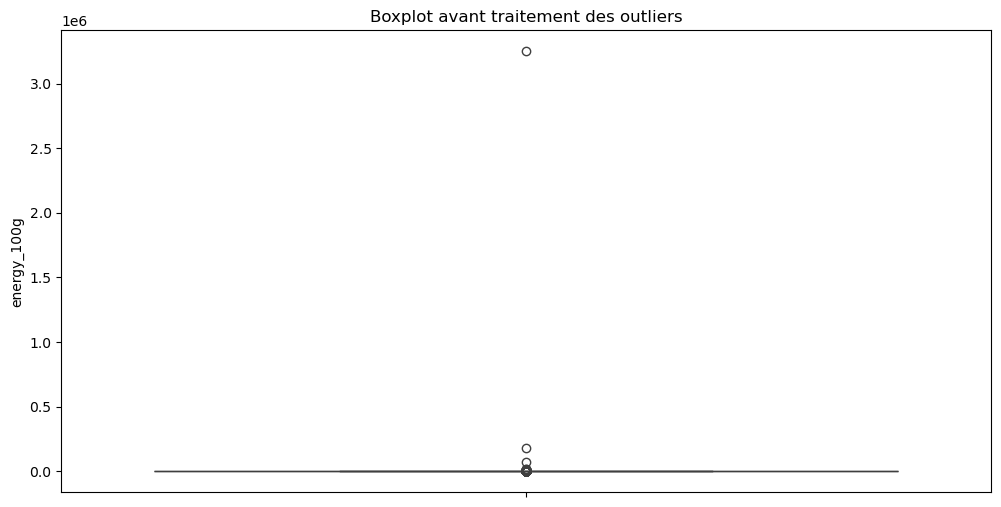

In [755]:
# Définition des bornes fixes pour 'energy_100g'
borne_inférieure = 0  # Minimum fixé
borne_supérieure = 4187  # Maximum fixé

# Affichage des bornes
print(f"Borne inférieure : {borne_inférieure}, Borne supérieure : {borne_supérieure}")

# Identification des outliers
outliers_energy_data = data_filtrée_pertinente[
    (data_filtrée_pertinente['energy_100g'] < borne_inférieure) |
    (data_filtrée_pertinente['energy_100g'] > borne_supérieure)
]

# Affichage des valeurs aberrantes détectées
print(f"Valeurs aberrantes détectées :\n{outliers_energy_data[['product_name', 'energy_100g']]}")


# Vérification de la proportion des outliers (on calcule le pourcentage des outliers par rapport au nombre total d'entrées)
outliers_energy_percentage = (outliers_energy_data.shape[0] / data_filtrée_pertinente.shape[0]) * 100
# Affichage du pourcentage
print(f"Pourcentage des outliers : {outliers_energy_percentage}%")


# Impact des outliers sur les statistiques descriptives
mean_before = data_filtrée_pertinente['energy_100g'].mean()
median_before = data_filtrée_pertinente['energy_100g'].median()

print(f"Moyenne avant traitement : {mean_before}")
print(f"Médiane avant traitement : {median_before}")

# Visualisation avant le traitement des outliers
# Avant traitement
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['energy_100g'])
plt.title('Boxplot avant traitement des outliers')
plt.show()

* Lignes à corriger

In [758]:
print(data_filtrée_pertinente.loc[320])

code                    43647390011
product_name          Tawny' Orange
pnns_groups_2                   NaN
nutrition_grade_fr                e
energy_100g                  5054.0
fat_100g                        NaN
saturated-fat_100g              0.0
carbohydrates_100g              NaN
sugars_100g                    65.0
fiber_100g                      0.0
proteins_100g                   0.0
salt_100g                       0.0
Name: 320, dtype: object


In [760]:
print(data_filtrée_pertinente.loc[2274])

code                                                           20193447
product_name          Confiserie Firenze Apfel Streuselkuchen Tiefge...
pnns_groups_2                                                       NaN
nutrition_grade_fr                                                    d
energy_100g                                                      4197.0
fat_100g                                                            NaN
saturated-fat_100g                                                  3.9
carbohydrates_100g                                                  NaN
sugars_100g                                                        18.5
fiber_100g                                                          0.0
proteins_100g                                                       2.9
salt_100g                                                          0.11
Name: 2274, dtype: object


In [762]:
print(data_filtrée_pertinente.loc[2365])

code                            20233679
product_name          Halva with Almonds
pnns_groups_2                     Sweets
nutrition_grade_fr                     e
energy_100g                       9983.0
fat_100g                       36.799999
saturated-fat_100g                   7.8
carbohydrates_100g             44.200001
sugars_100g                         32.0
fiber_100g                           NaN
proteins_100g                       12.9
salt_100g                            0.0
Name: 2365, dtype: object


La valeur réelle pour energy_100g est 2381. Nous devrons la corriger : https://fr.openfoodfacts.org/produit/20233679/halva-mit-mandeln-eridanous. 

In [765]:
print(data_filtrée_pertinente.loc[2669])

code                                                         20386290
product_name          Tomatentapenade Bakje 150 Gram (baresa) Koeling
pnns_groups_2                                                     NaN
nutrition_grade_fr                                                  e
energy_100g                                                    4841.0
fat_100g                                                          NaN
saturated-fat_100g                                                2.9
carbohydrates_100g                                                NaN
sugars_100g                                                      13.0
fiber_100g                                                        0.0
proteins_100g                                                     3.0
salt_100g                                                         2.9
Name: 2669, dtype: object


In [767]:
print(data_filtrée_pertinente.loc[3325])

code                                             20711160
product_name          Sauce beurre blanc et citron confit
pnns_groups_2                                         NaN
nutrition_grade_fr                                      e
energy_100g                                        4607.0
fat_100g                                              NaN
saturated-fat_100g                                   17.0
carbohydrates_100g                                    NaN
sugars_100g                                           2.9
fiber_100g                                            2.0
proteins_100g                                         0.5
salt_100g                                             1.2
Name: 3325, dtype: object


In [769]:
print(data_filtrée_pertinente.loc[3469])

code                        20842437
product_name           Lardons fumés
pnns_groups_2         Processed meat
nutrition_grade_fr                 e
energy_100g                   4356.0
fat_100g                        20.0
saturated-fat_100g               6.6
carbohydrates_100g               0.7
sugars_100g                      0.7
fiber_100g                       NaN
proteins_100g                   17.0
salt_100g                        2.8
Name: 3469, dtype: object


In [771]:
print(data_filtrée_pertinente.loc[3685])

code                   2309640004224
product_name          Diot de Savoie
pnns_groups_2                    NaN
nutrition_grade_fr                 e
energy_100g                   5050.0
fat_100g                         NaN
saturated-fat_100g               9.7
carbohydrates_100g               NaN
sugars_100g                      0.0
fiber_100g                       0.0
proteins_100g                   18.0
salt_100g                       22.0
Name: 3685, dtype: object


In [773]:
print(data_filtrée_pertinente.loc[4087])

code                     26029245
product_name          Pesto Rosso
pnns_groups_2                 NaN
nutrition_grade_fr              e
energy_100g                5268.0
fat_100g                      NaN
saturated-fat_100g            4.2
carbohydrates_100g            NaN
sugars_100g                   6.9
fiber_100g                    0.0
proteins_100g                 4.1
salt_100g                     2.5
Name: 4087, dtype: object


In [775]:
print(data_filtrée_pertinente.loc[4920])

code                    3017239003860
product_name          Tramier - 220 G
pnns_groups_2                 unknown
nutrition_grade_fr                  e
energy_100g                    4975.0
fat_100g                          NaN
saturated-fat_100g                3.8
carbohydrates_100g                NaN
sugars_100g                       2.2
fiber_100g                        0.0
proteins_100g                     1.7
salt_100g                         8.0
Name: 4920, dtype: object


In [777]:
print(data_filtrée_pertinente.loc[5915])

code                             3024720026888
product_name          Rillettes De Poulet Roti
pnns_groups_2                              NaN
nutrition_grade_fr                           e
energy_100g                             5720.0
fat_100g                                   NaN
saturated-fat_100g                         9.2
carbohydrates_100g                         NaN
sugars_100g                                0.1
fiber_100g                                 0.0
proteins_100g                        16.799999
salt_100g                                  1.0
Name: 5915, dtype: object


In [779]:
print(data_filtrée_pertinente.loc[6043])

code                                     3029330067061
product_name          Baguettines viennoises briochées
pnns_groups_2                                      NaN
nutrition_grade_fr                                   d
energy_100g                                     5347.0
fat_100g                                           NaN
saturated-fat_100g                                 1.7
carbohydrates_100g                                 NaN
sugars_100g                                        1.0
fiber_100g                                         2.5
proteins_100g                                      8.7
salt_100g                                          1.0
Name: 6043, dtype: object


In [781]:
print(data_filtrée_pertinente.loc[6476])

code                    3033710069293
product_name          Fond pour rôtis
pnns_groups_2                 unknown
nutrition_grade_fr                  d
energy_100g                    5452.0
fat_100g                          NaN
saturated-fat_100g                1.3
carbohydrates_100g                NaN
sugars_100g                       9.1
fiber_100g                        4.1
proteins_100g                     7.1
salt_100g                        18.0
Name: 6476, dtype: object


In [783]:
print(data_filtrée_pertinente.loc[7369])

code                               3045320009361
product_name          Confiture Bonne Maman 370g
pnns_groups_2                                NaN
nutrition_grade_fr                             d
energy_100g                               4284.0
fat_100g                                     NaN
saturated-fat_100g                          0.15
carbohydrates_100g                           NaN
sugars_100g                                 59.0
fiber_100g                                   1.5
proteins_100g                                0.3
salt_100g                                    0.0
Name: 7369, dtype: object


In [785]:
print(data_filtrée_pertinente.loc[8636])

code                          3092718605216
product_name                Sirop de cerise
pnns_groups_2         Non-sugared beverages
nutrition_grade_fr                        e
energy_100g                          5904.0
fat_100g                                NaN
saturated-fat_100g                      0.0
carbohydrates_100g                      NaN
sugars_100g                            83.0
fiber_100g                              0.0
proteins_100g                           0.0
salt_100g                               0.0
Name: 8636, dtype: object


In [787]:
print(data_filtrée_pertinente.loc[12294])

code                                           3217690033264
product_name          Sirop Citron Bio au pur sucre de canne
pnns_groups_2                                            NaN
nutrition_grade_fr                                         e
energy_100g                                           4929.0
fat_100g                                                 NaN
saturated-fat_100g                                       0.1
carbohydrates_100g                                       NaN
sugars_100g                                        69.300003
fiber_100g                                               0.0
proteins_100g                                            0.1
salt_100g                                                0.1
Name: 12294, dtype: object


In [789]:
print(data_filtrée_pertinente.loc[12301])

code                             3217690052616
product_name          Sirop Saveur pina Colada
pnns_groups_2                              NaN
nutrition_grade_fr                           e
energy_100g                             5619.0
fat_100g                                   NaN
saturated-fat_100g                         0.5
carbohydrates_100g                         NaN
sugars_100g                               79.0
fiber_100g                                 0.0
proteins_100g                              0.5
salt_100g                                 0.02
Name: 12301, dtype: object


In [791]:
print(data_filtrée_pertinente.loc[12400])

code                  3222120028611
product_name            Chevre Pane
pnns_groups_2                   NaN
nutrition_grade_fr                e
energy_100g                  5205.0
fat_100g                        NaN
saturated-fat_100g             12.0
carbohydrates_100g              NaN
sugars_100g                     2.0
fiber_100g                      0.0
proteins_100g                  14.0
salt_100g                       1.3
Name: 12400, dtype: object


In [793]:
print(data_filtrée_pertinente.loc[12947])

code                                                      3222472770749
product_name          Confiture Extra, 4 Fruits Rouges, 370 Grammes,...
pnns_groups_2                                                       NaN
nutrition_grade_fr                                                    e
energy_100g                                                      4305.0
fat_100g                                                            NaN
saturated-fat_100g                                                  0.0
carbohydrates_100g                                                  NaN
sugars_100g                                                        60.0
fiber_100g                                                          0.0
proteins_100g                                                       0.5
salt_100g                                                           0.0
Name: 12947, dtype: object


In [795]:
print(data_filtrée_pertinente.loc[14668])

code                                  3230890027529
product_name          1KG Nuggets Poulet Maitre Coq
pnns_groups_2                                   NaN
nutrition_grade_fr                                d
energy_100g                                  4289.0
fat_100g                                        NaN
saturated-fat_100g                              2.4
carbohydrates_100g                              NaN
sugars_100g                                     1.3
fiber_100g                                      0.0
proteins_100g                                  12.0
salt_100g                                       1.4
Name: 14668, dtype: object


In [797]:
print(data_filtrée_pertinente.loc[16155])

code                                      3250390001522
product_name          Sirop Grenadine - Recette William
pnns_groups_2                       Sweetened beverages
nutrition_grade_fr                                    e
energy_100g                                      5268.0
fat_100g                                            NaN
saturated-fat_100g                                  0.1
carbohydrates_100g                                  NaN
sugars_100g                                        73.5
fiber_100g                                          0.0
proteins_100g                                       0.5
salt_100g                                          0.01
Name: 16155, dtype: object


In [799]:
print(data_filtrée_pertinente.loc[18058])

code                      3250392034757
product_name          Pains Au Chocolat
pnns_groups_2                  pastries
nutrition_grade_fr                    e
energy_100g                      6109.0
fat_100g                            NaN
saturated-fat_100g                 19.0
carbohydrates_100g                  NaN
sugars_100g                        13.4
fiber_100g                          0.0
proteins_100g                       7.3
salt_100g                           0.9
Name: 18058, dtype: object


In [801]:
print(data_filtrée_pertinente.loc[18411])

code                                       3250392449544
product_name          Panes Façon Cordon Bleu Vegetarien
pnns_groups_2                                        NaN
nutrition_grade_fr                                     d
energy_100g                                       4217.0
fat_100g                                             NaN
saturated-fat_100g                                   2.9
carbohydrates_100g                                   NaN
sugars_100g                                          0.4
fiber_100g                                           5.2
proteins_100g                                       13.9
salt_100g                                            1.6
Name: 18411, dtype: object


In [803]:
print(data_filtrée_pertinente.loc[18869])

code                            3254560082656
product_name          Sirop de citron pressor
pnns_groups_2                             NaN
nutrition_grade_fr                          e
energy_100g                            4418.0
fat_100g                                  NaN
saturated-fat_100g                        0.0
carbohydrates_100g                        NaN
sugars_100g                         62.099998
fiber_100g                                0.0
proteins_100g                             0.0
salt_100g                                 0.0
Name: 18869, dtype: object


In [805]:
print(data_filtrée_pertinente.loc[21967])

code                  3257983143096
product_name            Pois cassés
pnns_groups_2               unknown
nutrition_grade_fr                b
energy_100g               3251373.0
fat_100g                        1.2
saturated-fat_100g              0.2
carbohydrates_100g        48.200001
sugars_100g                     2.5
fiber_100g                     15.4
proteins_100g             22.700001
salt_100g                      0.01
Name: 21967, dtype: object


La valeur réelle est 1360. Nous devrons la corriger : https://fr.openfoodfacts.org/produit/3257983143096/pois-casses-cora.

In [808]:
print(data_filtrée_pertinente.loc[22395])

code                          3258561300597
product_name                Sirop de Menthe
pnns_groups_2         Non-sugared beverages
nutrition_grade_fr                        e
energy_100g                          5263.0
fat_100g                                NaN
saturated-fat_100g                      0.1
carbohydrates_100g                      NaN
sugars_100g                            74.0
fiber_100g                              0.0
proteins_100g                           0.1
salt_100g                               0.0
Name: 22395, dtype: object


In [810]:
print(data_filtrée_pertinente.loc[23131])

code                                                   3263827001002
product_name          Lentilles vertes précuites 10min LE BON SEMEUR
pnns_groups_2                                                    NaN
nutrition_grade_fr                                                 b
energy_100g                                                   4987.0
fat_100g                                                         NaN
saturated-fat_100g                                               0.2
carbohydrates_100g                                               NaN
sugars_100g                                                      0.7
fiber_100g                                                      27.0
proteins_100g                                                   24.0
salt_100g                                                       0.04
Name: 23131, dtype: object


In [811]:
print(data_filtrée_pertinente.loc[23819])

code                                    3263852410411
product_name          Frites Bonbon Gélifié Aromatisé
pnns_groups_2                                 unknown
nutrition_grade_fr                                  e
energy_100g                                    5766.0
fat_100g                                          1.0
saturated-fat_100g                                0.8
carbohydrates_100g                          86.199997
sugars_100g                                 65.400002
fiber_100g                                        0.0
proteins_100g                                     5.8
salt_100g                                         0.5
Name: 23819, dtype: object


In [814]:
print(data_filtrée_pertinente.loc[25938])

code                                  3267110002653
product_name          300G TARTINABLE a LA NOISETTE
pnns_groups_2                               unknown
nutrition_grade_fr                                d
energy_100g                                  7339.0
fat_100g                                       21.5
saturated-fat_100g                              1.6
carbohydrates_100g                             49.0
sugars_100g                               42.700001
fiber_100g                                      3.5
proteins_100g                                   5.7
salt_100g                                      0.08
Name: 25938, dtype: object


In [816]:
print(data_filtrée_pertinente.loc[26081])

code                              3270020000183
product_name          Confiture pastèque citron
pnns_groups_2                            Sweets
nutrition_grade_fr                            e
energy_100g                              4410.0
fat_100g                                    0.2
saturated-fat_100g                          0.2
carbohydrates_100g                         61.0
sugars_100g                                60.0
fiber_100g                                  0.5
proteins_100g                               0.3
salt_100g                                  0.05
Name: 26081, dtype: object


In [818]:
print(data_filtrée_pertinente.loc[26480])

code                                                      3270160620807
product_name          Crème Glacée Vanille, Coulis Caramel, Bac De 9...
pnns_groups_2                                                       NaN
nutrition_grade_fr                                                    e
energy_100g                                                      4209.0
fat_100g                                                            NaN
saturated-fat_100g                                                  5.6
carbohydrates_100g                                                  NaN
sugars_100g                                                   26.700001
fiber_100g                                                          0.2
proteins_100g                                                       2.3
salt_100g                                                          0.13
Name: 26480, dtype: object


In [820]:
print(data_filtrée_pertinente.loc[26537])

code                  3270160689774
product_name                    NaN
pnns_groups_2               unknown
nutrition_grade_fr                c
energy_100g                 69292.0
fat_100g                        0.5
saturated-fat_100g             0.01
carbohydrates_100g             14.8
sugars_100g                    11.5
fiber_100g                      3.4
proteins_100g                   0.8
salt_100g                      0.01
Name: 26537, dtype: object


La valeur réelle pour energy_100g est de 240kj. il faut la traiter : https://fr.openfoodfacts.org/produit/3270160689774/bol-de-fruits-au-sirop-passion-framboise-picard.

In [823]:
print(data_filtrée_pertinente.loc[26704])

code                            3270160820153
product_name          16 Mignardises Création
pnns_groups_2                         unknown
nutrition_grade_fr                          e
energy_100g                            6393.0
fat_100g                            22.799999
saturated-fat_100g                       14.2
carbohydrates_100g                  34.400002
sugars_100g                              23.4
fiber_100g                                2.8
proteins_100g                             4.7
salt_100g                                0.19
Name: 26704, dtype: object


In [825]:
print(data_filtrée_pertinente.loc[26711])

code                                        3270160820481
product_name          2 Eclairs gourmands citron meringué
pnns_groups_2                                         NaN
nutrition_grade_fr                                      e
energy_100g                                        5272.0
fat_100g                                              NaN
saturated-fat_100g                                    7.2
carbohydrates_100g                                    NaN
sugars_100g                                     35.799999
fiber_100g                                            1.0
proteins_100g                                         5.0
salt_100g                                            0.39
Name: 26711, dtype: object


In [827]:
print(data_filtrée_pertinente.loc[28630])

code                   3286010034793
product_name          Creme Fouettee
pnns_groups_2                    NaN
nutrition_grade_fr                 e
energy_100g                   5247.0
fat_100g                         NaN
saturated-fat_100g              19.0
carbohydrates_100g               NaN
sugars_100g                     12.0
fiber_100g                       0.0
proteins_100g                    2.2
salt_100g                      0.187
Name: 28630, dtype: object


In [829]:
print(data_filtrée_pertinente.loc[28925])

code                                                      3291960006127
product_name          Huiles vierge biologique de Colza - première p...
pnns_groups_2                                                      Fats
nutrition_grade_fr                                                    c
energy_100g                                                     15481.0
fat_100g                                                          100.0
saturated-fat_100g                                                  8.0
carbohydrates_100g                                                  0.0
sugars_100g                                                         0.0
fiber_100g                                                          0.0
proteins_100g                                                       0.0
salt_100g                                                           0.0
Name: 28925, dtype: object


La valeur réelle pour energy_100g energy_100g est de 3780. Nous devrons la corriger : https://fr.openfoodfacts.org/produit/3291960006127/huile-vierge-biologique-colza-emile-noel.

In [832]:
print(data_filtrée_pertinente.loc[29612])

code                     3303640001404
product_name          Croûtons à l'ail
pnns_groups_2                    Bread
nutrition_grade_fr                   e
energy_100g                     9050.0
fat_100g                          28.9
saturated-fat_100g                 3.0
carbohydrates_100g           54.299999
sugars_100g                        3.5
fiber_100g                         NaN
proteins_100g                      8.5
salt_100g                         1.74
Name: 29612, dtype: object


La valeur réelle pour energy_100g energy_100g est de 2209 : https://fr.openfoodfacts.org/produit/3303640001404/croutons-a-l-ail-marie-amelie.

In [835]:
print(data_filtrée_pertinente.loc[32685])

code                              3380380023774
product_name          Boulgour Bio Traditionnel
pnns_groups_2                               NaN
nutrition_grade_fr                            b
energy_100g                              6134.0
fat_100g                                    NaN
saturated-fat_100g                          0.3
carbohydrates_100g                          NaN
sugars_100g                                 1.9
fiber_100g                                  7.3
proteins_100g                              11.5
salt_100g                                  0.02
Name: 32685, dtype: object


In [837]:
print(data_filtrée_pertinente.loc[32771])

code                                                3380380070822
product_name          Eclats De Pois Chiches Bio ? 500G ? Priméal
pnns_groups_2                                                 NaN
nutrition_grade_fr                                              b
energy_100g                                                6117.0
fat_100g                                                      NaN
saturated-fat_100g                                            0.6
carbohydrates_100g                                            NaN
sugars_100g                                                   1.7
fiber_100g                                                   12.6
proteins_100g                                                23.9
salt_100g                                                    0.01
Name: 32771, dtype: object


In [839]:
print(data_filtrée_pertinente.loc[33881])

code                                          3419390404973
product_name          Pain &quot;Mini-boules Rustique&quot;
pnns_groups_2                                           NaN
nutrition_grade_fr                                        c
energy_100g                                          4699.0
fat_100g                                                NaN
saturated-fat_100g                                      0.3
carbohydrates_100g                                      NaN
sugars_100g                                             1.6
fiber_100g                                              4.4
proteins_100g                                           8.6
salt_100g                                               1.3
Name: 33881, dtype: object


In [841]:
print(data_filtrée_pertinente.loc[36219])

code                                          3502490177158
product_name          Maitre Prunille pruneaux d'agen 25/30
pnns_groups_2                                           NaN
nutrition_grade_fr                                        d
energy_100g                                          4431.0
fat_100g                                                NaN
saturated-fat_100g                                      0.2
carbohydrates_100g                                      NaN
sugars_100g                                            37.0
fiber_100g                                              6.6
proteins_100g                                           1.4
salt_100g                                               0.0
Name: 36219, dtype: object


In [843]:
print(data_filtrée_pertinente.loc[36446])

code                                     3520050404018
product_name          Madeleines Au Miel (14% De Miel)
pnns_groups_2                                      NaN
nutrition_grade_fr                                   e
energy_100g                                     5104.0
fat_100g                                           NaN
saturated-fat_100g                                16.0
carbohydrates_100g                                 NaN
sugars_100g                                       36.0
fiber_100g                                         0.0
proteins_100g                                      5.0
salt_100g                                          0.7
Name: 36446, dtype: object


In [845]:
print(data_filtrée_pertinente.loc[37126])

code                                 3560070257393
product_name          Fromage à Tartiner Au Poivre
pnns_groups_2                                  NaN
nutrition_grade_fr                               e
energy_100g                                 4356.0
fat_100g                                       NaN
saturated-fat_100g                            24.0
carbohydrates_100g                             NaN
sugars_100g                                    3.0
fiber_100g                                     0.0
proteins_100g                                  6.0
salt_100g                                      1.3
Name: 37126, dtype: object


In [847]:
print(data_filtrée_pertinente.loc[38807])

code                           3560070909520
product_name          Jamón  de Cebo Iberico
pnns_groups_2                            NaN
nutrition_grade_fr                         e
energy_100g                           5611.0
fat_100g                                 NaN
saturated-fat_100g                      22.0
carbohydrates_100g                       NaN
sugars_100g                              0.5
fiber_100g                               0.7
proteins_100g                           29.0
salt_100g                                4.2
Name: 38807, dtype: object


In [849]:
print(data_filtrée_pertinente.loc[38847])

code                                       3560070927296
product_name          Emmental français râpé au lait cru
pnns_groups_2                                     Cheese
nutrition_grade_fr                                     d
energy_100g                                       6803.0
fat_100g                                            30.0
saturated-fat_100g                                  19.0
carbohydrates_100g                                   0.8
sugars_100g                                          0.0
fiber_100g                                           1.1
proteins_100g                                       29.0
salt_100g                                            0.5
Name: 38847, dtype: object


In [851]:
print(data_filtrée_pertinente.loc[39952])

code                     3564700299135
product_name          Kit pour fajitas
pnns_groups_2                  unknown
nutrition_grade_fr                   e
energy_100g                     5481.0
fat_100g                           NaN
saturated-fat_100g                 0.8
carbohydrates_100g                 NaN
sugars_100g                        4.1
fiber_100g                         0.0
proteins_100g                      8.4
salt_100g                          2.9
Name: 39952, dtype: object


In [853]:
print(data_filtrée_pertinente.loc[40122])

code                  3564700414347
product_name           Fond de veau
pnns_groups_2               unknown
nutrition_grade_fr                d
energy_100g                  5598.0
fat_100g                        1.7
saturated-fat_100g              0.8
carbohydrates_100g             67.5
sugars_100g                     2.5
fiber_100g                      3.0
proteins_100g                   6.1
salt_100g                      21.4
Name: 40122, dtype: object


In [855]:
print(data_filtrée_pertinente.loc[40452])

code                            3564700510773
product_name          Sirop Frucci, Thé Pêche
pnns_groups_2                             NaN
nutrition_grade_fr                          e
energy_100g                            5100.0
fat_100g                                  NaN
saturated-fat_100g                        0.0
carbohydrates_100g                        NaN
sugars_100g                         71.699997
fiber_100g                                0.0
proteins_100g                             0.0
salt_100g                               0.105
Name: 40452, dtype: object


In [857]:
print(data_filtrée_pertinente.loc[42372])

code                               3596710099931
product_name          Lardons Fumés Sans Couenne
pnns_groups_2                                NaN
nutrition_grade_fr                             e
energy_100g                               4941.0
fat_100g                                     NaN
saturated-fat_100g                           8.7
carbohydrates_100g                           NaN
sugars_100g                                  2.0
fiber_100g                                   0.0
proteins_100g                               16.4
salt_100g                                    2.5
Name: 42372, dtype: object


In [859]:
print(data_filtrée_pertinente.loc[42578])

code                                               3596710288755
product_name          mini choux goût fromage de chèvre - poivre
pnns_groups_2                                         Appetizers
nutrition_grade_fr                                             e
energy_100g                                              18700.0
fat_100g                                                   380.0
saturated-fat_100g                                         210.0
carbohydrates_100g                                         190.0
sugars_100g                                            22.700001
fiber_100g                                                   0.0
proteins_100g                                                0.0
salt_100g                                                   9.33
Name: 42578, dtype: object


La valeur réelle pour energy_100g est 2782. Nous allons la corriger : https://fr.openfoodfacts.org/produit/3596710288755/mini-choux-saveur-chevre-et-poivre-auchan.

In [862]:
print(data_filtrée_pertinente.loc[43598])

code                                            3596710396115
product_name          Sardines à l'huile d'olive vierge extra
pnns_groups_2                                Fish and seafood
nutrition_grade_fr                                          d
energy_100g                                            4268.0
fat_100g                                                  NaN
saturated-fat_100g                                        4.1
carbohydrates_100g                                        NaN
sugars_100g                                               0.0
fiber_100g                                                0.0
proteins_100g                                            23.0
salt_100g                                                 1.0
Name: 43598, dtype: object


In [864]:
print(data_filtrée_pertinente.loc[43599])

code                                    3596710396122
product_name          Sardines A L'huile De Tournesol
pnns_groups_2                        Fish and seafood
nutrition_grade_fr                                  d
energy_100g                                    4485.0
fat_100g                                          NaN
saturated-fat_100g                                3.5
carbohydrates_100g                                NaN
sugars_100g                                       0.0
fiber_100g                                        0.0
proteins_100g                               24.299999
salt_100g                                         1.0
Name: 43599, dtype: object


In [866]:
print(data_filtrée_pertinente.loc[44051])

code                  3596710425532
product_name          Pain De Table
pnns_groups_2                   NaN
nutrition_grade_fr                d
energy_100g                  4883.0
fat_100g                        NaN
saturated-fat_100g              1.0
carbohydrates_100g              NaN
sugars_100g                     7.5
fiber_100g                      3.0
proteins_100g                   8.5
salt_100g                      1.25
Name: 44051, dtype: object


In [868]:
print(data_filtrée_pertinente.loc[45352])

code                                                      3661405001053
product_name          Légume Noisettes Carottes, 500 Grammes, Marque...
pnns_groups_2                                                   unknown
nutrition_grade_fr                                                    d
energy_100g                                                    182764.0
fat_100g                                                            9.0
saturated-fat_100g                                                  2.0
carbohydrates_100g                                                 21.0
sugars_100g                                                         4.5
fiber_100g                                                          3.5
proteins_100g                                                       4.0
salt_100g                                                          1.19
Name: 45352, dtype: object


La valeur réelle pour energy_100g est 761. Nous allons la corriger : https://fr.openfoodfacts.org/produit/3661405001053/legume-noisettes-carottes-500-grammes-marque-iglo.

In [871]:
print(data_filtrée_pertinente.loc[46215])

code                                        3700640470139
product_name          Gruyère France au lait cru (33% MG)
pnns_groups_2                                      Cheese
nutrition_grade_fr                                      d
energy_100g                                        7029.0
fat_100g                                             33.0
saturated-fat_100g                                   21.0
carbohydrates_100g                                    0.5
sugars_100g                                           0.5
fiber_100g                                            NaN
proteins_100g                                        27.0
salt_100g                                             0.9
Name: 46215, dtype: object


In [873]:
print(data_filtrée_pertinente.loc[46696])

code                                               3760025041415
product_name          Cubes Moelleux De Noix De Coco Deshydratee
pnns_groups_2                                                NaN
nutrition_grade_fr                                             e
energy_100g                                               5611.0
fat_100g                                                     NaN
saturated-fat_100g                                          19.0
carbohydrates_100g                                           NaN
sugars_100g                                                 40.0
fiber_100g                                                   6.7
proteins_100g                                                3.3
salt_100g                                                    0.1
Name: 46696, dtype: object


In [875]:
print(data_filtrée_pertinente.loc[47251])

code                                                 3760087361575
product_name          Ecoidees Sirop De Fleur De Coco Bio - Flacon
pnns_groups_2                                                  NaN
nutrition_grade_fr                                               e
energy_100g                                                 5356.0
fat_100g                                                       NaN
saturated-fat_100g                                            0.43
carbohydrates_100g                                             NaN
sugars_100g                                                   28.0
fiber_100g                                                     0.0
proteins_100g                                                  2.0
salt_100g                                                      3.5
Name: 47251, dtype: object


In [877]:
print(data_filtrée_pertinente.loc[47829])

code                           3760151011139
product_name          Barres de son d'avoine
pnns_groups_2                            NaN
nutrition_grade_fr                         c
energy_100g                           5749.0
fat_100g                                 NaN
saturated-fat_100g                       1.0
carbohydrates_100g                       NaN
sugars_100g                              3.0
fiber_100g                               8.0
proteins_100g                           19.5
salt_100g                               0.36
Name: 47829, dtype: object


In [879]:
print(data_filtrée_pertinente.loc[47844])

code                                                      3760151013232
product_name          Biscuits Son D'avoine Nappés Chocolat 12 Biscuits
pnns_groups_2                                                       NaN
nutrition_grade_fr                                                    c
energy_100g                                                      6063.0
fat_100g                                                            NaN
saturated-fat_100g                                                  3.6
carbohydrates_100g                                                  NaN
sugars_100g                                                         0.6
fiber_100g                                                         10.1
proteins_100g                                                      13.8
salt_100g                                                          0.19
Name: 47844, dtype: object


In [881]:
print(data_filtrée_pertinente.loc[48527])

code                  3999994001155
product_name            Dejeunettes
pnns_groups_2                   NaN
nutrition_grade_fr                d
energy_100g                  5774.0
fat_100g                        NaN
saturated-fat_100g              0.7
carbohydrates_100g              NaN
sugars_100g                     1.4
fiber_100g                      0.0
proteins_100g                  10.0
salt_100g                       1.6
Name: 48527, dtype: object


In [883]:
print(data_filtrée_pertinente.loc[48671])

code                               4001686304792
product_name          Haribo Goldbären Dose 450G
pnns_groups_2                                NaN
nutrition_grade_fr                             e
energy_100g                               4648.0
fat_100g                                     NaN
saturated-fat_100g                          84.0
carbohydrates_100g                           NaN
sugars_100g                                 35.0
fiber_100g                                  88.0
proteins_100g                                8.0
salt_100g                                   14.0
Name: 48671, dtype: object


In [885]:
print(data_filtrée_pertinente.loc[49292])

code                      4016249009786
product_name          Multigrain knacke
pnns_groups_2                       NaN
nutrition_grade_fr                    e
energy_100g                      5653.0
fat_100g                            NaN
saturated-fat_100g                  0.6
carbohydrates_100g                  NaN
sugars_100g                        62.5
fiber_100g                         16.0
proteins_100g                       9.1
salt_100g                           1.8
Name: 49292, dtype: object


In [887]:
print(data_filtrée_pertinente.loc[49786])

code                  4251347600149
product_name          Fit Chocolate
pnns_groups_2                   NaN
nutrition_grade_fr                d
energy_100g                  6067.0
fat_100g                        NaN
saturated-fat_100g             3.41
carbohydrates_100g              NaN
sugars_100g                    3.03
fiber_100g                     13.5
proteins_100g             50.599998
salt_100g                      1.43
Name: 49786, dtype: object


In [889]:
print(data_filtrée_pertinente.loc[50950])

code                                    5050974503712
product_name          Ryvita Crispbread Pumpkin & Oat
pnns_groups_2                                     NaN
nutrition_grade_fr                                  c
energy_100g                                    5732.0
fat_100g                                          NaN
saturated-fat_100g                                1.3
carbohydrates_100g                                NaN
sugars_100g                                       4.9
fiber_100g                                  18.299999
proteins_100g                                    11.2
salt_100g                                        0.61
Name: 50950, dtype: object


In [891]:
print(data_filtrée_pertinente.loc[51228])

code                           5060088702529
product_name          Nakd Strawberry Crunch
pnns_groups_2                            NaN
nutrition_grade_fr                         e
energy_100g                           6268.0
fat_100g                                 NaN
saturated-fat_100g                       9.1
carbohydrates_100g                       NaN
sugars_100g                        44.799999
fiber_100g                               4.5
proteins_100g                           18.4
salt_100g                                0.6
Name: 51228, dtype: object


In [893]:
print(data_filtrée_pertinente.loc[52483])

code                     5410056010994
product_name          Chocolat Liquide
pnns_groups_2                      NaN
nutrition_grade_fr                   e
energy_100g                     4786.0
fat_100g                           NaN
saturated-fat_100g                 0.5
carbohydrates_100g                 NaN
sugars_100g                  46.400002
fiber_100g                         0.0
proteins_100g                      1.6
salt_100g                         0.29
Name: 52483, dtype: object


In [895]:
print(data_filtrée_pertinente.loc[52603])

code                              5410093149749
product_name          Vinaigrette miel moutarde
pnns_groups_2                               NaN
nutrition_grade_fr                            e
energy_100g                              6017.0
fat_100g                                    NaN
saturated-fat_100g                          2.8
carbohydrates_100g                          NaN
sugars_100g                                 9.3
fiber_100g                                  0.4
proteins_100g                               1.5
salt_100g                                   2.3
Name: 52603, dtype: object


In [897]:
print(data_filtrée_pertinente.loc[53614])

code                  5414972115481
product_name             Mayonnaise
pnns_groups_2                   NaN
nutrition_grade_fr                e
energy_100g                  5941.0
fat_100g                        NaN
saturated-fat_100g              2.9
carbohydrates_100g              NaN
sugars_100g                     8.6
fiber_100g                      0.0
proteins_100g                   1.2
salt_100g                       1.9
Name: 53614, dtype: object


In [899]:
print(data_filtrée_pertinente.loc[54559])

code                                                      7290010498161
product_name          Sodastream - Concentré Cola + 50% Gratuit (300...
pnns_groups_2                                                       NaN
nutrition_grade_fr                                                    e
energy_100g                                                      6046.0
fat_100g                                                            NaN
saturated-fat_100g                                                  0.0
carbohydrates_100g                                                  NaN
sugars_100g                                                        85.0
fiber_100g                                                          0.0
proteins_100g                                                       0.0
salt_100g                                                           0.2
Name: 54559, dtype: object


* Récupération des valeurs d'energy_100g via l'API d'OpenFoodFacts, par le code des lignes concernées

In [902]:
import pandas as pd
import requests
import time

# Liste des codes-barres
codes_barres = [
    "43647390011", "20193447", "20233679", "20386290", "20711160", "20842437", "2309640004224", 
    "26029245", "3017239003860", "3024720026888", "3029330067061", "3033710069293", "3045320009361", 
    "3092718605216", "3217690033264", "3217690052616", "3222120028611", "3222472770749", "3230890027529", 
    "3250390001522", "3250392034757", "3250392449544", "3254560082656", "3257983143096", "3258561300597", 
    "3263827001002", "3263852410411", "3267110002653", "3270020000183", "3270160620807", "3270160689774", 
    "3270160820153", "3270160820481", "3286010034793", "3291960006127", "3303640001404", "3380380023774", 
    "3380380070822", "3419390404973", "3502490177158", "3520050404018", "3560070257393", "3560070909520", 
    "3560070927296", "3564700299135", "3564700414347", "3564700510773", "3596710099931", "3596710288755", 
    "3596710396115", "3596710396122", "3596710425532", "3661405001053", "3700640470139", "3760025041415", 
    "3760087361575", "3760151011139", "3760151013232", "3999994001155", "4001686304792", "4016249009786", 
    "4251347600149", "5050974503712", "5060088702529", "5410056010994", "5410093149749", "5414972115481", 
    "7290010498161"
]

# Fonction pour récupérer la valeur d'énergie d'un produit via son code-barres
def get_product_info_from_code_bar(code_bar):
    url = f"https://world.openfoodfacts.org/api/v0/product/{code_bar}.json"
    response = requests.get(url)
    if response.status_code == 200:
        product_data = response.json()
        if 'product' in product_data and 'product_name' in product_data['product'] and 'nutriments' in product_data['product']:
            product_name = product_data['product']['product_name']
            energy_100g = product_data['product']['nutriments'].get('energy_100g', 'Non spécifiée')
            return product_name, energy_100g
        else:
            print(f"Pas d'informations complètes pour le code-barres : {code_bar}")
    else:
        print(f"Erreur lors de la récupération pour le code-barres {code_bar} : HTTP {response.status_code}")
    return None, None

def update_dataframe_with_energy(data_filtrée_pertinente, codes_barres):
    for code_bar in codes_barres:
        product_name, energy_100g = get_product_info_from_code_bar(code_bar)
        if product_name and energy_100g:
            # Vérifier si la catégorie existe déjà avant de l'ajouter
            if product_name not in data_filtrée_pertinente['product_name'].cat.categories:
                data_filtrée_pertinente['product_name'] = data_filtrée_pertinente['product_name'].cat.add_categories([product_name])
            
            # Mettre à jour le DataFrame si des informations valides sont récupérées
            data_filtrée_pertinente.loc[data_filtrée_pertinente['code'] == code_bar, 'product_name'] = product_name
            data_filtrée_pertinente.loc[data_filtrée_pertinente['code'] == code_bar, 'energy_100g'] = energy_100g
            print(f"Mise à jour réussie pour le code {code_bar}")  # Pour confirmer la mise à jour
        else:
            print(f"Échec de la mise à jour pour le code {code_bar}")
    return data_filtrée_pertinente


# Application
data_filtrée_pertinente = update_dataframe_with_energy(data_filtrée_pertinente, codes_barres)


Mise à jour réussie pour le code 43647390011
Mise à jour réussie pour le code 20193447
Mise à jour réussie pour le code 20233679
Mise à jour réussie pour le code 20386290
Mise à jour réussie pour le code 20711160
Mise à jour réussie pour le code 20842437
Mise à jour réussie pour le code 2309640004224
Mise à jour réussie pour le code 26029245
Mise à jour réussie pour le code 3017239003860
Mise à jour réussie pour le code 3024720026888
Mise à jour réussie pour le code 3029330067061
Mise à jour réussie pour le code 3033710069293
Mise à jour réussie pour le code 3045320009361
Mise à jour réussie pour le code 3092718605216
Mise à jour réussie pour le code 3217690033264
Mise à jour réussie pour le code 3217690052616
Mise à jour réussie pour le code 3222120028611
Mise à jour réussie pour le code 3222472770749
Mise à jour réussie pour le code 3230890027529
Mise à jour réussie pour le code 3250390001522
Mise à jour réussie pour le code 3250392034757
Mise à jour réussie pour le code 325039244954

In [904]:
# Correction de la valeur energy_100g de la ligne 48671 (avec conversion explicite au type attendu)
data_filtrée_pertinente.loc[48671, 'energy_100g'] = np.float32(1435.0)

# Vérification après correction
print(data_filtrée_pertinente.loc[48671])

code                               4001686304792
product_name          Haribo Goldbären Dose 450G
pnns_groups_2                                NaN
nutrition_grade_fr                             e
energy_100g                               1435.0
fat_100g                                     NaN
saturated-fat_100g                          84.0
carbohydrates_100g                           NaN
sugars_100g                                 35.0
fiber_100g                                  88.0
proteins_100g                                8.0
salt_100g                                   14.0
Name: 48671, dtype: object


* ETAPE 2 : Détection et Traitement des Outliers par catégorie PNNS (calcul des bornes IQR par catégorie) spécifique. Pour cela, nous allons utiliser une méthode plus flexible, comme la méthode IQR, pour définir des bornes spécifiques par catégorie.

In [907]:
# Détection des outliers par catégorie PNNS
outliers_dict = {}

# Parcours des catégories dans 'pnns_groups_2'
for categorie in data_filtrée_pertinente['pnns_groups_2'].unique():
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Vérification du nombre d'éléments dans la catégorie
    if len(subset) > 1:  # S'assurer qu'il y a plus d'une donnée pour calculer l'IQR
        # Calcul des quartiles et de l'IQR pour la catégorie
        Q1 = subset['energy_100g'].quantile(0.25)
        Q3 = subset['energy_100g'].quantile(0.75)
        IQR = Q3 - Q1

        # Définition des bornes pour chaque catégorie avec ajustement ( bornes strictes basées sur la logique métier : 
        #Borne inférieure : Forcée à 0 car l'energie ne peut pas être négative. 
        #Borne supérieure : Si l'IQR produit une borne trop large (par exemple, >4187), on impose une limite métier raisonnable.
        borne_inf = max(0, Q1 - 1.5 * IQR)  # Fixer la borne inférieure à 0 si elle est négative
        borne_sup = min(4187, Q3 + 1.5 * IQR)  # Limite réaliste à 100

        # Enregistrement des bornes dans un dictionnaire pour suivi
        outliers_dict[categorie] = {'borne_inf': borne_inf, 'borne_sup': borne_sup}
        
        # Identification des outliers pour chaque catégorie
        outliers = subset[
            (subset['energy_100g'] < borne_inf) | 
            (subset['energy_100g'] > borne_sup)
        ]
        
        # Affichage des informations de détection des outliers
        print(f"Catégorie PNNS : {categorie}")
        print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
        print(f"Nombre d'outliers dans cette catégorie : {len(outliers)}\n")
    else:
        print(f"Catégorie {categorie} a trop peu de données pour calculer l'IQR. Aucune opération effectuée.\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 3304.125
Nombre d'outliers dans cette catégorie : 21

Catégorie nan a trop peu de données pour calculer l'IQR. Aucune opération effectuée.

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 398.5
Nombre d'outliers dans cette catégorie : 231

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 1334.75, Borne supérieure : 2528.75
Nombre d'outliers dans cette catégorie : 133

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 1238.5
Nombre d'outliers dans cette catégorie : 151

Catégorie PNNS : Soups
Borne inférieure : 63.25, Borne supérieure : 249.25
Nombre d'outliers dans cette catégorie : 22

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 559.5
Nombre d'outliers dans cette catégorie : 142

Catégorie PNNS : Cheese
Borne inférieure : 420.0, Borne supérieure : 2156.0
Nombre d'outliers dans cette catégorie : 165

Catégorie PNNS : Sweets
Bor

In [909]:
# Remplacement des outliers par la médiane
for categorie, bornes in outliers_dict.items():
    borne_inf = bornes['borne_inf']
    borne_sup = bornes['borne_sup']
    
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Remplacement des outliers par la médiane de la catégorie
    median_value = subset['energy_100g'].median()
    
    # Remplacer les valeurs aberrantes par la médiane dans le DataFrame original
    data_filtrée_pertinente.loc[
        (data_filtrée_pertinente['pnns_groups_2'] == categorie) &
        ((data_filtrée_pertinente['energy_100g'] < borne_inf) | 
         (data_filtrée_pertinente['energy_100g'] > borne_sup)),
        'energy_100g'
    ] = median_value
    
    # Affichage des informations de remplacement
    print(f"Catégorie PNNS : {categorie}")
    print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
    print(f"Remplacement effectué par la médiane : {median_value}\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 3304.125
Remplacement effectué par la médiane : 1100.0

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 398.5
Remplacement effectué par la médiane : 176.0

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 1334.75, Borne supérieure : 2528.75
Remplacement effectué par la médiane : 1941.0

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 1238.5
Remplacement effectué par la médiane : 567.0

Catégorie PNNS : Soups
Borne inférieure : 63.25, Borne supérieure : 249.25
Remplacement effectué par la médiane : 153.0

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 559.5
Remplacement effectué par la médiane : 141.0

Catégorie PNNS : Cheese
Borne inférieure : 420.0, Borne supérieure : 2156.0
Remplacement effectué par la médiane : 1279.0

Catégorie PNNS : Sweets
Borne inférieure : 0, Borne supérieure : 2743.0
Remplacement effectué par la médiane

* Visualisation après traitement des outliers dans la colonne energy_100g.

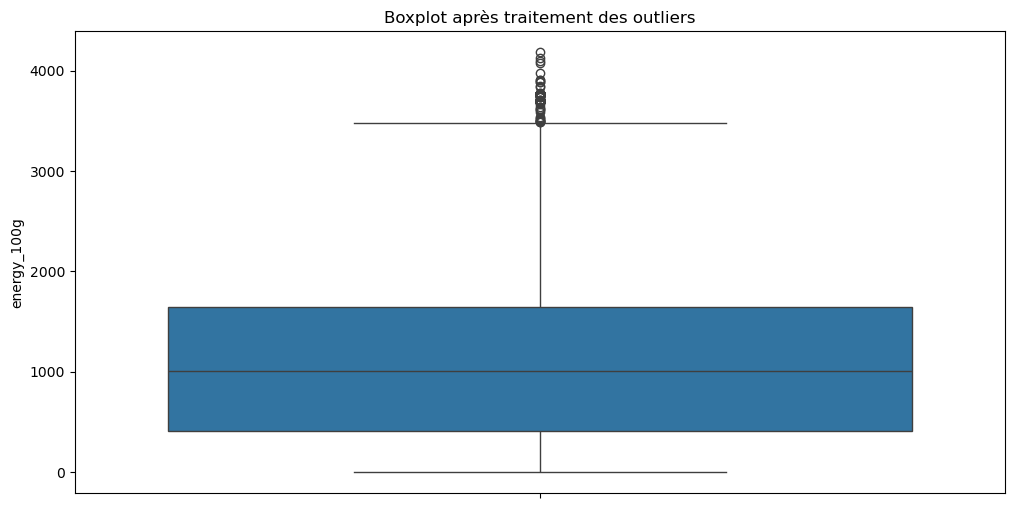

In [912]:
# Visualisation après le traitement des outliers

# Définir les bornes strictes
borne_inférieure = 0
borne_supérieure = 4187

# Filtrer les données en fonction des bornes
mask = (data_filtrée_pertinente['energy_100g'] >= borne_inférieure) & \
       (data_filtrée_pertinente['energy_100g'] <= borne_supérieure)

data_filtrée_pertinente = data_filtrée_pertinente[mask | data_filtrée_pertinente['energy_100g'].isna()]

# Visualisation avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['energy_100g'])
plt.title('Boxplot après traitement des outliers')
plt.show()

In [913]:
data_filtrée_pertinente

code                product_name        pnns_groups_2  \
0              36252              Lion Peanut x2              unknown   
1           10187319              Mini Confettis                  NaN   
2           10207260  Praliné Amande Et Noisette                  NaN   
3           40608754       Pepsi, Nouveau goût !  Sweetened beverages   
4           69161025   Tarte Poireaux Et Lardons                  NaN   
...              ...                         ...                  ...   
54891  7611613001419  Yaourt Nature Sans Lactose                  NaN   
54892  7611613002218  Fromage Blanc Sans Lactose                  NaN   
54893  7611654099246               Graved Salmon     Fish and seafood   
54894  7611654273042       Sablés À La Confiture                  NaN   
54895  7611654555940               Noix de cajou                 Nuts   

      nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                      e       1883.0      20.0                12.5   
1                      d       1753.0       NaN                 0.8   
2                      d       2406.0       NaN                 2.9   
3                      e        177.0       0.0                 0.0   
4                      d       1079.0       NaN                11.0   
...                  ...          ...       ...                 ...   
54891                  b        289.0       NaN                 2.1   
54892                  a        238.0       NaN                 0.3   
54893                  d        690.0       9.0                 2.5   
54894                  e       1862.0       NaN                 7.0   
54895                  d       2520.0      46.0                 9.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
0                    70.0    57.500000         2.5            2.5    0.09652  
1                     NaN    87.699997         0.9            0.6    0.01000  
2                     NaN    50.299999         3.9            9.5    0.00300  
3                    10.4    10.400000         0.0            0.0    0.02540  
4                     NaN     1.000000         1.4            7.5    0.80000  
...                   ...          ...         ...            ...        ...  
54891                 NaN     4.800000         0.0            4.5    0.11000  
54892                 NaN     4.100000         0.0            8.9    0.10000  
54893                 1.0     1.000000         0.0           20.0    2.79400  
54894                 NaN    36.000000         0.0            6.0    1.00000  
54895                26.0     6.000000         2.5           21.0    0.50000  

[54861 rows x 12 columns]

## 3.2. Traitement de la colonne 'saturated-fat_100g' <a id="Traitement-de-la-colonne-'saturated-fat_100g'-"></a>

* ETAPE 1 : Calcul des bornes et identification des Outliers pour détecter et traiter les outliers au niveau global pour saturated-fat_100g.

Nous allons  fixer une borne inférieure à 0 et une borne supérieure à 100: Puisque les graisses saturées ne peuvent pas être négatives. Cela nous permettra de garder uniquement les valeurs qui ont un sens (les valeurs négatives seront considérées comme aberrantes et seront ajustées ou supprimées).

Borne inférieure : 0, Borne supérieure : 100
Valeurs aberrantes détectées :
                                     product_name  saturated-fat_100g
42578  mini choux goût fromage de chèvre - poivre               210.0
Pourcentage des outliers : 0.0018227885018501306%
Moyenne avant traitement : 5.339211463928223
Médiane avant traitement : 1.899999976158142


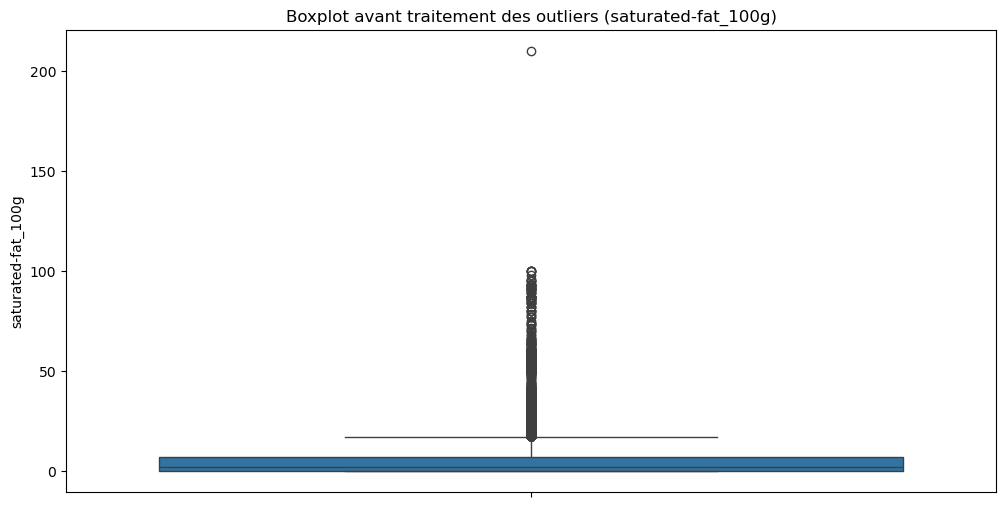

In [918]:
# Définition des bornes fixes pour 'saturated-fat_100g'
borne_inférieure = 0  # Minimum fixé
borne_supérieure = 100  # Maximum fixé

# Affichage des bornes
print(f"Borne inférieure : {borne_inférieure}, Borne supérieure : {borne_supérieure}")

# Identification des outliers
outliers_saturated_fat_data = data_filtrée_pertinente[
    (data_filtrée_pertinente['saturated-fat_100g'] < borne_inférieure) |
    (data_filtrée_pertinente['saturated-fat_100g'] > borne_supérieure)
]

# Affichage des valeurs aberrantes détectées
print(f"Valeurs aberrantes détectées :\n{outliers_saturated_fat_data[['product_name', 'saturated-fat_100g']]}")

# Vérification de la proportion des outliers (on calcule le pourcentage des outliers par rapport au nombre total d'entrées)
outliers_saturated_fat_percentage = (outliers_saturated_fat_data.shape[0] / data_filtrée_pertinente.shape[0]) * 100
# Affichage du pourcentage
print(f"Pourcentage des outliers : {outliers_saturated_fat_percentage}%")

# Impact des outliers sur les statistiques descriptives
mean_before = data_filtrée_pertinente['saturated-fat_100g'].mean()
median_before = data_filtrée_pertinente['saturated-fat_100g'].median()

print(f"Moyenne avant traitement : {mean_before}")
print(f"Médiane avant traitement : {median_before}")

# Visualisation avant le traitement des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['saturated-fat_100g'])
plt.title('Boxplot avant traitement des outliers (saturated-fat_100g)')
plt.show()

* Ligne à corriger

In [921]:
print(data_filtrée_pertinente.loc[42578])

code                                               3596710288755
product_name          mini choux goût fromage de chèvre - poivre
pnns_groups_2                                         Appetizers
nutrition_grade_fr                                             e
energy_100g                                               2118.0
fat_100g                                                   380.0
saturated-fat_100g                                         210.0
carbohydrates_100g                                         190.0
sugars_100g                                            22.700001
fiber_100g                                                   0.0
proteins_100g                                                0.0
salt_100g                                                   9.33
Name: 42578, dtype: object


La valeur réelle pour energy_100g est 2782. Nous devrons la corriger : https://fr.openfoodfacts.org/produit/3596710288755/mini-choux-saveur-chevre-et-poivre-auchan. Nous allons en profiter pour corriger les autres valeurs.

* Correction des valeurs spécifiques

In [925]:
# Ligne 42578
data_filtrée_pertinente.loc[42578, 'energy_100g'] = np.float32(2782.0)
data_filtrée_pertinente.loc[42578, 'fat_100g'] = np.float32(57.0)
data_filtrée_pertinente.loc[42578, 'saturated-fat_100g'] = np.float32(32.0)
data_filtrée_pertinente.loc[42578, 'carbohydrates_100g'] = np.float32(29.0)
data_filtrée_pertinente.loc[42578, 'sugars_100g'] = np.float32(3.4)
data_filtrée_pertinente.loc[42578, 'fiber_100g'] = np.float32(1.0)
data_filtrée_pertinente.loc[42578, 'proteins_100g'] = np.float32(11.0)
data_filtrée_pertinente.loc[42578, 'salt_100g'] = np.float32(1.4)

* ETAPE 2 : Détection et Traitement des Outliers par catégorie PNNS (calcul des bornes IQR par catégorie) spécifique. Pour cela, nous allons utiliser une méthode plus flexible, comme la méthode IQR, pour définir des bornes spécifiques par catégorie.

In [928]:
# Détection des outliers par catégorie PNNS avec ajustement des bornes
outliers_dict = {}

for categorie in data_filtrée_pertinente['pnns_groups_2'].unique():
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Vérification du nombre d'éléments dans la catégorie
  
    if len(subset) > 1:  # S'assurer qu'il y a plus d'une donnée pour calculer l'IQR
        # Calcul des quartiles et de l'IQR pour la catégorie
        Q1 = subset['saturated-fat_100g'].quantile(0.25)
        Q3 = subset['saturated-fat_100g'].quantile(0.75)
        IQR = Q3 - Q1

        # Définition des bornes pour chaque catégorie avec ajustement ( bornes strictes basées sur la logique métier : 
        #Borne inférieure : Forcée à 0 car les graisses saturées ne peuvent pas être négatives. 
        #Borne supérieure : Si l'IQR produit une borne trop large (par exemple, >100), on impose une limite métier raisonnable.
        borne_inf = max(0, Q1 - 1.5 * IQR)  # Fixer la borne inférieure à 0 si elle est négative
        borne_sup = min(100, Q3 + 1.5 * IQR)  # Limite réaliste à 100

        # Enregistrement des bornes dans un dictionnaire pour suivi
        outliers_dict[categorie] = {'borne_inf': borne_inf, 'borne_sup': borne_sup}
        
        # Identification des outliers pour chaque catégorie
        outliers = subset[
            (subset['saturated-fat_100g'] < borne_inf) | 
            (subset['saturated-fat_100g'] > borne_sup)
        ]
        
        # Affichage des informations de détection des outliers
        print(f"Catégorie PNNS : {categorie}")
        print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
        print(f"Nombre d'outliers dans cette catégorie : {len(outliers)}\n")
    else:
        print(f"Catégorie {categorie} a trop peu de données pour calculer l'IQR. Aucune opération effectuée.\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 16.99999976158142
Nombre d'outliers dans cette catégorie : 446

Catégorie nan a trop peu de données pour calculer l'IQR. Aucune opération effectuée.

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 0.2500000037252903
Nombre d'outliers dans cette catégorie : 181

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 0, Borne supérieure : 28.505000114440918
Nombre d'outliers dans cette catégorie : 2

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 6.449999928474426
Nombre d'outliers dans cette catégorie : 215

Catégorie PNNS : Soups
Borne inférieure : 0, Borne supérieure : 1.7000000476837158
Nombre d'outliers dans cette catégorie : 16

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 0.2500000037252903
Nombre d'outliers dans cette catégorie : 212

Catégorie PNNS : Cheese
Borne inférieure : 5.0, Borne supérieure : 29.0
Nombre d'outliers d

In [930]:
# Remplacement des outliers par la médiane
for categorie, bornes in outliers_dict.items():
    borne_inf = bornes['borne_inf']
    borne_sup = bornes['borne_sup']
    
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Remplacement des outliers par la médiane de la catégorie
    median_value = subset['saturated-fat_100g'].median()
    
    # Remplacer les valeurs aberrantes par la médiane dans le DataFrame original
    data_filtrée_pertinente.loc[
        (data_filtrée_pertinente['pnns_groups_2'] == categorie) &
        ((data_filtrée_pertinente['saturated-fat_100g'] < borne_inf) | 
         (data_filtrée_pertinente['saturated-fat_100g'] > borne_sup)),
        'saturated-fat_100g'
    ] = median_value
    
    # Affichage des informations de remplacement
    print(f"Catégorie PNNS : {categorie}")
    print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
    print(f"Remplacement effectué par la médiane : {median_value}\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 16.99999976158142
Remplacement effectué par la médiane : 2.2799999713897705

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 0.2500000037252903
Remplacement effectué par la médiane : 0.0

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 0, Borne supérieure : 28.505000114440918
Remplacement effectué par la médiane : 9.699999809265137

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 6.449999928474426
Remplacement effectué par la médiane : 1.5

Catégorie PNNS : Soups
Borne inférieure : 0, Borne supérieure : 1.7000000476837158
Remplacement effectué par la médiane : 0.5

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 0.2500000037252903
Remplacement effectué par la médiane : 0.0

Catégorie PNNS : Cheese
Borne inférieure : 5.0, Borne supérieure : 29.0
Remplacement effectué par la médiane : 17.700000762939453

Catégorie PNNS : Sweets
Bo

* Visualisation après traitement des outliers dans la colonne saturated-fat_100g.

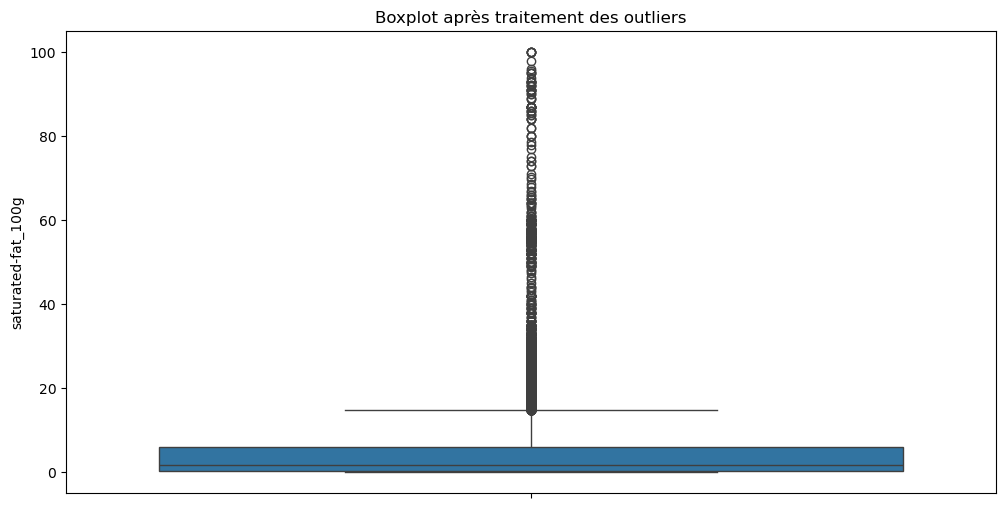

In [933]:
# Visualisation après le traitement des outliers

# Définir les bornes strictes
borne_inférieure = 0
borne_supérieure = 100

# Filtrer les données en fonction des bornes
mask = (data_filtrée_pertinente['saturated-fat_100g'] >= borne_inférieure) & \
       (data_filtrée_pertinente['saturated-fat_100g'] <= borne_supérieure)

data_filtrée_pertinente = data_filtrée_pertinente[mask | data_filtrée_pertinente['saturated-fat_100g'].isna()]

# Visualisation avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['saturated-fat_100g'])
plt.title('Boxplot après traitement des outliers')
plt.show()

In [935]:
data_filtrée_pertinente

code                product_name        pnns_groups_2  \
0              36252              Lion Peanut x2              unknown   
1           10187319              Mini Confettis                  NaN   
2           10207260  Praliné Amande Et Noisette                  NaN   
3           40608754       Pepsi, Nouveau goût !  Sweetened beverages   
4           69161025   Tarte Poireaux Et Lardons                  NaN   
...              ...                         ...                  ...   
54891  7611613001419  Yaourt Nature Sans Lactose                  NaN   
54892  7611613002218  Fromage Blanc Sans Lactose                  NaN   
54893  7611654099246               Graved Salmon     Fish and seafood   
54894  7611654273042       Sablés À La Confiture                  NaN   
54895  7611654555940               Noix de cajou                 Nuts   

      nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                      e       1883.0      20.0                12.5   
1                      d       1753.0       NaN                 0.8   
2                      d       2406.0       NaN                 2.9   
3                      e        177.0       0.0                 0.0   
4                      d       1079.0       NaN                11.0   
...                  ...          ...       ...                 ...   
54891                  b        289.0       NaN                 2.1   
54892                  a        238.0       NaN                 0.3   
54893                  d        690.0       9.0                 2.5   
54894                  e       1862.0       NaN                 7.0   
54895                  d       2520.0      46.0                 9.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
0                    70.0    57.500000         2.5            2.5    0.09652  
1                     NaN    87.699997         0.9            0.6    0.01000  
2                     NaN    50.299999         3.9            9.5    0.00300  
3                    10.4    10.400000         0.0            0.0    0.02540  
4                     NaN     1.000000         1.4            7.5    0.80000  
...                   ...          ...         ...            ...        ...  
54891                 NaN     4.800000         0.0            4.5    0.11000  
54892                 NaN     4.100000         0.0            8.9    0.10000  
54893                 1.0     1.000000         0.0           20.0    2.79400  
54894                 NaN    36.000000         0.0            6.0    1.00000  
54895                26.0     6.000000         2.5           21.0    0.50000  

[54861 rows x 12 columns]

## 3.3. Traitement de la colonne 'fat_100g' <a id="Traitement-de-la-colonne-'fat_100g'-"></a>

* ETAPE 1 : Calcul des bornes et identification des Outliers pour détecter et traiter les outliers au niveau global pour fat_100g.

Nous allons également fixer une borne inférieure à 0 et une borne supérieure à 100: Puisque les graisses ne peuvent pas être négatives. Cela nous permettra de garder uniquement les valeurs qui ont un sens (les valeurs négatives seront considérées comme aberrantes et seront ajustées ou supprimées).

Borne inférieure : 0, Borne supérieure : 100
Valeurs aberrantes détectées :
Empty DataFrame
Columns: [product_name, fat_100g]
Index: []
Pourcentage des outliers : 0.0%
Moyenne avant traitement : 13.123156547546387
Médiane avant traitement : 6.800000190734863


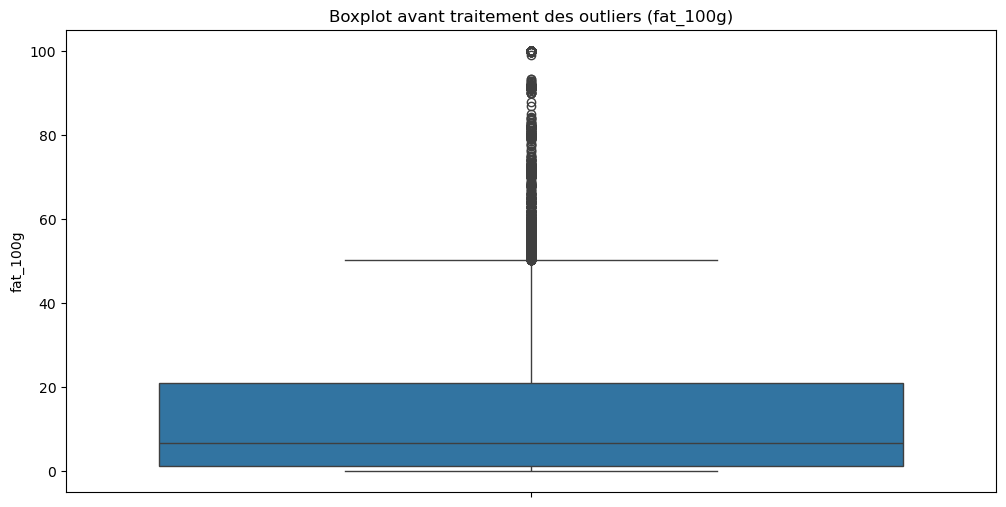

In [939]:
# Définition des bornes fixes pour 'fat_100g'
borne_inférieure = 0  # Minimum fixé
borne_supérieure = 100  # Maximum fixé

# Affichage des bornes
print(f"Borne inférieure : {borne_inférieure}, Borne supérieure : {borne_supérieure}")

# Identification des outliers
outliers_fat_data = data_filtrée_pertinente[
    (data_filtrée_pertinente['fat_100g'] < borne_inférieure) |
    (data_filtrée_pertinente['fat_100g'] > borne_supérieure)
]

# Affichage des valeurs aberrantes détectées
print(f"Valeurs aberrantes détectées :\n{outliers_fat_data[['product_name', 'fat_100g']]}")

# Vérification de la proportion des outliers (on calcule le pourcentage des outliers par rapport au nombre total d'entrées)
outliers_fat_percentage = (outliers_fat_data.shape[0] / data_filtrée_pertinente.shape[0]) * 100
# Affichage du pourcentage
print(f"Pourcentage des outliers : {outliers_fat_percentage}%")

# Impact des outliers sur les statistiques descriptives
mean_before = data_filtrée_pertinente['fat_100g'].mean()
median_before = data_filtrée_pertinente['fat_100g'].median()

print(f"Moyenne avant traitement : {mean_before}")
print(f"Médiane avant traitement : {median_before}")

# Visualisation avant le traitement des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['fat_100g'])
plt.title('Boxplot avant traitement des outliers (fat_100g)')
plt.show()

Les résultats que nous avons obtenus pour la colonne fat_100g montrent qu'il n'y a pas de valeurs évidentes d'outliers (valeurs supérieures à 100) dans nos données initiales, ce qui explique l'absence de lignes affichées dans les tableaux des produits associés aux outliers et un pourcentage de 0%.

Aucune valeur supérieure à 100g de graisses n'a été trouvée (Empty DataFrame).
Cela confirme que nos données ne contiennent pas de valeurs extrêmes dans cette plage, au niveau global.

* ETAPE 2 : Détection et Traitement des Outliers par catégorie PNNS (calcul des bornes IQR par catégorie) spécifique. Pour cela, nous allons utiliser une méthode plus flexible, comme la méthode IQR, pour définir des bornes spécifiques par catégorie.

In [943]:
# Détection des outliers par catégorie PNNS
outliers_dict = {}

# Parcours des catégories dans 'pnns_groups_2'
for categorie in data_filtrée_pertinente['pnns_groups_2'].unique():
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Vérification du nombre d'éléments dans la catégorie
    if len(subset) > 1:  # S'assurer qu'il y a plus d'une donnée pour calculer l'IQR
        # Calcul des quartiles et de l'IQR pour la catégorie
        Q1 = subset['fat_100g'].quantile(0.25)
        Q3 = subset['fat_100g'].quantile(0.75)
        IQR = Q3 - Q1

        # Définition des bornes pour chaque catégorie avec ajustement ( bornes strictes basées sur la logique métier : 
        #Borne inférieure : Forcée à 0 car les graisses ne peuvent pas être négatives. 
        #Borne supérieure : Si l'IQR produit une borne trop large (par exemple, >100), on impose une limite métier raisonnable.
        borne_inf = max(0, Q1 - 1.5 * IQR)  # Fixer la borne inférieure à 0 si elle est négative
        borne_sup = min(100, Q3 + 1.5 * IQR)  # Limite réaliste à 100

        # Enregistrement des bornes dans un dictionnaire pour suivi
        outliers_dict[categorie] = {'borne_inf': borne_inf, 'borne_sup': borne_sup}
        
        # Identification des outliers pour chaque catégorie
        outliers = subset[
            (subset['fat_100g'] < borne_inf) | 
            (subset['fat_100g'] > borne_sup)
        ]
        
        # Affichage des informations de détection des outliers
        print(f"Catégorie PNNS : {categorie}")
        print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
        print(f"Nombre d'outliers dans cette catégorie : {len(outliers)}\n")
    else:
        print(f"Catégorie {categorie} a trop peu de données pour calculer l'IQR. Aucune opération effectuée.\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 46.40000057220459
Nombre d'outliers dans cette catégorie : 236

Catégorie nan a trop peu de données pour calculer l'IQR. Aucune opération effectuée.

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 0.2500000037252903
Nombre d'outliers dans cette catégorie : 263

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 2.2499990463256836, Borne supérieure : 38.65000057220459
Nombre d'outliers dans cette catégorie : 74

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 17.227500200271606
Nombre d'outliers dans cette catégorie : 161

Catégorie PNNS : Soups
Borne inférieure : 0, Borne supérieure : 3.650000035762787
Nombre d'outliers dans cette catégorie : 18

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 2.5
Nombre d'outliers dans cette catégorie : 81

Catégorie PNNS : Cheese
Borne inférieure : 8.25, Borne supérieure : 42.25
Nombre d'outlier

In [945]:
# Remplacement des outliers par la médiane
for categorie, bornes in outliers_dict.items():
    borne_inf = bornes['borne_inf']
    borne_sup = bornes['borne_sup']
    
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Remplacement des outliers par la médiane de la catégorie
    median_value = subset['fat_100g'].median()
    
    # Remplacer les valeurs aberrantes par la médiane dans le DataFrame original
    data_filtrée_pertinente.loc[
        (data_filtrée_pertinente['pnns_groups_2'] == categorie) &
        ((data_filtrée_pertinente['fat_100g'] < borne_inf) | 
         (data_filtrée_pertinente['fat_100g'] > borne_sup)),
        'fat_100g'
    ] = median_value
    
    # Affichage des informations de remplacement
    print(f"Catégorie PNNS : {categorie}")
    print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
    print(f"Remplacement effectué par la médiane : {median_value}\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 46.40000057220459
Remplacement effectué par la médiane : 8.399999618530273

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 0.2500000037252903
Remplacement effectué par la médiane : 0.0

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 2.2499990463256836, Borne supérieure : 38.65000057220459
Remplacement effectué par la médiane : 21.299999237060547

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 17.227500200271606
Remplacement effectué par la médiane : 6.0

Catégorie PNNS : Soups
Borne inférieure : 0, Borne supérieure : 3.650000035762787
Remplacement effectué par la médiane : 1.2000000476837158

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 2.5
Remplacement effectué par la médiane : 0.10000000149011612

Catégorie PNNS : Cheese
Borne inférieure : 8.25, Borne supérieure : 42.25
Remplacement effectué par la médiane : 25.549999237

* Visualisation après traitement des outliers dans la colonne fat_100g.

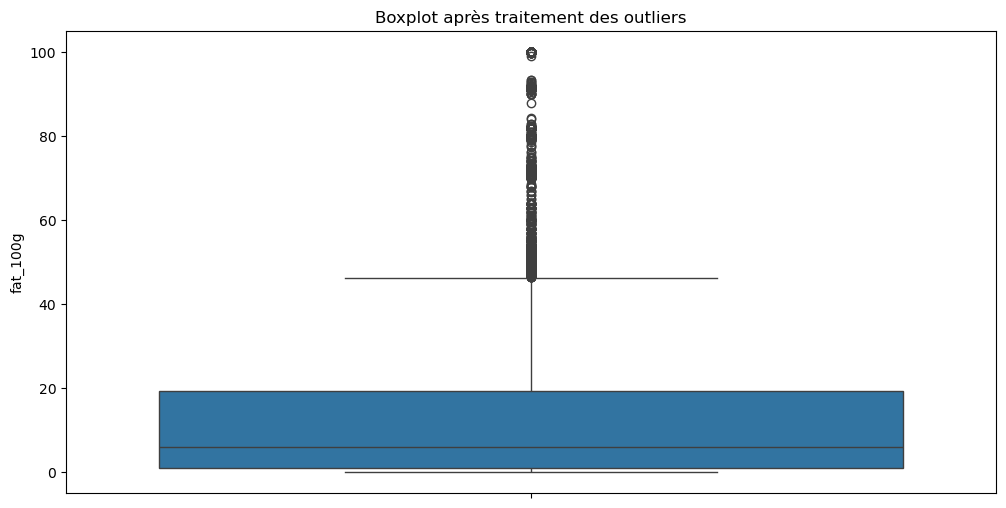

In [948]:
# Visualisation après le traitement des outliers

# Définir les bornes strictes
borne_inférieure = 0
borne_supérieure = 100

# Filtrer les données en fonction des bornes
mask = (data_filtrée_pertinente['fat_100g'] >= borne_inférieure) & \
       (data_filtrée_pertinente['fat_100g'] <= borne_supérieure)

data_filtrée_pertinente = data_filtrée_pertinente[mask | data_filtrée_pertinente['fat_100g'].isna()]

# Visualisation avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['fat_100g'])
plt.title('Boxplot après traitement des outliers')
plt.show()

In [949]:
data_filtrée_pertinente

code                product_name        pnns_groups_2  \
0              36252              Lion Peanut x2              unknown   
1           10187319              Mini Confettis                  NaN   
2           10207260  Praliné Amande Et Noisette                  NaN   
3           40608754       Pepsi, Nouveau goût !  Sweetened beverages   
4           69161025   Tarte Poireaux Et Lardons                  NaN   
...              ...                         ...                  ...   
54891  7611613001419  Yaourt Nature Sans Lactose                  NaN   
54892  7611613002218  Fromage Blanc Sans Lactose                  NaN   
54893  7611654099246               Graved Salmon     Fish and seafood   
54894  7611654273042       Sablés À La Confiture                  NaN   
54895  7611654555940               Noix de cajou                 Nuts   

      nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                      e       1883.0      20.0                12.5   
1                      d       1753.0       NaN                 0.8   
2                      d       2406.0       NaN                 2.9   
3                      e        177.0       0.0                 0.0   
4                      d       1079.0       NaN                11.0   
...                  ...          ...       ...                 ...   
54891                  b        289.0       NaN                 2.1   
54892                  a        238.0       NaN                 0.3   
54893                  d        690.0       9.0                 2.5   
54894                  e       1862.0       NaN                 7.0   
54895                  d       2520.0      46.0                 9.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
0                    70.0    57.500000         2.5            2.5    0.09652  
1                     NaN    87.699997         0.9            0.6    0.01000  
2                     NaN    50.299999         3.9            9.5    0.00300  
3                    10.4    10.400000         0.0            0.0    0.02540  
4                     NaN     1.000000         1.4            7.5    0.80000  
...                   ...          ...         ...            ...        ...  
54891                 NaN     4.800000         0.0            4.5    0.11000  
54892                 NaN     4.100000         0.0            8.9    0.10000  
54893                 1.0     1.000000         0.0           20.0    2.79400  
54894                 NaN    36.000000         0.0            6.0    1.00000  
54895                26.0     6.000000         2.5           21.0    0.50000  

[54861 rows x 12 columns]

## 3.4. Traitement de la colonne 'carbohydrates_100g' <a id="Traitement-de-la-colonne-'carbohydrates_100g'-"></a>

* ETAPE 1 : Calcul des bornes et identification des Outliers pour détecter et traiter les outliers au niveau global pour carbohydrates_100g.

Nous allons également fixer une borne inférieure à 0 et une borne supérieure à 100.

Borne inférieure : 0, Borne supérieure : 100
Valeurs aberrantes détectées :
                 product_name  carbohydrates_100g
14511  Sirop d'Agave brun bio               104.0
35504       Palets pur beurre               106.0
49297       Sirop d agave pur               103.5
Pourcentage des outliers : 0.005468365505550391%
Moyenne avant traitement : 27.071245193481445
Médiane avant traitement : 14.0


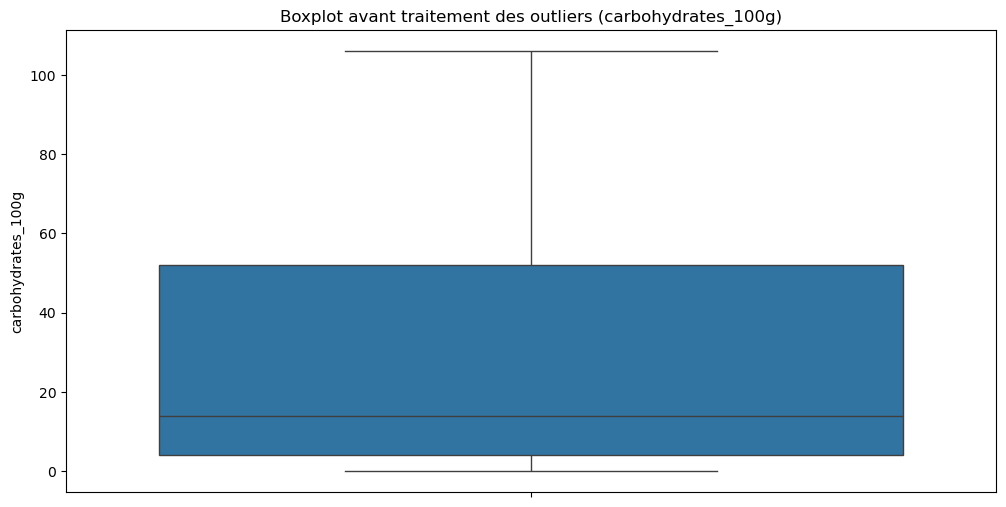

In [954]:
# Définition des bornes fixes pour 'carbohydrates_100g'
borne_inférieure = 0  # Minimum fixé
borne_supérieure = 100  # Maximum fixé

# Affichage des bornes
print(f"Borne inférieure : {borne_inférieure}, Borne supérieure : {borne_supérieure}")

# Identification des outliers
outliers_carbohydrates_data = data_filtrée_pertinente[
    (data_filtrée_pertinente['carbohydrates_100g'] < borne_inférieure) |
    (data_filtrée_pertinente['carbohydrates_100g'] > borne_supérieure)
]

# Affichage des valeurs aberrantes détectées
print(f"Valeurs aberrantes détectées :\n{outliers_carbohydrates_data[['product_name', 'carbohydrates_100g']]}")

# Vérification de la proportion des outliers (on calcule le pourcentage des outliers par rapport au nombre total d'entrées)
outliers_carbohydrates_percentage = (outliers_carbohydrates_data.shape[0] / data_filtrée_pertinente.shape[0]) * 100
# Affichage du pourcentage
print(f"Pourcentage des outliers : {outliers_carbohydrates_percentage}%")

# Impact des outliers sur les statistiques descriptives
mean_before = data_filtrée_pertinente['carbohydrates_100g'].mean()
median_before = data_filtrée_pertinente['carbohydrates_100g'].median()

print(f"Moyenne avant traitement : {mean_before}")
print(f"Médiane avant traitement : {median_before}")

# Visualisation avant le traitement des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['carbohydrates_100g'])
plt.title('Boxplot avant traitement des outliers (carbohydrates_100g)')
plt.show()

#### a) Première ligne à corriger

In [957]:
print(data_filtrée_pertinente.loc[14511])

code                           3229820787909
product_name          Sirop d'Agave brun bio
pnns_groups_2                        unknown
nutrition_grade_fr                         d
energy_100g                           1760.0
fat_100g                                 0.0
saturated-fat_100g                       0.0
carbohydrates_100g                     104.0
sugars_100g                            104.0
fiber_100g                               0.0
proteins_100g                            0.0
salt_100g                               0.14
Name: 14511, dtype: object


#### b) Deuxième ligne à corriger

In [960]:
print(data_filtrée_pertinente.loc[35504])

code                       3473710080032
product_name           Palets pur beurre
pnns_groups_2         Biscuits and cakes
nutrition_grade_fr                     e
energy_100g                       1941.0
fat_100g                       21.299999
saturated-fat_100g                   9.7
carbohydrates_100g                 106.0
sugars_100g                         52.0
fiber_100g                           3.0
proteins_100g                       10.0
salt_100g                        1.30048
Name: 35504, dtype: object


#### C) Troisième ligne à corriger

In [963]:
print(data_filtrée_pertinente.loc[49297])

code                      4016249015732
product_name          Sirop d agave pur
pnns_groups_2                   unknown
nutrition_grade_fr                    d
energy_100g                      1760.0
fat_100g                            1.0
saturated-fat_100g                  0.1
carbohydrates_100g                103.5
sugars_100g                       103.5
fiber_100g                          NaN
proteins_100g                       1.0
salt_100g                           0.1
Name: 49297, dtype: object


Après vérification sur le site, 

https://fr.openfoodfacts.org/produit/3229820787909/sirop-d-agave-brun-bio-bjorg

https://fr.openfoodfacts.org/produit/3473710080032/palets-pur-beurre-georges-blanc

https://fr.openfoodfacts.org/produit/4016249015732/sirop-d-agave-pur-allos 

Nous allons les corriger légèrement pour être conforme aux valeurs du site.


* Correction des valeurs spécifiques des lignes 14511, 35504 et 49297

In [967]:
# Correction des valeurs pour les produits spécifiques
# Ligne 14511
data_filtrée_pertinente.loc[14511, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[14511, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[14511, 'carbohydrates_100g'] = np.float32(103.5)
data_filtrée_pertinente.loc[14511, 'sugars_100g'] = np.float32(103.5)
data_filtrée_pertinente.loc[14511, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[14511, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[14511, 'salt_100g'] = np.float32(0.0)


# Ligne 35504
data_filtrée_pertinente.loc[35504, 'energy_100g'] = np.float32(2268.0)
data_filtrée_pertinente.loc[35504, 'fat_100g'] = np.float32(31.7)
data_filtrée_pertinente.loc[35504, 'saturated-fat_100g'] = np.float32(21.3)
data_filtrée_pertinente.loc[35504, 'carbohydrates_100g'] = np.float32(58.6)
data_filtrée_pertinente.loc[35504, 'sugars_100g'] = np.float32(27.4)
data_filtrée_pertinente.loc[35504, 'fiber_100g'] = np.float32(3.0)
data_filtrée_pertinente.loc[35504, 'proteins_100g'] = np.float32(5.6)
data_filtrée_pertinente.loc[35504, 'salt_100g'] = np.float32(0.0)


# Ligne 49297
data_filtrée_pertinente.loc[49297, 'energy_100g'] = np.float32(1757.0)
data_filtrée_pertinente.loc[49297, 'fat_100g'] = np.float32(0.1)
data_filtrée_pertinente.loc[49297, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[49297, 'proteins_100g'] = np.float32(0.1)
data_filtrée_pertinente.loc[49297, 'salt_100g'] = np.float32(0.013)

# Vérification après correction
print(data_filtrée_pertinente.loc[[14511, 35504, 49297]])

                code            product_name       pnns_groups_2  \
14511  3229820787909  Sirop d'Agave brun bio             unknown   
35504  3473710080032       Palets pur beurre  Biscuits and cakes   
49297  4016249015732       Sirop d agave pur             unknown   

      nutrition_grade_fr  energy_100g   fat_100g  saturated-fat_100g  \
14511                  d       1760.0   0.000000            0.000000   
35504                  e       2268.0  31.700001           21.299999   
49297                  d       1757.0   0.100000            0.000000   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
14511          103.500000        103.5         0.0            0.0      0.000  
35504           58.599998         27.4         3.0            5.6      0.000  
49297          103.500000        103.5         NaN            0.1      0.013  


* ETAPE 2 : Détection et Traitement des Outliers par catégorie PNNS (calcul des bornes IQR par catégorie) spécifique. Pour cela, nous allons utiliser une méthode plus flexible, comme la méthode IQR, pour définir des bornes spécifiques par catégorie.

In [970]:
# Détection des outliers par catégorie PNNS
outliers_dict = {}

# Parcours des catégories dans 'pnns_groups_2'
for categorie in data_filtrée_pertinente['pnns_groups_2'].unique():
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Vérification du nombre d'éléments dans la catégorie
    if len(subset) > 1:  # S'assurer qu'il y a plus d'une donnée pour calculer l'IQR
        # Calcul des quartiles et de l'IQR pour la catégorie
        Q1 = subset['carbohydrates_100g'].quantile(0.25)
        Q3 = subset['carbohydrates_100g'].quantile(0.75)
        IQR = Q3 - Q1

        # Définition des bornes pour chaque catégorie avec ajustement ( bornes strictes basées sur la logique métier : 
        #Borne inférieure : Forcée à 0 car les glucides ne peuvent pas être négatives. 
        #Borne supérieure : Si l'IQR produit une borne trop large (par exemple, >100), on impose une limite métier raisonnable.
        borne_inf = max(0, Q1 - 1.5 * IQR)  # Fixer la borne inférieure à 0 si elle est négative
        borne_sup = min(106, Q3 + 1.5 * IQR)  # Limite réaliste à 100 (mais je l'ai ramené à 106 du fait des lignes suivantes : 
        #14511: Sirop d'Agave brun bio(104.0), 35504: Palets pur beurre(106.0) et 49297: Sirop d agave pur(103.5) qui sont les valeurs réelles

        # Enregistrement des bornes dans un dictionnaire pour suivi
        outliers_dict[categorie] = {'borne_inf': borne_inf, 'borne_sup': borne_sup}
        
        # Identification des outliers pour chaque catégorie
        outliers = subset[
            (subset['carbohydrates_100g'] < borne_inf) | 
            (subset['carbohydrates_100g'] > borne_sup)
        ]
        
        # Affichage des informations de détection des outliers
        print(f"Catégorie PNNS : {categorie}")
        print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
        print(f"Nombre d'outliers dans cette catégorie : {len(outliers)}\n")
    else:
        print(f"Catégorie {categorie} a trop peu de données pour calculer l'IQR. Aucune opération effectuée.\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 106
Nombre d'outliers dans cette catégorie : 0

Catégorie nan a trop peu de données pour calculer l'IQR. Aucune opération effectuée.

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0.25, Borne supérieure : 18.25
Nombre d'outliers dans cette catégorie : 231

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 36.150001525878906, Borne supérieure : 86.1500015258789
Nombre d'outliers dans cette catégorie : 93

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 30.95000123977661
Nombre d'outliers dans cette catégorie : 96

Catégorie PNNS : Soups
Borne inférieure : 1.7999999523162842, Borne supérieure : 7.400000333786011
Nombre d'outliers dans cette catégorie : 20

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 26.125
Nombre d'outliers dans cette catégorie : 76

Catégorie PNNS : Cheese
Borne inférieure : 0, Borne supérieure : 6.450000047683716
Nombre d'outlier

In [972]:
# Remplacement des outliers par la médiane
for categorie, bornes in outliers_dict.items():
    borne_inf = bornes['borne_inf']
    borne_sup = bornes['borne_sup']
    
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Remplacement des outliers par la médiane de la catégorie
    median_value = subset['carbohydrates_100g'].median()
    
    # Remplacer les valeurs aberrantes par la médiane dans le DataFrame original
    data_filtrée_pertinente.loc[
        (data_filtrée_pertinente['pnns_groups_2'] == categorie) &
        ((data_filtrée_pertinente['carbohydrates_100g'] < borne_inf) | 
         (data_filtrée_pertinente['carbohydrates_100g'] > borne_sup)),
        'carbohydrates_100g'
    ] = median_value
    
    # Affichage des informations de remplacement
    print(f"Catégorie PNNS : {categorie}")
    print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
    print(f"Remplacement effectué par la médiane : {median_value}\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 106
Remplacement effectué par la médiane : 21.0

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0.25, Borne supérieure : 18.25
Remplacement effectué par la médiane : 9.800000190734863

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 36.150001525878906, Borne supérieure : 86.1500015258789
Remplacement effectué par la médiane : 61.79999923706055

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 30.95000123977661
Remplacement effectué par la médiane : 11.050000190734863

Catégorie PNNS : Soups
Borne inférieure : 1.7999999523162842, Borne supérieure : 7.400000333786011
Remplacement effectué par la médiane : 4.599999904632568

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 26.125
Remplacement effectué par la médiane : 4.800000190734863

Catégorie PNNS : Cheese
Borne inférieure : 0, Borne supérieure : 6.450000047683716
Remplacement effectué par la médiane

* Visualisation après traitement des outliers dans la colonne carbohydrates_100g.

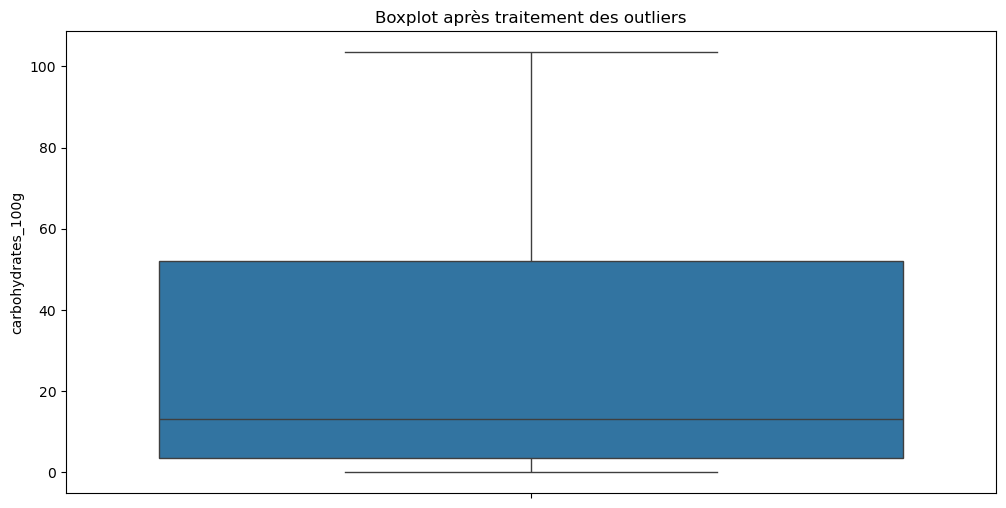

In [975]:
# Visualisation après le traitement des outliers

# Définir les bornes strictes
borne_inférieure = 0
borne_supérieure = 106

# Filtrer les données en fonction des bornes
mask = (data_filtrée_pertinente['carbohydrates_100g'] >= borne_inférieure) & \
       (data_filtrée_pertinente['carbohydrates_100g'] <= borne_supérieure)

data_filtrée_pertinente = data_filtrée_pertinente[mask | data_filtrée_pertinente['carbohydrates_100g'].isna()]

# Visualisation avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['carbohydrates_100g'])
plt.title('Boxplot après traitement des outliers')
plt.show()

In [976]:
data_filtrée_pertinente

code                product_name        pnns_groups_2  \
0              36252              Lion Peanut x2              unknown   
1           10187319              Mini Confettis                  NaN   
2           10207260  Praliné Amande Et Noisette                  NaN   
3           40608754       Pepsi, Nouveau goût !  Sweetened beverages   
4           69161025   Tarte Poireaux Et Lardons                  NaN   
...              ...                         ...                  ...   
54891  7611613001419  Yaourt Nature Sans Lactose                  NaN   
54892  7611613002218  Fromage Blanc Sans Lactose                  NaN   
54893  7611654099246               Graved Salmon     Fish and seafood   
54894  7611654273042       Sablés À La Confiture                  NaN   
54895  7611654555940               Noix de cajou                 Nuts   

      nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                      e       1883.0      20.0                12.5   
1                      d       1753.0       NaN                 0.8   
2                      d       2406.0       NaN                 2.9   
3                      e        177.0       0.0                 0.0   
4                      d       1079.0       NaN                11.0   
...                  ...          ...       ...                 ...   
54891                  b        289.0       NaN                 2.1   
54892                  a        238.0       NaN                 0.3   
54893                  d        690.0       9.0                 2.5   
54894                  e       1862.0       NaN                 7.0   
54895                  d       2520.0      46.0                 9.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
0                    70.0    57.500000         2.5            2.5    0.09652  
1                     NaN    87.699997         0.9            0.6    0.01000  
2                     NaN    50.299999         3.9            9.5    0.00300  
3                    10.4    10.400000         0.0            0.0    0.02540  
4                     NaN     1.000000         1.4            7.5    0.80000  
...                   ...          ...         ...            ...        ...  
54891                 NaN     4.800000         0.0            4.5    0.11000  
54892                 NaN     4.100000         0.0            8.9    0.10000  
54893                 1.0     1.000000         0.0           20.0    2.79400  
54894                 NaN    36.000000         0.0            6.0    1.00000  
54895                26.0     6.000000         2.5           21.0    0.50000  

[54861 rows x 12 columns]

## 3.5. Traitement de la colonne 'sugars_100g' <a id="Traitement-de-la-colonne-'sugars_100g'-"></a>

* ETAPE 1 : Calcul des bornes et identification des Outliers pour détecter et traiter les outliers au niveau global pour sugars_100g.

Nous allons également fixer une borne inférieure à 0 et une borne supérieure à 100.

Borne inférieure : 0, Borne supérieure : 100
Valeurs aberrantes détectées :
                 product_name  sugars_100g
10161       Caprice des dieux         -0.1
14511  Sirop d'Agave brun bio        103.5
49297       Sirop d agave pur        103.5
Pourcentage des outliers : 0.005468365505550391%
Moyenne avant traitement : 12.906048774719238
Médiane avant traitement : 4.0


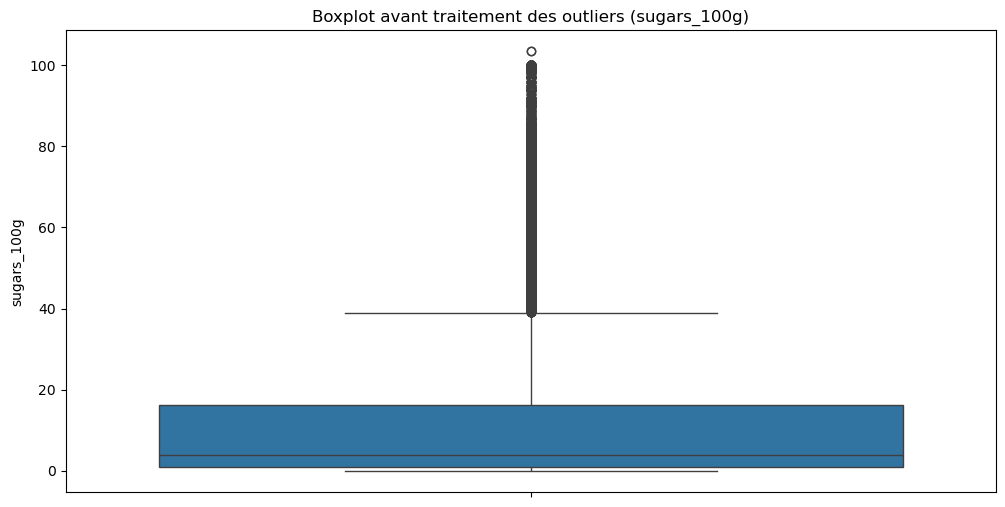

In [981]:
# Définition des bornes fixes pour 'sugars_100g'
borne_inférieure = 0  # Minimum fixé
borne_supérieure = 100  # Maximum fixé

# Affichage des bornes
print(f"Borne inférieure : {borne_inférieure}, Borne supérieure : {borne_supérieure}")

# Identification des outliers
outliers_sugars_data = data_filtrée_pertinente[
    (data_filtrée_pertinente['sugars_100g'] < borne_inférieure) |
    (data_filtrée_pertinente['sugars_100g'] > borne_supérieure)
]

# Affichage des valeurs aberrantes détectées
print(f"Valeurs aberrantes détectées :\n{outliers_sugars_data[['product_name', 'sugars_100g']]}")

# Vérification de la proportion des outliers (on calcule le pourcentage des outliers par rapport au nombre total d'entrées)
outliers_sugars_percentage = (outliers_sugars_data.shape[0] / data_filtrée_pertinente.shape[0]) * 100
# Affichage du pourcentage
print(f"Pourcentage des outliers : {outliers_sugars_percentage}%")

# Impact des outliers sur les statistiques descriptives
mean_before = data_filtrée_pertinente['sugars_100g'].mean()
median_before = data_filtrée_pertinente['sugars_100g'].median()

print(f"Moyenne avant traitement : {mean_before}")
print(f"Médiane avant traitement : {median_before}")

# Visualisation avant le traitement des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['sugars_100g'])
plt.title('Boxplot avant traitement des outliers (sugars_100g)')
plt.show()

#### a) Ligne à corriger

In [984]:
print(data_filtrée_pertinente.loc[10161])

code                      3161712000928
product_name          Caprice des dieux
pnns_groups_2                    Cheese
nutrition_grade_fr                    d
energy_100g                      1379.0
fat_100g                           30.0
saturated-fat_100g                 21.0
carbohydrates_100g                  0.8
sugars_100g                        -0.1
fiber_100g                          NaN
proteins_100g                      15.3
salt_100g                           1.4
Name: 10161, dtype: object


Après vérification sur le site, la valeur -0.1 va être remplacée par 0 : 

https://fr.openfoodfacts.org/produit/3161711001971/caprice-des-dieux-cheese

les autres valeurs correspondent.

* Correction de la valeur pour la ligne 10161

In [988]:
# Correction des valeurs pour les produits spécifiques
data_filtrée_pertinente.loc[10161, 'sugars_100g'] = np.float32(0.0)

# Vérification après correction
print(data_filtrée_pertinente.loc[10161])

code                      3161712000928
product_name          Caprice des dieux
pnns_groups_2                    Cheese
nutrition_grade_fr                    d
energy_100g                      1379.0
fat_100g                           30.0
saturated-fat_100g                 21.0
carbohydrates_100g                  0.8
sugars_100g                         0.0
fiber_100g                          NaN
proteins_100g                      15.3
salt_100g                           1.4
Name: 10161, dtype: object


* ETAPE 2 : Détection et Traitement des Outliers par catégorie PNNS (calcul des bornes IQR par catégorie spécifique). Pour cela, nous allons utiliser une méthode plus flexible, comme la méthode IQR, pour définir des bornes spécifiques par catégorie.

In [991]:
# Détection des outliers par catégorie PNNS
outliers_dict = {}

# Parcours des catégories dans 'pnns_groups_2'
for categorie in data_filtrée_pertinente['pnns_groups_2'].unique():
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Vérification du nombre d'éléments dans la catégorie
    if len(subset) > 1:  # S'assurer qu'il y a plus d'une donnée pour calculer l'IQR
        # Calcul des quartiles et de l'IQR pour la catégorie
        Q1 = subset['sugars_100g'].quantile(0.25)
        Q3 = subset['sugars_100g'].quantile(0.75)
        IQR = Q3 - Q1

        # Définition des bornes pour chaque catégorie avec ajustement ( bornes strictes basées sur la logique métier : 
        #Borne inférieure : Forcée à 0 car les sucres ne peuvent pas être négatifs. 
        #Borne supérieure : Si l'IQR produit une borne trop large (par exemple, >100), on impose une limite métier raisonnable.
        borne_inf = max(0, Q1 - 1.5 * IQR)  # Fixer la borne inférieure à 0 si elle est négative
        borne_sup = min(104, Q3 + 1.5 * IQR)  # Limite réaliste à 100 (mais je l'ai ramené à 104 du fait des lignes suivantes : 
        #14511: Sirop d'Agave brun bio(103.5) et 49297: Sirop d agave pur (103.5) qui sont les valeurs réelles

        # Enregistrement des bornes dans un dictionnaire pour suivi
        outliers_dict[categorie] = {'borne_inf': borne_inf, 'borne_sup': borne_sup}
        
        # Identification des outliers pour chaque catégorie
        outliers = subset[
            (subset['sugars_100g'] < borne_inf) | 
            (subset['sugars_100g'] > borne_sup)
        ]
        
        # Affichage des informations de détection des outliers
        print(f"Catégorie PNNS : {categorie}")
        print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
        print(f"Nombre d'outliers dans cette catégorie : {len(outliers)}\n")
    else:
        print(f"Catégorie {categorie} a trop peu de données pour calculer l'IQR. Aucune opération effectuée.\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 53.5
Nombre d'outliers dans cette catégorie : 363

Catégorie nan a trop peu de données pour calculer l'IQR. Aucune opération effectuée.

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0.2999999523162842, Borne supérieure : 17.90000033378601
Nombre d'outliers dans cette catégorie : 248

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 8.425004959106445, Borne supérieure : 53.02499580383301
Nombre d'outliers dans cette catégorie : 134

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 5.649999916553497
Nombre d'outliers dans cette catégorie : 145

Catégorie PNNS : Soups
Borne inférieure : 0, Borne supérieure : 4.350000202655792
Nombre d'outliers dans cette catégorie : 4

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 22.500000476837158
Nombre d'outliers dans cette catégorie : 86

Catégorie PNNS : Cheese
Borne inférieure : 0, Borne supérieure : 5.0
Nombr

In [993]:
# Remplacement des outliers par la médiane
for categorie, bornes in outliers_dict.items():
    borne_inf = bornes['borne_inf']
    borne_sup = bornes['borne_sup']
    
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Remplacement des outliers par la médiane de la catégorie
    median_value = subset['sugars_100g'].median()
    
    # Remplacer les valeurs aberrantes par la médiane dans le DataFrame original
    data_filtrée_pertinente.loc[
        (data_filtrée_pertinente['pnns_groups_2'] == categorie) &
        ((data_filtrée_pertinente['sugars_100g'] < borne_inf) | 
         (data_filtrée_pertinente['sugars_100g'] > borne_sup)),
        'sugars_100g'
    ] = median_value
    
    # Affichage des informations de remplacement
    print(f"Catégorie PNNS : {categorie}")
    print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
    print(f"Remplacement effectué par la médiane : {median_value}\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 53.5
Remplacement effectué par la médiane : 3.799999952316284

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0.2999999523162842, Borne supérieure : 17.90000033378601
Remplacement effectué par la médiane : 9.5

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 8.425004959106445, Borne supérieure : 53.02499580383301
Remplacement effectué par la médiane : 30.299999237060547

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 5.649999916553497
Remplacement effectué par la médiane : 1.7000000476837158

Catégorie PNNS : Soups
Borne inférieure : 0, Borne supérieure : 4.350000202655792
Remplacement effectué par la médiane : 1.7000000476837158

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 22.500000476837158
Remplacement effectué par la médiane : 4.599999904632568

Catégorie PNNS : Cheese
Borne inférieure : 0, Borne supérieure : 5.0
Remplacement effectué par l

* Visualisation après traitement des outliers dans la colonne sugars_100g.

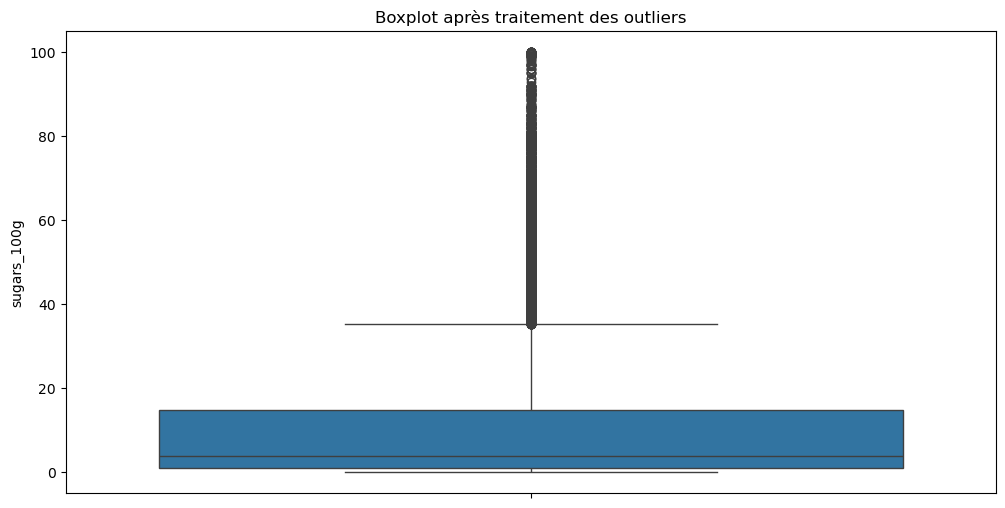

In [996]:
# Visualisation après le traitement des outliers

# Définir les bornes strictes
borne_inférieure = 0
borne_supérieure = 104

# Filtrer les données en fonction des bornes
mask = (data_filtrée_pertinente['sugars_100g'] >= borne_inférieure) & \
       (data_filtrée_pertinente['sugars_100g'] <= borne_supérieure)

data_filtrée_pertinente = data_filtrée_pertinente[mask | data_filtrée_pertinente['sugars_100g'].isna()]

# Visualisation avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['sugars_100g'])
plt.title('Boxplot après traitement des outliers')
plt.show()

In [997]:
data_filtrée_pertinente

code                product_name        pnns_groups_2  \
0              36252              Lion Peanut x2              unknown   
1           10187319              Mini Confettis                  NaN   
2           10207260  Praliné Amande Et Noisette                  NaN   
3           40608754       Pepsi, Nouveau goût !  Sweetened beverages   
4           69161025   Tarte Poireaux Et Lardons                  NaN   
...              ...                         ...                  ...   
54891  7611613001419  Yaourt Nature Sans Lactose                  NaN   
54892  7611613002218  Fromage Blanc Sans Lactose                  NaN   
54893  7611654099246               Graved Salmon     Fish and seafood   
54894  7611654273042       Sablés À La Confiture                  NaN   
54895  7611654555940               Noix de cajou                 Nuts   

      nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                      e       1883.0      20.0                12.5   
1                      d       1753.0       NaN                 0.8   
2                      d       2406.0       NaN                 2.9   
3                      e        177.0       0.0                 0.0   
4                      d       1079.0       NaN                11.0   
...                  ...          ...       ...                 ...   
54891                  b        289.0       NaN                 2.1   
54892                  a        238.0       NaN                 0.3   
54893                  d        690.0       9.0                 2.5   
54894                  e       1862.0       NaN                 7.0   
54895                  d       2520.0      46.0                 9.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
0                    70.0     3.800000         2.5            2.5    0.09652  
1                     NaN    87.699997         0.9            0.6    0.01000  
2                     NaN    50.299999         3.9            9.5    0.00300  
3                    10.4    10.400000         0.0            0.0    0.02540  
4                     NaN     1.000000         1.4            7.5    0.80000  
...                   ...          ...         ...            ...        ...  
54891                 NaN     4.800000         0.0            4.5    0.11000  
54892                 NaN     4.100000         0.0            8.9    0.10000  
54893                 1.0     1.000000         0.0           20.0    2.79400  
54894                 NaN    36.000000         0.0            6.0    1.00000  
54895                26.0     6.000000         2.5           21.0    0.50000  

[54861 rows x 12 columns]

## 3.6. Traitement de la colonne 'fiber_100g' <a id="Traitement-de-la-colonne-'fiber_100g'-"></a>

* ETAPE 1 : Calcul des bornes et identification des Outliers pour détecter et traiter les outliers au niveau global pour fiber_100g.

Nous allons également fixer une borne inférieure à 0 et une borne supérieure à 100.

Borne inférieure : 0, Borne supérieure : 100
Valeurs aberrantes détectées :
Empty DataFrame
Columns: [product_name, fiber_100g]
Index: []
Pourcentage des outliers : 0.0%
Moyenne avant traitement : 2.527726650238037
Médiane avant traitement : 1.2999999523162842


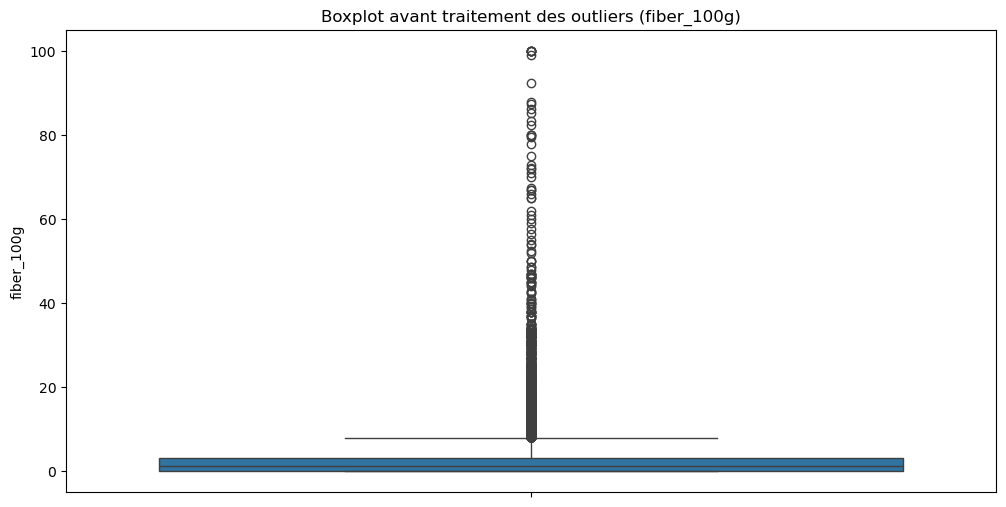

In [1002]:
# Définition des bornes fixes pour 'fiber_100g'
borne_inférieure = 0  # Minimum fixé
borne_supérieure = 100  # Maximum fixé

# Affichage des bornes
print(f"Borne inférieure : {borne_inférieure}, Borne supérieure : {borne_supérieure}")

# Identification des outliers
outliers_fiber_data = data_filtrée_pertinente[
    (data_filtrée_pertinente['fiber_100g'] < borne_inférieure) |
    (data_filtrée_pertinente['fiber_100g'] > borne_supérieure)
]

# Affichage des valeurs aberrantes détectées
print(f"Valeurs aberrantes détectées :\n{outliers_fiber_data[['product_name', 'fiber_100g']]}")

# Vérification de la proportion des outliers (on calcule le pourcentage des outliers par rapport au nombre total d'entrées)
outliers_fiber_percentage = (outliers_fiber_data.shape[0] / data_filtrée_pertinente.shape[0]) * 100
# Affichage du pourcentage
print(f"Pourcentage des outliers : {outliers_fiber_percentage}%")

# Impact des outliers sur les statistiques descriptives
mean_before = data_filtrée_pertinente['fiber_100g'].mean()
median_before = data_filtrée_pertinente['fiber_100g'].median()

print(f"Moyenne avant traitement : {mean_before}")
print(f"Médiane avant traitement : {median_before}")

# Visualisation avant le traitement des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['fiber_100g'])
plt.title('Boxplot avant traitement des outliers (fiber_100g)')
plt.show()

Les résultats que nous avons obtenus pour la colonne fiber_100g montrent qu'il n'y a pas de valeurs évidentes d'outliers (valeurs supérieures à 100) dans nos données initiales, ce qui explique l'absence de lignes affichées dans les tableaux des produits associés aux outliers et un pourcentage de 0%.

Aucune valeur supérieure à 100g de fibres n'a été trouvée (Empty DataFrame).
Cela confirme que nos données ne contiennent pas de valeurs extrêmes dans cette plage, au niveau global.

* ETAPE 2 : Détection et Traitement des Outliers par catégorie PNNS (calcul des bornes IQR par catégorie spécifique). Pour cela, nous allons utiliser une méthode plus flexible, comme la méthode IQR, pour définir des bornes spécifiques par catégorie.

In [1006]:
# Détection des outliers par catégorie PNNS
outliers_dict = {}

# Parcours des catégories dans 'pnns_groups_2'
for categorie in data_filtrée_pertinente['pnns_groups_2'].unique():
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Vérification du nombre d'éléments dans la catégorie
    if len(subset) > 1:  # S'assurer qu'il y a plus d'une donnée pour calculer l'IQR
        # Calcul des quartiles et de l'IQR pour la catégorie
        Q1 = subset['fiber_100g'].quantile(0.25)
        Q3 = subset['fiber_100g'].quantile(0.75)
        IQR = Q3 - Q1

        # Définition des bornes pour chaque catégorie avec ajustement ( bornes strictes basées sur la logique métier : 
        #Borne inférieure : Forcée à 0 car les fibres ne peuvent pas être négatives. 
        #Borne supérieure : Si l'IQR produit une borne trop large (par exemple, >100), on impose une limite métier raisonnable.
        borne_inf = max(0, Q1 - 1.5 * IQR)  # Fixer la borne inférieure à 0 si elle est négative
        borne_sup = min(100, Q3 + 1.5 * IQR)  # Limite réaliste à 100

        # Enregistrement des bornes dans un dictionnaire pour suivi
        outliers_dict[categorie] = {'borne_inf': borne_inf, 'borne_sup': borne_sup}
        
        # Identification des outliers pour chaque catégorie
        outliers = subset[
            (subset['fiber_100g'] < borne_inf) | 
            (subset['fiber_100g'] > borne_sup)
        ]
        
        # Affichage des informations de détection des outliers
        print(f"Catégorie PNNS : {categorie}")
        print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
        print(f"Nombre d'outliers dans cette catégorie : {len(outliers)}\n")
    else:
        print(f"Catégorie {categorie} a trop peu de données pour calculer l'IQR. Aucune opération effectuée.\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 8.74999988079071
Nombre d'outliers dans cette catégorie : 272

Catégorie nan a trop peu de données pour calculer l'IQR. Aucune opération effectuée.

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 0.2500000037252903
Nombre d'outliers dans cette catégorie : 159

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 0, Borne supérieure : 6.949999809265137
Nombre d'outliers dans cette catégorie : 85

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 4.999999761581421
Nombre d'outliers dans cette catégorie : 158

Catégorie PNNS : Soups
Borne inférieure : 0, Borne supérieure : 2.425000101327896
Nombre d'outliers dans cette catégorie : 5

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 1.25
Nombre d'outliers dans cette catégorie : 60

Catégorie PNNS : Cheese
Borne inférieure : 0, Borne supérieure : 0.0
Nombre d'outliers dans cette catégorie :

In [1008]:
# Remplacement des outliers par la médiane
for categorie, bornes in outliers_dict.items():
    borne_inf = bornes['borne_inf']
    borne_sup = bornes['borne_sup']
    
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Remplacement des outliers par la médiane de la catégorie
    median_value = subset['fiber_100g'].median()
    
    # Remplacer les valeurs aberrantes par la médiane dans le DataFrame original
    data_filtrée_pertinente.loc[
        (data_filtrée_pertinente['pnns_groups_2'] == categorie) &
        ((data_filtrée_pertinente['fiber_100g'] < borne_inf) | 
         (data_filtrée_pertinente['fiber_100g'] > borne_sup)),
        'fiber_100g'
    ] = median_value
    
    # Affichage des informations de remplacement
    print(f"Catégorie PNNS : {categorie}")
    print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
    print(f"Remplacement effectué par la médiane : {median_value}\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 8.74999988079071
Remplacement effectué par la médiane : 2.0

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 0.2500000037252903
Remplacement effectué par la médiane : 0.0

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 0, Borne supérieure : 6.949999809265137
Remplacement effectué par la médiane : 2.5999999046325684

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 4.999999761581421
Remplacement effectué par la médiane : 1.600000023841858

Catégorie PNNS : Soups
Borne inférieure : 0, Borne supérieure : 2.425000101327896
Remplacement effectué par la médiane : 1.100000023841858

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 1.25
Remplacement effectué par la médiane : 0.0

Catégorie PNNS : Cheese
Borne inférieure : 0, Borne supérieure : 0.0
Remplacement effectué par la médiane : 0.0

Catégorie PNNS : Sweets
Borne inférieure : 0, B

* Visualisation après traitement des outliers dans la colonne fiber_100g.

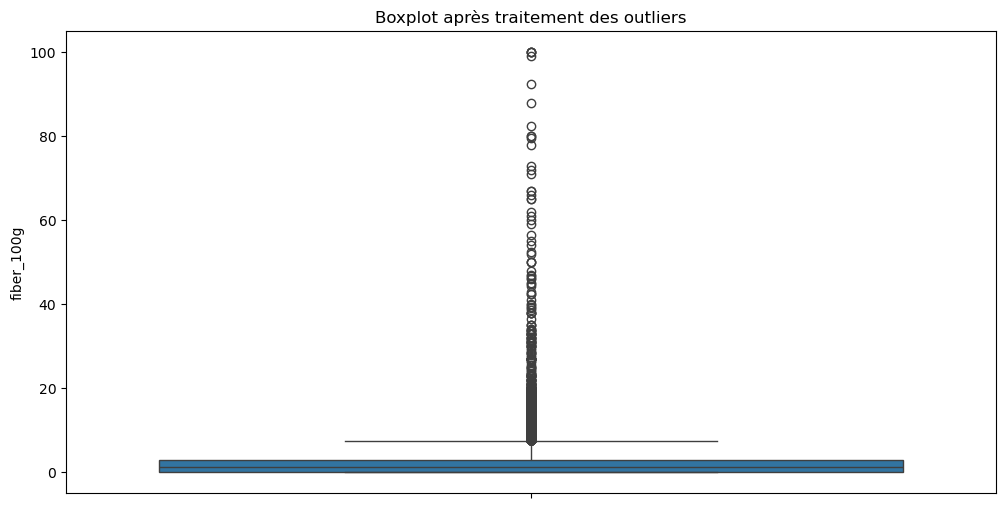

In [1011]:
# Visualisation après le traitement des outliers

# Définir les bornes strictes
borne_inférieure = 0
borne_supérieure = 100

# Filtrer les données en fonction des bornes
mask = (data_filtrée_pertinente['fiber_100g'] >= borne_inférieure) & \
       (data_filtrée_pertinente['fiber_100g'] <= borne_supérieure)

data_filtrée_pertinente = data_filtrée_pertinente[mask | data_filtrée_pertinente['fiber_100g'].isna()]

# Visualisation avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['fiber_100g'])
plt.title('Boxplot après traitement des outliers')
plt.show()

In [1013]:
data_filtrée_pertinente

code                product_name        pnns_groups_2  \
0              36252              Lion Peanut x2              unknown   
1           10187319              Mini Confettis                  NaN   
2           10207260  Praliné Amande Et Noisette                  NaN   
3           40608754       Pepsi, Nouveau goût !  Sweetened beverages   
4           69161025   Tarte Poireaux Et Lardons                  NaN   
...              ...                         ...                  ...   
54891  7611613001419  Yaourt Nature Sans Lactose                  NaN   
54892  7611613002218  Fromage Blanc Sans Lactose                  NaN   
54893  7611654099246               Graved Salmon     Fish and seafood   
54894  7611654273042       Sablés À La Confiture                  NaN   
54895  7611654555940               Noix de cajou                 Nuts   

      nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                      e       1883.0      20.0                12.5   
1                      d       1753.0       NaN                 0.8   
2                      d       2406.0       NaN                 2.9   
3                      e        177.0       0.0                 0.0   
4                      d       1079.0       NaN                11.0   
...                  ...          ...       ...                 ...   
54891                  b        289.0       NaN                 2.1   
54892                  a        238.0       NaN                 0.3   
54893                  d        690.0       9.0                 2.5   
54894                  e       1862.0       NaN                 7.0   
54895                  d       2520.0      46.0                 9.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
0                    70.0     3.800000         2.5            2.5    0.09652  
1                     NaN    87.699997         0.9            0.6    0.01000  
2                     NaN    50.299999         3.9            9.5    0.00300  
3                    10.4    10.400000         0.0            0.0    0.02540  
4                     NaN     1.000000         1.4            7.5    0.80000  
...                   ...          ...         ...            ...        ...  
54891                 NaN     4.800000         0.0            4.5    0.11000  
54892                 NaN     4.100000         0.0            8.9    0.10000  
54893                 1.0     1.000000         0.0           20.0    2.79400  
54894                 NaN    36.000000         0.0            6.0    1.00000  
54895                26.0     6.000000         2.5           21.0    0.50000  

[54861 rows x 12 columns]

## 3.7. Traitement de la colonne 'proteins_100g' <a id="Traitement-de-la-colonne-'proteins_100g'-"></a>

* ETAPE 1 : Calcul des bornes et identification des Outliers pour détecter et traiter les outliers au niveau global pour proteins_100g.

Nous allons également fixer une borne inférieure à 0 et une borne supérieure à 100.

Borne inférieure : 0, Borne supérieure : 100
Valeurs aberrantes détectées :
Empty DataFrame
Columns: [product_name, proteins_100g]
Index: []
Pourcentage des outliers : 0.0%
Moyenne avant traitement : 7.812276363372803
Médiane avant traitement : 6.0


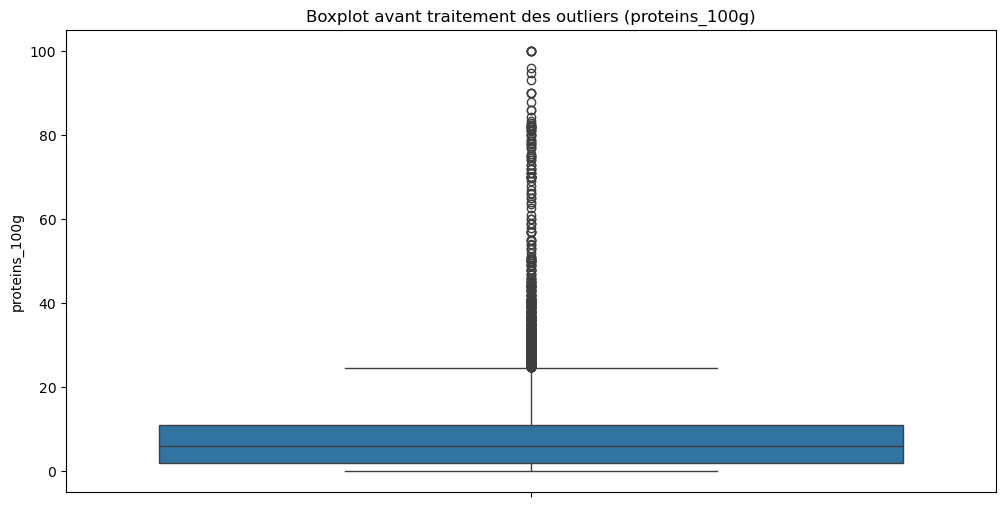

In [1017]:
# Définition des bornes fixes pour 'proteins_100g'
borne_inférieure = 0  # Minimum fixé
borne_supérieure = 100  # Maximum fixé

# Affichage des bornes
print(f"Borne inférieure : {borne_inférieure}, Borne supérieure : {borne_supérieure}")

# Identification des outliers
outliers_proteins_data = data_filtrée_pertinente[
    (data_filtrée_pertinente['proteins_100g'] < borne_inférieure) |
    (data_filtrée_pertinente['proteins_100g'] > borne_supérieure)
]

# Affichage des valeurs aberrantes détectées
print(f"Valeurs aberrantes détectées :\n{outliers_proteins_data[['product_name', 'proteins_100g']]}")

# Vérification de la proportion des outliers (on calcule le pourcentage des outliers par rapport au nombre total d'entrées)
outliers_proteins_percentage = (outliers_proteins_data.shape[0] / data_filtrée_pertinente.shape[0]) * 100
# Affichage du pourcentage
print(f"Pourcentage des outliers : {outliers_proteins_percentage}%")

# Impact des outliers sur les statistiques descriptives
mean_before = data_filtrée_pertinente['proteins_100g'].mean()
median_before = data_filtrée_pertinente['proteins_100g'].median()

print(f"Moyenne avant traitement : {mean_before}")
print(f"Médiane avant traitement : {median_before}")

# Visualisation avant le traitement des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['proteins_100g'])
plt.title('Boxplot avant traitement des outliers (proteins_100g)')
plt.show()

Les résultats que nous avons obtenus pour la colonne proteins_100g montrent qu'il n'y a pas de valeurs évidentes d'outliers (valeurs supérieures à 100) dans nos données initiales, ce qui explique l'absence de lignes affichées dans les tableaux des produits associés aux outliers et un pourcentage de 0%.

Aucune valeur supérieure à 100g de protéines n'a été trouvée (Empty DataFrame).
Cela confirme que nos données ne contiennent pas de valeurs extrêmes dans cette plage, au niveau global.

* ETAPE 2 : Détection et Traitement des Outliers par catégorie PNNS (calcul des bornes IQR par catégorie spécifique). Pour cela, nous allons utiliser une méthode plus flexible, comme la méthode IQR, pour définir des bornes spécifiques par catégorie.

In [1021]:
# Détection des outliers par catégorie PNNS
outliers_dict = {}

# Parcours des catégories dans 'pnns_groups_2'
for categorie in data_filtrée_pertinente['pnns_groups_2'].unique():
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Vérification du nombre d'éléments dans la catégorie
    if len(subset) > 1:  # S'assurer qu'il y a plus d'une donnée pour calculer l'IQR
        # Calcul des quartiles et de l'IQR pour la catégorie
        Q1 = subset['proteins_100g'].quantile(0.25)
        Q3 = subset['proteins_100g'].quantile(0.75)
        IQR = Q3 - Q1

        # Définition des bornes pour chaque catégorie avec ajustement ( bornes strictes basées sur la logique métier : 
        #Borne inférieure : Forcée à 0 car les protéines ne peuvent pas être négatives. 
        #Borne supérieure : Si l'IQR produit une borne trop large (par exemple, >100), on impose une limite métier raisonnable.
        borne_inf = max(0, Q1 - 1.5 * IQR)  # Fixer la borne inférieure à 0 si elle est négative
        borne_sup = min(100, Q3 + 1.5 * IQR)  # Limite réaliste à 100

        # Enregistrement des bornes dans un dictionnaire pour suivi
        outliers_dict[categorie] = {'borne_inf': borne_inf, 'borne_sup': borne_sup}
        
        # Identification des outliers pour chaque catégorie
        outliers = subset[
            (subset['proteins_100g'] < borne_inf) | 
            (subset['proteins_100g'] > borne_sup)
        ]
        
        # Affichage des informations de détection des outliers
        print(f"Catégorie PNNS : {categorie}")
        print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
        print(f"Nombre d'outliers dans cette catégorie : {len(outliers)}\n")
    else:
        print(f"Catégorie {categorie} a trop peu de données pour calculer l'IQR. Aucune opération effectuée.\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 19.61875081062317
Nombre d'outliers dans cette catégorie : 432

Catégorie nan a trop peu de données pour calculer l'IQR. Aucune opération effectuée.

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 1.0000000149011612
Nombre d'outliers dans cette catégorie : 137

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 2.499999523162842, Borne supérieure : 9.700000286102295
Nombre d'outliers dans cette catégorie : 105

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 15.250000476837158
Nombre d'outliers dans cette catégorie : 192

Catégorie PNNS : Soups
Borne inférieure : 0.2499999701976776, Borne supérieure : 1.4500000178813934
Nombre d'outliers dans cette catégorie : 34

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 1.5000000596046448
Nombre d'outliers dans cette catégorie : 148

Catégorie PNNS : Cheese
Borne inférieure : 0, Borne supé

In [1023]:
# Remplacement des outliers par la médiane
for categorie, bornes in outliers_dict.items():
    borne_inf = bornes['borne_inf']
    borne_sup = bornes['borne_sup']
    
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Remplacement des outliers par la médiane de la catégorie
    median_value = subset['proteins_100g'].median()
    
    # Remplacer les valeurs aberrantes par la médiane dans le DataFrame original
    data_filtrée_pertinente.loc[
        (data_filtrée_pertinente['pnns_groups_2'] == categorie) &
        ((data_filtrée_pertinente['proteins_100g'] < borne_inf) | 
         (data_filtrée_pertinente['proteins_100g'] > borne_sup)),
        'proteins_100g'
    ] = median_value
    
    # Affichage des informations de remplacement
    print(f"Catégorie PNNS : {categorie}")
    print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
    print(f"Remplacement effectué par la médiane : {median_value}\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 19.61875081062317
Remplacement effectué par la médiane : 5.800000190734863

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 1.0000000149011612
Remplacement effectué par la médiane : 0.0

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 2.499999523162842, Borne supérieure : 9.700000286102295
Remplacement effectué par la médiane : 6.099999904632568

Catégorie PNNS : One-dish meals
Borne inférieure : 0, Borne supérieure : 15.250000476837158
Remplacement effectué par la médiane : 6.5

Catégorie PNNS : Soups
Borne inférieure : 0.2499999701976776, Borne supérieure : 1.4500000178813934
Remplacement effectué par la médiane : 0.800000011920929

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 1.5000000596046448
Remplacement effectué par la médiane : 0.25

Catégorie PNNS : Cheese
Borne inférieure : 0, Borne supérieure : 39.749999046325684
Remplacement effectué par 

* Visualisation après traitement des outliers dans la colonne proteins_100g.

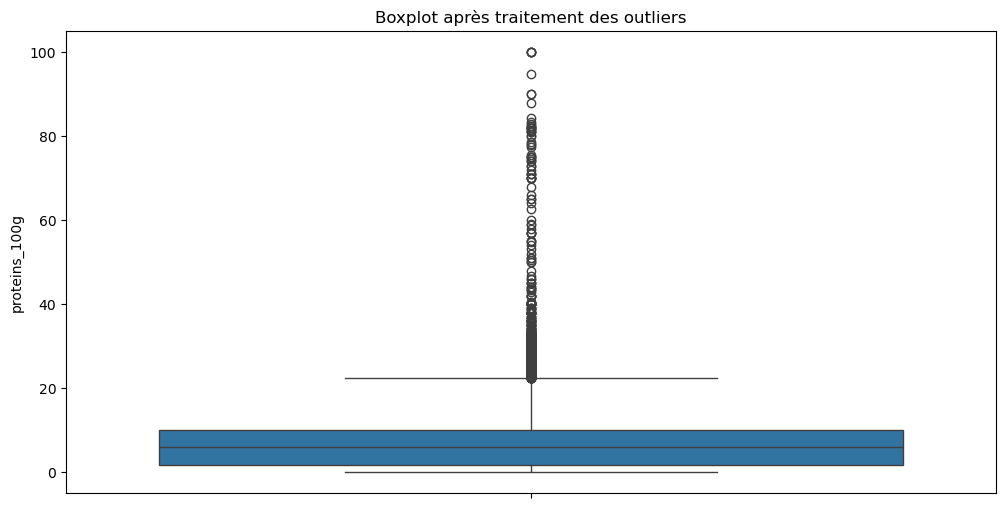

In [1026]:
# Visualisation après le traitement des outliers

# Définir les bornes strictes
borne_inférieure = 0
borne_supérieure = 100

# Filtrer les données en fonction des bornes
mask = (data_filtrée_pertinente['proteins_100g'] >= borne_inférieure) & \
       (data_filtrée_pertinente['proteins_100g'] <= borne_supérieure)

data_filtrée_pertinente = data_filtrée_pertinente[mask | data_filtrée_pertinente['proteins_100g'].isna()]

# Visualisation avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['proteins_100g'])
plt.title('Boxplot après traitement des outliers')
plt.show()

In [1028]:
data_filtrée_pertinente

code                product_name        pnns_groups_2  \
0              36252              Lion Peanut x2              unknown   
1           10187319              Mini Confettis                  NaN   
2           10207260  Praliné Amande Et Noisette                  NaN   
3           40608754       Pepsi, Nouveau goût !  Sweetened beverages   
4           69161025   Tarte Poireaux Et Lardons                  NaN   
...              ...                         ...                  ...   
54891  7611613001419  Yaourt Nature Sans Lactose                  NaN   
54892  7611613002218  Fromage Blanc Sans Lactose                  NaN   
54893  7611654099246               Graved Salmon     Fish and seafood   
54894  7611654273042       Sablés À La Confiture                  NaN   
54895  7611654555940               Noix de cajou                 Nuts   

      nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                      e       1883.0      20.0                12.5   
1                      d       1753.0       NaN                 0.8   
2                      d       2406.0       NaN                 2.9   
3                      e        177.0       0.0                 0.0   
4                      d       1079.0       NaN                11.0   
...                  ...          ...       ...                 ...   
54891                  b        289.0       NaN                 2.1   
54892                  a        238.0       NaN                 0.3   
54893                  d        690.0       9.0                 2.5   
54894                  e       1862.0       NaN                 7.0   
54895                  d       2520.0      46.0                 9.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
0                    70.0     3.800000         2.5            2.5    0.09652  
1                     NaN    87.699997         0.9            0.6    0.01000  
2                     NaN    50.299999         3.9            9.5    0.00300  
3                    10.4    10.400000         0.0            0.0    0.02540  
4                     NaN     1.000000         1.4            7.5    0.80000  
...                   ...          ...         ...            ...        ...  
54891                 NaN     4.800000         0.0            4.5    0.11000  
54892                 NaN     4.100000         0.0            8.9    0.10000  
54893                 1.0     1.000000         0.0           20.0    2.79400  
54894                 NaN    36.000000         0.0            6.0    1.00000  
54895                26.0     6.000000         2.5           21.0    0.50000  

[54861 rows x 12 columns]

## 3.8. Traitement de la colonne 'salt_100g' <a id="Traitement-de-la-colonne-'salt_100g'-"></a>

* ETAPE 1 : Calcul des bornes et identification des Outliers pour détecter et traiter les outliers au niveau global pour salt_100g.

Nous allons également fixer une borne inférieure à 0 et une borne supérieure à 100.

Borne inférieure : 0, Borne supérieure : 100
Valeurs aberrantes détectées :
                      product_name  salt_100g
34145                    Keeny Bio      211.0
34708  Sel de Guérande Label Rouge      125.0
Pourcentage des outliers : 0.003645577003700261%
Moyenne avant traitement : 1.0600756406784058
Médiane avant traitement : 0.5789999961853027


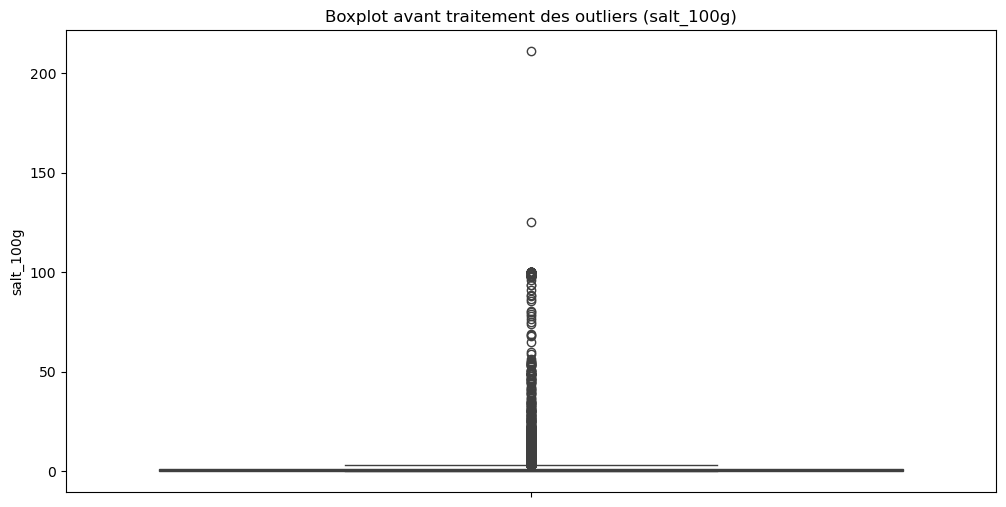

In [1032]:
# Définition des bornes fixes pour 'salt_100g'
borne_inférieure = 0  # Minimum fixé
borne_supérieure = 100  # Maximum fixé

# Affichage des bornes
print(f"Borne inférieure : {borne_inférieure}, Borne supérieure : {borne_supérieure}")

# Identification des outliers
outliers_salt_data = data_filtrée_pertinente[
    (data_filtrée_pertinente['salt_100g'] < borne_inférieure) |
    (data_filtrée_pertinente['salt_100g'] > borne_supérieure)
]

# Affichage des valeurs aberrantes détectées
print(f"Valeurs aberrantes détectées :\n{outliers_salt_data[['product_name', 'salt_100g']]}")

# Vérification de la proportion des outliers (on calcule le pourcentage des outliers par rapport au nombre total d'entrées)
outliers_salt_percentage = (outliers_salt_data.shape[0] / data_filtrée_pertinente.shape[0]) * 100
# Affichage du pourcentage
print(f"Pourcentage des outliers : {outliers_salt_percentage}%")

# Impact des outliers sur les statistiques descriptives
mean_before = data_filtrée_pertinente['salt_100g'].mean()
median_before = data_filtrée_pertinente['salt_100g'].median()

print(f"Moyenne avant traitement : {mean_before}")
print(f"Médiane avant traitement : {median_before}")

# Visualisation avant le traitement des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['salt_100g'])
plt.title('Boxplot avant traitement des outliers (salt_100g)')
plt.show()

#### a) première ligne à corriger

In [1035]:
print(data_filtrée_pertinente.loc[34145])

code                       3423720002432
product_name                   Keeny Bio
pnns_groups_2         Biscuits and cakes
nutrition_grade_fr                     e
energy_100g                       1720.0
fat_100g                            23.0
saturated-fat_100g                  3.33
carbohydrates_100g             47.799999
sugars_100g                    26.700001
fiber_100g                         0.741
proteins_100g                        6.3
salt_100g                          211.0
Name: 34145, dtype: object


#### b) Deuxième ligne à corriger

In [1038]:
print(data_filtrée_pertinente.loc[34708])

code                                3445850070259
product_name          Sel de Guérande Label Rouge
pnns_groups_2                             unknown
nutrition_grade_fr                              c
energy_100g                                   0.0
fat_100g                                      0.0
saturated-fat_100g                            0.0
carbohydrates_100g                            0.0
sugars_100g                                   0.0
fiber_100g                                    0.0
proteins_100g                                 0.0
salt_100g                                   125.0
Name: 34708, dtype: object


Après vérification sur le site, ces valeurs semblent être des erreurs et doivent être corrigées. Nous en profitons pour mettre à jour les autres valeurs.

https://fr.openfoodfacts.org/produit/3423720002432/keeny-bio-moelleux-au-lait-ecreme-bio-soleil

https://fr.openfoodfacts.org/produit/3445850070259/sel-de-guerande-label-rouge-le-guerandais

* Correction des valeurs pour les lignes 34145 et 34708

In [1042]:
# Correction des valeurs pour les produits spécifiques
# Ligne 34145
data_filtrée_pertinente.loc[34145, 'energy_100g'] = np.float32(1715.0)
data_filtrée_pertinente.loc[34145, 'fat_100g'] = np.float32(24.0)
data_filtrée_pertinente.loc[34145, 'saturated-fat_100g'] = np.float32(2.2)
data_filtrée_pertinente.loc[34145, 'carbohydrates_100g'] = np.float32(42.0)
data_filtrée_pertinente.loc[34145, 'sugars_100g'] = np.float32(25.0)
data_filtrée_pertinente.loc[34145, 'fiber_100g'] = np.float32(1.2)
data_filtrée_pertinente.loc[34145, 'proteins_100g'] = np.float32(6.6)
data_filtrée_pertinente.loc[34145, 'salt_100g'] = np.float32(0.43)


# Ligne 34708
data_filtrée_pertinente.loc[34708, 'salt_100g'] = np.float32(98.4)

# Vérification après correction
print(data_filtrée_pertinente.loc[[34145, 34708]])

                code                 product_name       pnns_groups_2  \
34145  3423720002432                    Keeny Bio  Biscuits and cakes   
34708  3445850070259  Sel de Guérande Label Rouge             unknown   

      nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
34145                  e       1715.0      24.0                 2.2   
34708                  c          0.0       0.0                 0.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
34145                42.0         25.0         1.2            6.6   0.430000  
34708                 0.0          0.0         0.0            0.0  98.400002  


* ETAPE 2 : Détection et Traitement des Outliers par catégorie PNNS (calcul des bornes IQR par catégorie spécifique). Pour cela, nous allons utiliser une méthode plus flexible, comme la méthode IQR, pour définir des bornes spécifiques par catégorie.

In [1045]:
# Détection des outliers par catégorie PNNS
outliers_dict = {}

# Parcours des catégories dans 'pnns_groups_2'
for categorie in data_filtrée_pertinente['pnns_groups_2'].unique():
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Vérification du nombre d'éléments dans la catégorie
    if len(subset) > 1:  # S'assurer qu'il y a plus d'une donnée pour calculer l'IQR
        # Calcul des quartiles et de l'IQR pour la catégorie
        Q1 = subset['salt_100g'].quantile(0.25)
        Q3 = subset['salt_100g'].quantile(0.75)
        IQR = Q3 - Q1

        # Définition des bornes pour chaque catégorie avec ajustement ( bornes strictes basées sur la logique métier : 
        #Borne inférieure : Forcée à 0 car sels ne peuvent pas être négatifs. 
        #Borne supérieure : Si l'IQR produit une borne trop large (par exemple, >100), on impose une limite métier raisonnable.
        borne_inf = max(0, Q1 - 1.5 * IQR)  # Fixer la borne inférieure à 0 si elle est négative
        borne_sup = min(100, Q3 + 1.5 * IQR)  # Limite réaliste à 100

        # Enregistrement des bornes dans un dictionnaire pour suivi
        outliers_dict[categorie] = {'borne_inf': borne_inf, 'borne_sup': borne_sup}
        
        # Identification des outliers pour chaque catégorie
        outliers = subset[
            (subset['salt_100g'] < borne_inf) | 
            (subset['salt_100g'] > borne_sup)
        ]
        
        # Affichage des informations de détection des outliers
        print(f"Catégorie PNNS : {categorie}")
        print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
        print(f"Nombre d'outliers dans cette catégorie : {len(outliers)}\n")
    else:
        print(f"Catégorie {categorie} a trop peu de données pour calculer l'IQR. Aucune opération effectuée.\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 3.095499813556671
Nombre d'outliers dans cette catégorie : 460

Catégorie nan a trop peu de données pour calculer l'IQR. Aucune opération effectuée.

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 0.07499999832361937
Nombre d'outliers dans cette catégorie : 247

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 0, Borne supérieure : 1.476999968290329
Nombre d'outliers dans cette catégorie : 48

Catégorie PNNS : One-dish meals
Borne inférieure : 0.08437502384185791, Borne supérieure : 1.709375023841858
Nombre d'outliers dans cette catégorie : 195

Catégorie PNNS : Soups
Borne inférieure : 0.34499993920326233, Borne supérieure : 0.9450000822544098
Nombre d'outliers dans cette catégorie : 18

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 0.22500000894069672
Nombre d'outliers dans cette catégorie : 101

Catégorie PNNS : Cheese
Borne inférieure : 0, Borne s

In [1047]:
# Remplacement des outliers par la médiane
for categorie, bornes in outliers_dict.items():
    borne_inf = bornes['borne_inf']
    borne_sup = bornes['borne_sup']
    
    # Filtrage des données par catégorie
    subset = data_filtrée_pertinente[data_filtrée_pertinente['pnns_groups_2'] == categorie]
    
    # Remplacement des outliers par la médiane de la catégorie
    median_value = subset['salt_100g'].median()
    
    # Remplacer les valeurs aberrantes par la médiane dans le DataFrame original
    data_filtrée_pertinente.loc[
        (data_filtrée_pertinente['pnns_groups_2'] == categorie) &
        ((data_filtrée_pertinente['salt_100g'] < borne_inf) | 
         (data_filtrée_pertinente['salt_100g'] > borne_sup)),
        'salt_100g'
    ] = median_value
    
    # Affichage des informations de remplacement
    print(f"Catégorie PNNS : {categorie}")
    print(f"Borne inférieure : {borne_inf}, Borne supérieure : {borne_sup}")
    print(f"Remplacement effectué par la médiane : {median_value}\n")

Catégorie PNNS : unknown
Borne inférieure : 0, Borne supérieure : 3.095499813556671
Remplacement effectué par la médiane : 0.6299999952316284

Catégorie PNNS : Sweetened beverages
Borne inférieure : 0, Borne supérieure : 0.07499999832361937
Remplacement effectué par la médiane : 0.009999999776482582

Catégorie PNNS : Biscuits and cakes
Borne inférieure : 0, Borne supérieure : 1.476999968290329
Remplacement effectué par la médiane : 0.5799999833106995

Catégorie PNNS : One-dish meals
Borne inférieure : 0.08437502384185791, Borne supérieure : 1.709375023841858
Remplacement effectué par la médiane : 0.8500000238418579

Catégorie PNNS : Soups
Borne inférieure : 0.34499993920326233, Borne supérieure : 0.9450000822544098
Remplacement effectué par la médiane : 0.6499999761581421

Catégorie PNNS : Non-sugared beverages
Borne inférieure : 0, Borne supérieure : 0.22500000894069672
Remplacement effectué par la médiane : 0.019999999552965164

Catégorie PNNS : Cheese
Borne inférieure : 0, Borne sup

* Visualisation après traitement des outliers dans la colonne 'salt_100g'.

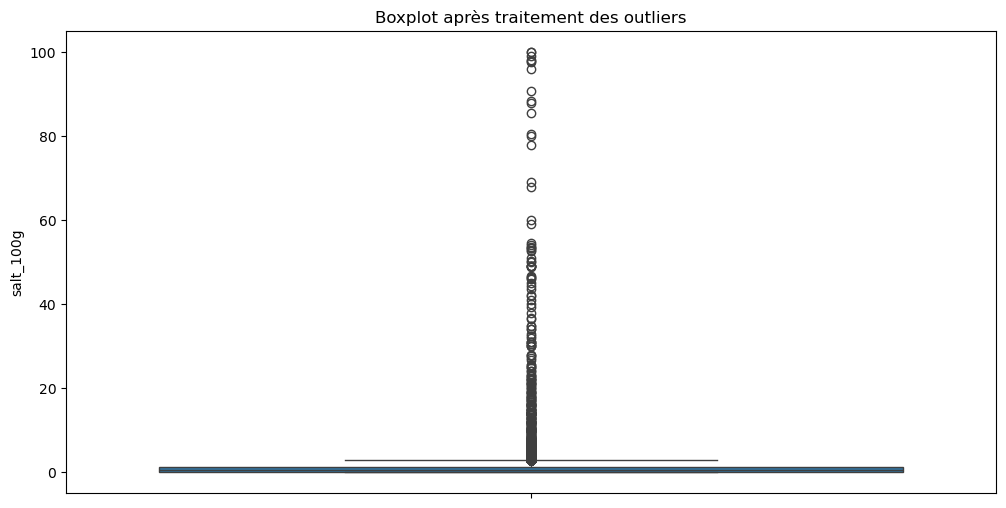

In [1050]:
# Visualisation après le traitement des outliers

# Définir les bornes strictes
borne_inférieure = 0
borne_supérieure = 100

# Filtrer les données en fonction des bornes
mask = (data_filtrée_pertinente['salt_100g'] >= borne_inférieure) & \
       (data_filtrée_pertinente['salt_100g'] <= borne_supérieure)

data_filtrée_pertinente = data_filtrée_pertinente[mask | data_filtrée_pertinente['salt_100g'].isna()]

# Visualisation avec un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['salt_100g'])
plt.title('Boxplot après traitement des outliers')
plt.show()

In [1052]:
data_filtrée_pertinente

code                product_name        pnns_groups_2  \
0              36252              Lion Peanut x2              unknown   
1           10187319              Mini Confettis                  NaN   
2           10207260  Praliné Amande Et Noisette                  NaN   
3           40608754       Pepsi, Nouveau goût !  Sweetened beverages   
4           69161025   Tarte Poireaux Et Lardons                  NaN   
...              ...                         ...                  ...   
54891  7611613001419  Yaourt Nature Sans Lactose                  NaN   
54892  7611613002218  Fromage Blanc Sans Lactose                  NaN   
54893  7611654099246               Graved Salmon     Fish and seafood   
54894  7611654273042       Sablés À La Confiture                  NaN   
54895  7611654555940               Noix de cajou                 Nuts   

      nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                      e       1883.0      20.0                12.5   
1                      d       1753.0       NaN                 0.8   
2                      d       2406.0       NaN                 2.9   
3                      e        177.0       0.0                 0.0   
4                      d       1079.0       NaN                11.0   
...                  ...          ...       ...                 ...   
54891                  b        289.0       NaN                 2.1   
54892                  a        238.0       NaN                 0.3   
54893                  d        690.0       9.0                 2.5   
54894                  e       1862.0       NaN                 7.0   
54895                  d       2520.0      46.0                 9.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
0                    70.0     3.800000         2.5            2.5    0.09652  
1                     NaN    87.699997         0.9            0.6    0.01000  
2                     NaN    50.299999         3.9            9.5    0.00300  
3                    10.4    10.400000         0.0            0.0    0.02540  
4                     NaN     1.000000         1.4            7.5    0.80000  
...                   ...          ...         ...            ...        ...  
54891                 NaN     4.800000         0.0            4.5    0.11000  
54892                 NaN     4.100000         0.0            8.9    0.10000  
54893                 1.0     1.000000         0.0           20.0    2.79400  
54894                 NaN    36.000000         0.0            6.0    1.00000  
54895                26.0     6.000000         2.5           21.0    0.50000  

[54861 rows x 12 columns]

# 4. Automatisation des étapes d'identification et de traitement des valeurs aberrantes <a id="Automatisation-des-étapes-d'identification-et-de-traitement-des-valeurs-aberrantes"></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

# Réinitialisation de l'index pour un DataFrame propre
data_filtrée_pertinente = data_filtrée_pertinente.reset_index(drop=True)

# Fonction pour appliquer le traitement des outliers par catégorie PNNS
def traitement_outliers(data, col, borne_sup_logique, titre_boxplot):
    outliers_dict = {}
    
    for categorie in data['pnns_groups_2'].dropna().unique():  # Exclure les valeurs NaN
        subset = data[data['pnns_groups_2'] == categorie]
        
        if len(subset) > 1:  # Calcul seulement si > 1 élément
            Q1 = subset[col].quantile(0.25)
            Q3 = subset[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # Bornes ajustées
            borne_inf = max(0, Q1 - 1.5 * IQR)
            borne_sup = min(borne_sup_logique, Q3 + 1.5 * IQR)
            
            # Enregistrement dans un dictionnaire pour suivi
            outliers_dict[categorie] = {'borne_inf': borne_inf, 'borne_sup': borne_sup}
            
            # Remplacement des outliers par la médiane
            median_value = subset[col].median()
            data.loc[
                (data['pnns_groups_2'] == categorie) &
                ((data[col] < borne_inf) | (data[col] > borne_sup)),
                col
            ] = median_value
    
    # Visualisation après traitement
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[col])
    plt.title(titre_boxplot)
    plt.show()
    
    return data

# Traitement de chaque colonne
data_filtrée_pertinente = traitement_outliers(data_filtrée_pertinente, 'energy_100g', 4187, 'Boxplot energy_100g après traitement')
data_filtrée_pertinente = traitement_outliers(data_filtrée_pertinente, 'saturated-fat_100g', 100, 'Boxplot saturated-fat_100g après traitement')
data_filtrée_pertinente = traitement_outliers(data_filtrée_pertinente, 'fat_100g', 100, 'Boxplot saturated-fat_100g après traitement')
data_filtrée_pertinente = traitement_outliers(data_filtrée_pertinente, 'carbohydrates_100g', 106, 'Boxplot saturated-fat_100g après traitement')
data_filtrée_pertinente = traitement_outliers(data_filtrée_pertinente, 'sugars_100g', 104, 'Boxplot saturated-fat_100g après traitement')
data_filtrée_pertinente = traitement_outliers(data_filtrée_pertinente, 'fiber_100g', 100, 'Boxplot saturated-fat_100g après traitement')
data_filtrée_pertinente = traitement_outliers(data_filtrée_pertinente, 'proteins_100g', 100, 'Boxplot saturated-fat_100g après traitement')
data_filtrée_pertinente = traitement_outliers(data_filtrée_pertinente, 'salt_100g', 100, 'Boxplot saturated-fat_100g après traitement')

# Fonction pour récupérer les informations depuis l'API OpenFoodFacts
def get_product_info_from_code_bar(code_bar):
    url = f"https://world.openfoodfacts.org/api/v0/product/{code_bar}.json"
    try:
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            product_data = response.json()
            if 'product' in product_data and 'product_name' in product_data['product'] and 'nutriments' in product_data['product']:
                product_name = product_data['product']['product_name']
                energy_100g = product_data['product']['nutriments'].get('energy_100g', None)
                return product_name, energy_100g
        return None, None
    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la récupération pour le code-barres {code_bar} : {e}")
        return None, None

def update_dataframe_with_energy(data, codes_barres):
    for code_bar in codes_barres:
        if pd.notna(code_bar):  # Vérifier que le code-barres n'est pas NaN
            product_name, energy_100g = get_product_info_from_code_bar(code_bar)
            if product_name and energy_100g is not None:
                data.loc[data['code'] == code_bar, 'product_name'] = product_name
                data.loc[data['code'] == code_bar, 'energy_100g'] = energy_100g
                print(f"Mise à jour réussie pour le code {code_bar}")
            else:
                print(f"Échec de la mise à jour pour le code {code_bar}")
    return data

# Liste des codes-barres et récupération des informations manquantes
codes_barres = ["43647390011", "20193447", "20233679", "20386290", "20711160", "20842437", "2309640004224", 
    "26029245", "3017239003860", "3024720026888", "3029330067061", "3033710069293", "3045320009361", 
    "3092718605216", "3217690033264", "3217690052616", "3222120028611", "3222472770749", "3230890027529", 
    "3250390001522", "3250392034757", "3250392449544", "3254560082656", "3257983143096", "3258561300597", 
    "3263827001002", "3263852410411", "3267110002653", "3270020000183", "3270160620807", "3270160689774", 
    "3270160820153", "3270160820481", "3286010034793", "3291960006127", "3303640001404", "3380380023774", 
    "3380380070822", "3419390404973", "3502490177158", "3520050404018", "3560070257393", "3560070909520", 
    "3560070927296", "3564700299135", "3564700414347", "3564700510773", "3596710099931", "3596710288755", 
    "3596710396115", "3596710396122", "3596710425532", "3661405001053", "3700640470139", "3760025041415", 
    "3760087361575", "3760151011139", "3760151013232", "3999994001155", "4001686304792", "4016249009786", 
    "4251347600149", "5050974503712", "5060088702529", "5410056010994", "5410093149749", "5414972115481", 
    "7290010498161"]
data_filtrée_pertinente = update_dataframe_with_energy(data_filtrée_pertinente, codes_barres)

# Corrections manuelles
corrections_manuelles = {
    48671: {'energy_100g': 1435.0},

    14511: {'fat_100g': 0.0, 'saturated-fat_100g': 0.0, 'carbohydrates_100g': 103.5,
        'sugars_100g': 103.5, 'fiber_100g': 0.0, 'proteins_100g': 0.0, 'salt_100g': 0.0},
   
    35504: {'energy_100g': 2268.0, 'fat_100g': 31.7, 'saturated-fat_100g': 21.3, 'carbohydrates_100g': 58.6,
        'sugars_100g': 27.4, 'fiber_100g': 3.0, 'proteins_100g': 5.6, 'salt_100g': 0.0},

    42578: {'energy_100g': 2782.0, 'fat_100g': 57.0, 'saturated-fat_100g': 32.0, 'carbohydrates_100g': 29.0,
            'sugars_100g': 3.4, 'fiber_100g': 1.0, 'proteins_100g': 11.0, 'salt_100g': 1.4},
    
    49297: {'energy_100g': 1757.0, 'fat_100g': 0.1, 'saturated-fat_100g': 0.0,
        'proteins_100g': 0.1, 'salt_100g': 0.013},
    
    10161: {'sugars_100g': 0.0},
    
    34145: {'energy_100g': 1715.0, 'fat_100g': 24.0, 'saturated-fat_100g': 2.2,
        'carbohydrates_100g': 42.0, 'sugars_100g': 25.0, 'fiber_100g': 1.2,
        'proteins_100g': 6.6, 'salt_100g': 0.43},
    
    34708: {'salt_100g': 98.4}
}

for index, corrections in corrections_manuelles.items():
    if index in data_filtrée_pertinente.index:
        for col, val in corrections.items():
            data_filtrée_pertinente.loc[index, col] = np.float32(val) if val is not None else None

# Application des bornes explicites
bornes = {
    'fat_100g': (0, 100),
    'saturated-fat_100g': (0, 100),
    'carbohydrates_100g': (0, 106),
    'sugars_100g': (0, 104),
    'fiber_100g': (0, 100),
    'proteins_100g': (0, 100),
    'salt_100g': (0, 100),
}

def appliquer_bornes(df, colonnes_bornes):
    for col, (borne_min, borne_max) in colonnes_bornes.items():
        if col in df.columns:  # Vérifier que la colonne existe
            df.loc[df[col] < borne_min, col] = borne_min
            df.loc[df[col] > borne_max, col] = borne_max
    return df

data_filtrée_pertinente = appliquer_bornes(data_filtrée_pertinente, bornes)

# Visualisation finale des données traitées
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_filtrée_pertinente['energy_100g'])
plt.title('Boxplot final pour energy_100g')
plt.show()

# __________________________________________________________________________________________

# ETAPE 3 : TRAITEMENT DES VALEURS MANQUANTES <a id="ETAPE-3-:-TRAITEMENT-DES-VALEURS-MANQUANTES"></a>

In [1054]:
# Suppression des lignes où la cible est manquante
data_filtrée_pertinente = data_filtrée_pertinente.dropna(subset=['nutrition_grade_fr'])

# Vérification si toutes les lignes ont maintenant une valeur pour la cible
print(f"Nombre de lignes après suppression des lignes avec des valeurs manquantes dans la cible : {data_filtrée_pertinente.shape[0]}")

Nombre de lignes après suppression des lignes avec des valeurs manquantes dans la cible : 54861


In [1056]:
# Aligner X et data_filtrée_pertinente
X = data_filtrée_pertinente[['energy_100g', 'fat_100g', 'saturated-fat_100g',
                             'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
                             'proteins_100g', 'salt_100g']].sort_values(by='energy_100g')

y = data_filtrée_pertinente['nutrition_grade_fr']

# Tri de `y` pour correspondre au nouvel ordre de `X`
y = y.loc[X.index]

print("Valeurs manquantes pour X :")
print(X.isnull().sum())

print("Valeurs manquantes pour data_filtrée_pertinente :")
print(data_filtrée_pertinente.isnull().sum())

Valeurs manquantes pour X :
energy_100g              72
fat_100g              15184
saturated-fat_100g       72
carbohydrates_100g    15235
sugars_100g              72
fiber_100g            15228
proteins_100g            72
salt_100g                72
dtype: int64
Valeurs manquantes pour data_filtrée_pertinente :
code                      0
product_name            278
pnns_groups_2         12114
nutrition_grade_fr        0
energy_100g              72
fat_100g              15184
saturated-fat_100g       72
carbohydrates_100g    15235
sugars_100g              72
fiber_100g            15228
proteins_100g            72
salt_100g                72
dtype: int64


In [1058]:
data_filtrée_pertinente

code                product_name        pnns_groups_2  \
0              36252              Lion Peanut x2              unknown   
1           10187319              Mini Confettis                  NaN   
2           10207260  Praliné Amande Et Noisette                  NaN   
3           40608754       Pepsi, Nouveau goût !  Sweetened beverages   
4           69161025   Tarte Poireaux Et Lardons                  NaN   
...              ...                         ...                  ...   
54891  7611613001419  Yaourt Nature Sans Lactose                  NaN   
54892  7611613002218  Fromage Blanc Sans Lactose                  NaN   
54893  7611654099246               Graved Salmon     Fish and seafood   
54894  7611654273042       Sablés À La Confiture                  NaN   
54895  7611654555940               Noix de cajou                 Nuts   

      nutrition_grade_fr  energy_100g  fat_100g  saturated-fat_100g  \
0                      e       1883.0      20.0                12.5   
1                      d       1753.0       NaN                 0.8   
2                      d       2406.0       NaN                 2.9   
3                      e        177.0       0.0                 0.0   
4                      d       1079.0       NaN                11.0   
...                  ...          ...       ...                 ...   
54891                  b        289.0       NaN                 2.1   
54892                  a        238.0       NaN                 0.3   
54893                  d        690.0       9.0                 2.5   
54894                  e       1862.0       NaN                 7.0   
54895                  d       2520.0      46.0                 9.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  
0                    70.0     3.800000         2.5            2.5    0.09652  
1                     NaN    87.699997         0.9            0.6    0.01000  
2                     NaN    50.299999         3.9            9.5    0.00300  
3                    10.4    10.400000         0.0            0.0    0.02540  
4                     NaN     1.000000         1.4            7.5    0.80000  
...                   ...          ...         ...            ...        ...  
54891                 NaN     4.800000         0.0            4.5    0.11000  
54892                 NaN     4.100000         0.0            8.9    0.10000  
54893                 1.0     1.000000         0.0           20.0    2.79400  
54894                 NaN    36.000000         0.0            6.0    1.00000  
54895                26.0     6.000000         2.5           21.0    0.50000  

[54861 rows x 12 columns]

In [1060]:
X

energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
16423          0.0       0.0                 0.0                 0.0   
50501          0.0       0.0                 0.0                 9.8   
42160          0.0       NaN                30.0                 NaN   
42138          0.0       0.0                 0.0                 0.0   
13395          0.0       NaN                 0.0                 NaN   
...            ...       ...                 ...                 ...   
50913          NaN       NaN                 NaN                 NaN   
51432          NaN       NaN                 NaN                 NaN   
54368          NaN       NaN                 NaN                 NaN   
54455          NaN       NaN                 NaN                 NaN   
54666          NaN       NaN                 NaN                 NaN   

       sugars_100g  fiber_100g  proteins_100g  salt_100g  
16423          0.0         0.0            0.0        0.0  
50501          9.5         0.0            0.0        0.0  
42160         28.0         2.5            8.8        0.1  
42138          0.0         2.0            0.0        0.0  
13395          0.0         0.0            0.0        0.0  
...            ...         ...            ...        ...  
50913          NaN         NaN            NaN        NaN  
51432          NaN         NaN            NaN        NaN  
54368          NaN         NaN            NaN        NaN  
54455          NaN         NaN            NaN        NaN  
54666          NaN         NaN            NaN        NaN  

[54861 rows x 8 columns]

In [1062]:
y

16423    a
50501    b
42160    d
42138    a
13395    b
        ..
50913    b
51432    b
54368    b
54455    b
54666    b
Name: nutrition_grade_fr, Length: 54861, dtype: category
Categories (5, object): ['a' < 'b' < 'c' < 'd' < 'e']

# 1. Identification des valeurs manquantes <a id="Identification-des-valeurs-manquantes"></a>

* Affichage des taux de remplissage des colonnes (avant nettoyage)

In [1066]:
# Vérification générale des valeurs manquantes
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()
valeurs_manquantes = valeurs_manquantes[valeurs_manquantes > 0].sort_values(ascending=False)

print("Résumé des valeurs manquantes :")
print(valeurs_manquantes)


# Affichage des taux de remplissage des colonnes
taux_remplissage = data_filtrée_pertinente.isnull().mean() * 100
print(f"Taux de remplissage des features :\n{taux_remplissage}")

Résumé des valeurs manquantes :
carbohydrates_100g    15235
fiber_100g            15228
fat_100g              15184
pnns_groups_2         12114
product_name            278
energy_100g              72
saturated-fat_100g       72
sugars_100g              72
proteins_100g            72
salt_100g                72
dtype: int64
Taux de remplissage des features :
code                   0.000000
product_name           0.506735
pnns_groups_2         22.081260
nutrition_grade_fr     0.000000
energy_100g            0.131241
fat_100g              27.677221
saturated-fat_100g     0.131241
carbohydrates_100g    27.770183
sugars_100g            0.131241
fiber_100g            27.757423
proteins_100g          0.131241
salt_100g              0.131241
dtype: float64


# 2. Visualisation des valeurs manquantes <a id="Visualisation-des-valeurs-manquantes"></a>

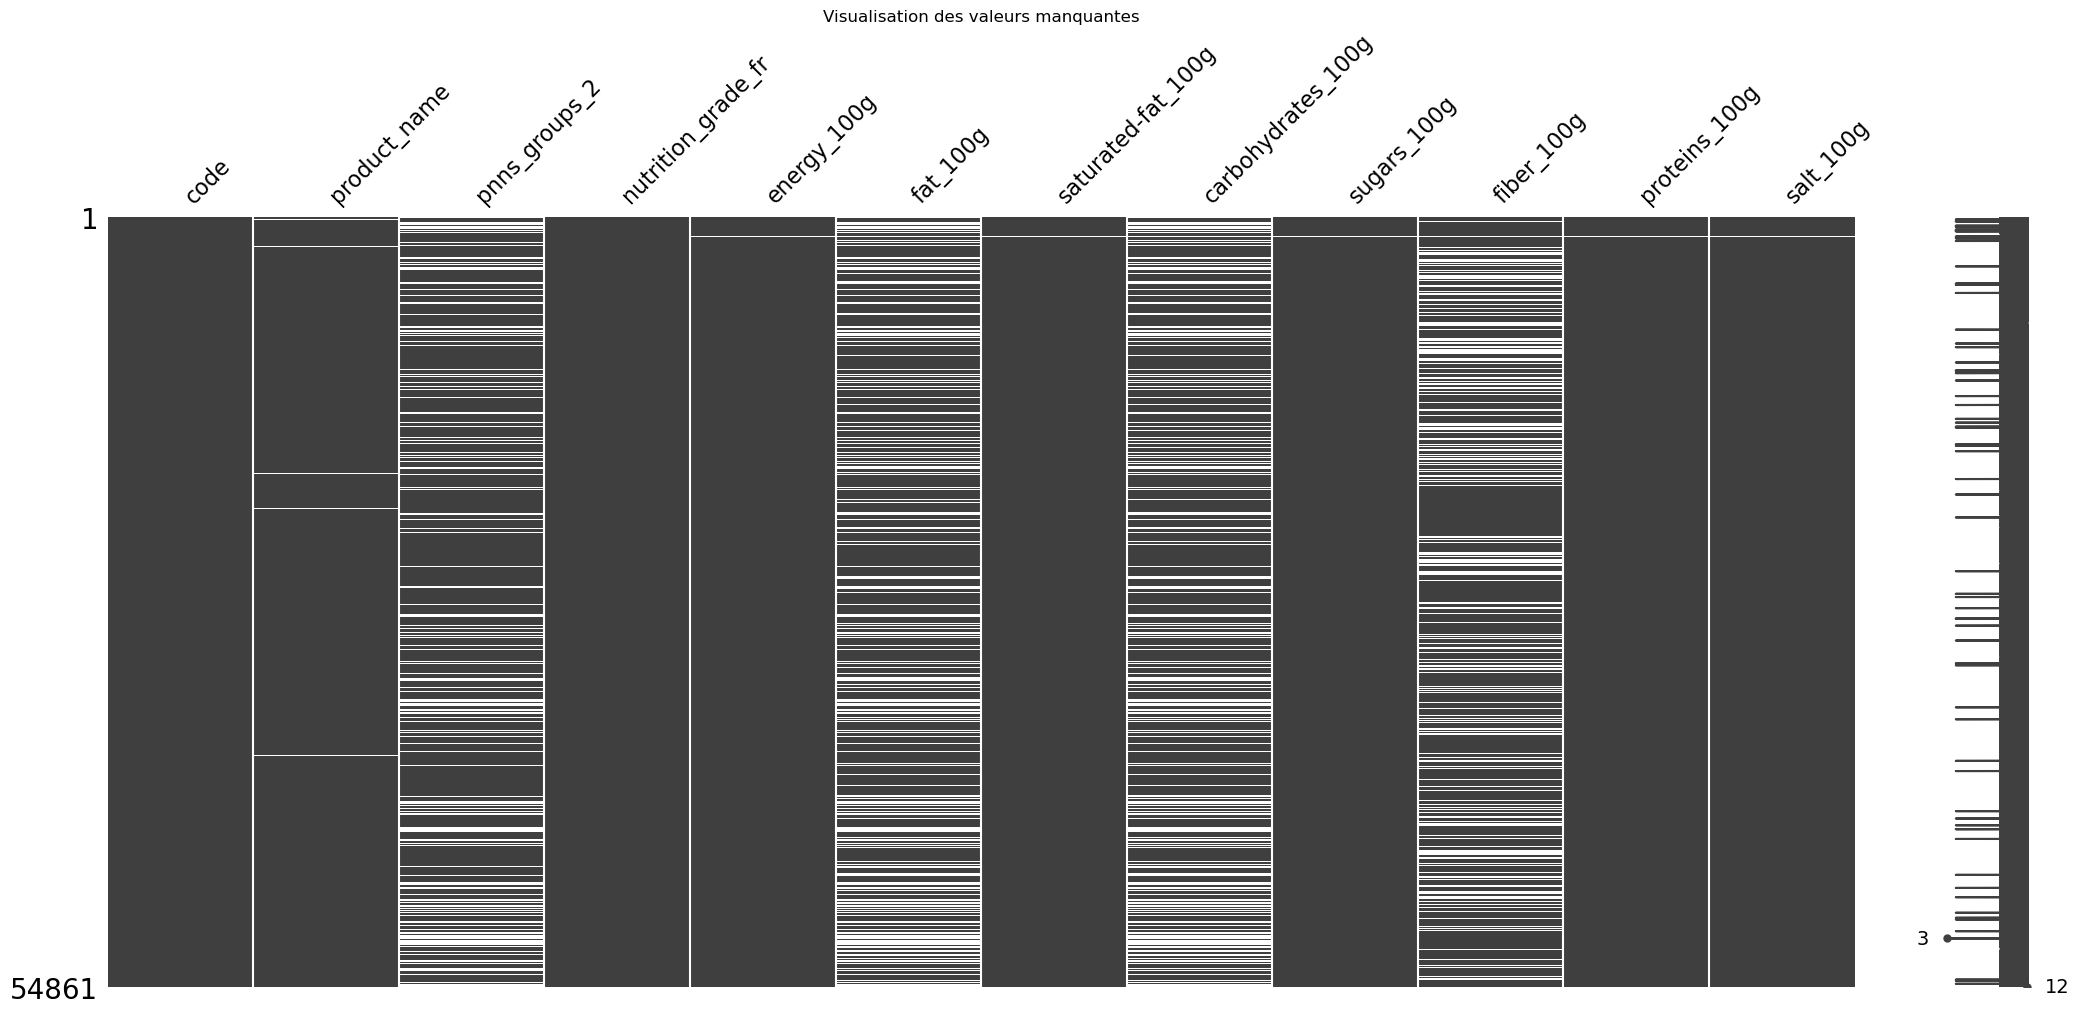

In [1069]:
!pip install missingno
import missingno as msno

# Heatmap des valeurs manquantes
msno.matrix(data_filtrée_pertinente)
plt.title("Visualisation des valeurs manquantes")
plt.show()

# 3. Traitement des valeurs manquantes <a id="Traitement-des-valeurs-manquantes"></a>

### 3.1. Traitement de la colonne 'product_name' <a id="Traitement-de-la-colonne-'product_name'"></a>

In [1073]:
# Affichage des lignes où product_name est manquant
produits_manquants = data_filtrée_pertinente[data_filtrée_pertinente['product_name'].isnull()]
print(produits_manquants)

                code product_name   pnns_groups_2 nutrition_grade_fr  \
41             83164          NaN         unknown                  a   
121      16229902933          NaN         unknown                  b   
178      25675051201          NaN         unknown                  e   
237      34780178000          NaN         unknown                  c   
306      42272008520          NaN  One-dish meals                  c   
...              ...          ...             ...                ...   
54032  5601151989814          NaN         unknown                  b   
54139  5709152014716          NaN         unknown                  e   
54293  5997523324292          NaN         unknown                  d   
54406  6291011053831          NaN         unknown                  d   
54664  7500326168468          NaN         unknown                  c   

       energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
41           586.0      3.80                 1.4           16.2

* Open Food Facts qui est une base de données libre contenant des informations sur des produits alimentaires du monde entier, propose une API (Application Programming Interface, ou Interface de Programmation d'Applications en français), qui permet de rechercher des produits et de récupérer leurs informations, y compris les product_name. Nous allons utiliser cette base de données via cette API pour récupérer automatiquement les noms des produits manquants, en fonction de leur code.

Lorsque nous faisons une requête à l'API, elle répond avec des données sous forme de JSON (un format structuré), que le code utilise ensuite pour extraire et afficher le nom du produit.

Etapes du code :
* Envoi d'une requête à l'API avec un code-barres.
* Récupération et analyse de la réponse pour en extraire le nom du produit.
* Remplissage automatiquement des noms de produits manquants dans notre dataframe.
* Les requêtes sont envoyées par groupes de 100 codes à la fois, avec une pause de 30 secondes entre chaque groupe pour éviter de dépasser les limites de l'API.

In [1076]:
import requests
import time


# Fonction pour obtenir les informations d'un produit via le code-barres
def get_product_name_from_code(code):
    url = f"https://world.openfoodfacts.org/api/v0/product/{code}.json"
    response = requests.get(url)
    if response.status_code == 200:
        product_data = response.json()
        if 'product' in product_data and 'product_name' in product_data['product']:
            return product_data['product']['product_name']
        else:
            print(f"Pas de 'product_name' trouvé pour le code : {code}")
    elif response.status_code == 429:
        print(f"Limite de requêtes atteinte pour le code {code}. Attente avant de réessayer...")
        time.sleep(30)  # Attente de 30 secondes avant de réessayer
        return get_product_name_from_code(code)  # Réessai après le délai
    else:
        print(f"Erreur lors de l'accès à l'API pour le code : {code}, statut HTTP : {response.status_code}")
    return None

# Fonction pour remplir les noms de produits manquants
def fill_missing_product_names_in_batches(data_filtrée_pertinente, batch_size=100):
    # Vérifier si la colonne 'product_name' est catégorielle
    if data_filtrée_pertinente['product_name'].dtype.name == 'category':
        # Convertir en objet temporairement pour éviter les restrictions
        data_filtrée_pertinente['product_name'] = data_filtrée_pertinente['product_name'].astype('object')

    # Filtrer les lignes où 'product_name' est manquant
    missing_product_names = data_filtrée_pertinente[data_filtrée_pertinente['product_name'].isnull()]

    # Diviser la liste des codes en groupes (batches)
    codes = missing_product_names['code'].tolist()
    num_batches = (len(codes) // batch_size) + (1 if len(codes) % batch_size != 0 else 0)

    for batch_idx in range(num_batches):
        batch_codes = codes[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        print(f"Traitement du lot {batch_idx + 1}/{num_batches} avec {len(batch_codes)} codes.")
        
        for code in batch_codes:
            print(f"Vérification pour le code : {code}")
            product_name = get_product_name_from_code(code)
            if product_name:
                # Mettre à jour directement dans le DataFrame
                data_filtrée_pertinente.loc[data_filtrée_pertinente['code'] == code, 'product_name'] = product_name
        
        # Attente entre les groupes pour éviter de dépasser les limites API
        time.sleep(30)  # Attente de 30 secondes

    # Si la colonne était catégorielle, reconvertir après traitement
    if 'category' in data_filtrée_pertinente['product_name'].dtype.name:
        data_filtrée_pertinente['product_name'] = data_filtrée_pertinente['product_name'].astype('category')

    return data_filtrée_pertinente

# Application
data_filtrée_pertinente = fill_missing_product_names_in_batches(data_filtrée_pertinente, batch_size=100)

Traitement du lot 1/3 avec 100 codes.
Vérification pour le code : 83164
Vérification pour le code : 16229902933
Vérification pour le code : 25675051201
Vérification pour le code : 34780178000
Vérification pour le code : 42272008520
Vérification pour le code : 517805
Vérification pour le code : 738064
Vérification pour le code : 903882
Vérification pour le code : 911924
Vérification pour le code : 701243012330
Vérification pour le code : 71109
Vérification pour le code : 2000000033230
Vérification pour le code : 2000000033232
Vérification pour le code : 2000000044956
Vérification pour le code : 2000000044958
Vérification pour le code : 2000000045941
Pas de 'product_name' trouvé pour le code : 2000000045941
Vérification pour le code : 20005443
Vérification pour le code : 20009830
Vérification pour le code : 20023716
Vérification pour le code : 20046408
Vérification pour le code : 20144784
Vérification pour le code : 20177492
Vérification pour le code : 20198107
Vérification pour le code 

* Affichage des noms de produits récupérés par le code et via l'API

In [1079]:
updated_rows = data_filtrée_pertinente[~data_filtrée_pertinente['product_name'].isnull()]  # Lignes où 'product_name' n'est pas null
updated_rows.head(50)

code                                       product_name  \
0        36252                                     Lion Peanut x2   
1     10187319                                     Mini Confettis   
2     10207260                         Praliné Amande Et Noisette   
3     40608754                              Pepsi, Nouveau goût !   
4     69161025                          Tarte Poireaux Et Lardons   
5     87177756                                                7Up   
6           10                                  Madeleines nature   
7           30                                      Cakes Raisins   
8           31                                   Cakes aux Fruits   
9           50                             Financiers aux Amandes   
10          51                                    Fondants Citron   
11   606009841                                Beignets framboises   
12         104                                  30 Panach' Fruits   
13       11501                             Curiously Strong Mints   
14       11693    All Buter Belgian White Chocolate Chunk Cookies   
15       11730                         Cookies Cranberry & Orange   
16       11747             Triple Belgian Chocolaté Chunk Cookies   
17       11778                                Stem Ginger Cookies   
18       11815                                Stem Ginger Dunkers   
19       13628                                   Chicken pad thaï   
20       18210                            Carrot & Coriander soup   
21  2000003395                    Black & White Crispbread Sticks   
22         227                            Bijou Caramel ChocoLait   
23       23092                         Maple syrup & pecan cookie   
24       24846                                     Masala Ketchup   
25       25751                                    Honey roast ham   
26       26857                  Cornish Cruncher & Balsamic Onion   
27       30069                                           Le Paris   
28       31059                           Ultimate English Muffins   
29       31858                       Pur Soup' Velouté de légumes   
30       41089                               All Butter Croissant   
31       44196                                  Cantina tortillas   
32       48569                                     Barbecue Sauce   
33       58001                              Bramley Apple Crumble   
34       68789                                   Rollmop Herrings   
35       71321         Smoothie Vanilla Bean Maple Syrup & Yogurt   
36       71543                      Aloe Vera Grape & Apple Juice   
37       73455  grilled Cajun chicken breast, spicy wedges & s...   
38       78115                  Mild Cheddar with Onions & Chives   
39       80910                   Poulet Tikka Masala Et Riz Pilaf   
40       82372                                         Mini bites   
41       83164                          Poulet Korma et riz pilaf   
42       88978                             Fresh Drinking Coconut   
43       90100                     Pulled Pork & Chorizo Feijoada   
44       90407                              Brewer's Malted Grain   
45       91244                         Roasted Vegetables Lasagne   
46       91640                                  Moutarde Posh Dog   
47  9800892204                                            Nutella   
48  9800895250                                            Nutella   
49       98236                                            custard   

            pnns_groups_2 nutrition_grade_fr  energy_100g   fat_100g  \
0                 unknown                  e       1883.0  20.000000   
1                     NaN                  d       1753.0        NaN   
2                     NaN                  d       2406.0        NaN   
3     Sweetened beverages                  e        177.0   0.000000   
4                     NaN                  d       1079.0        NaN   
5     Sweetened beverages                  e        177.0 

* Vérification du nombre de valeurs manquantes après récupération

In [1082]:
# Vérification du nombre de valeurs manquantes après l'exécution
remaining_missing = data_filtrée_pertinente['product_name'].isnull().sum()
print(f"Nombre de produits dont 'product_name' est encore manquant : {remaining_missing}")

Nombre de produits dont 'product_name' est encore manquant : 33


In [1084]:
# Vérification des lignes où 'product_name' est encore manquant
missing_product_names = data_filtrée_pertinente[data_filtrée_pertinente['product_name'].isnull()]
print(missing_product_names[['code']])

                code
237      34780178000
1414   2000000033230
1415   2000000033232
1510   2000000044956
1511   2000000044958
1526   2000000045941
1722        20023716
2338   2021682011298
2572        20347079
6184   3033490853914
6287   3033491024436
14234  3228850006042
17913  3250391883561
22212  3257984627434
24321  3263856732410
24950  3263859700812
28023  3276170018818
28136  3276770208688
29308  3300060420044
29522  3302747886020
34079  3422210442567
35375  3465410004135
46344  3760005022205
48945  4006894590203
50481  5010972000811
50557  5013822000665
50954  5051413033128
51220  5060082180101
51409  5200112900723
51659  5400112268308
51724  5400112880401
53522  5413588619437
53554  5413982102009


* Valeurs manquantes restantes pour toutes les colonnes

In [1087]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                      0
product_name             33
pnns_groups_2         12114
nutrition_grade_fr        0
energy_100g              72
fat_100g              15184
saturated-fat_100g       72
carbohydrates_100g    15235
sugars_100g              72
fiber_100g            15228
proteins_100g            72
salt_100g                72
dtype: int64


### 3.2. Traitement de la colonne 'energy_100g' <a id="Traitement-de-la-colonne-'energy_100g'-"></a>

* Récupération des valeurs via l'API, en fonction du code

In [1091]:
import requests
import time

# Fonction pour obtenir la teneur en énergie d'un produit via le code-barres
def get_energy_from_code(code):
    url = f"https://world.openfoodfacts.org/api/v0/product/{code}.json"
    response = requests.get(url)
    if response.status_code == 200:
        product_data = response.json()
        if 'product' in product_data and 'nutriments' in product_data['product'] and 'energy_100g' in product_data['product']['nutriments']:
            return product_data['product']['nutriments']['energy_100g']
        else:
            print(f"Pas de 'energy_100g' trouvé pour le code : {code}")
    elif response.status_code == 429:
        print(f"Limite de requêtes atteinte pour le code {code}. Attente avant de réessayer...")
        time.sleep(30)  # Attente de 30 secondes avant de réessayer
        return get_energy_from_code(code)  # Réessai après le délai
    else:
        print(f"Erreur lors de l'accès à l'API pour le code : {code}, statut HTTP : {response.status_code}")
    return None

# Fonction pour remplir les valeurs de 'energy_100g' manquantes
def fill_missing_energy_in_batches(data_filtrée_pertinente, batch_size=100):
    # Assurer que la colonne 'energy_100g' est de type 'float'
    data_filtrée_pertinente['energy_100g'] = data_filtrée_pertinente['energy_100g'].astype(float)

    # Filtrage des lignes où 'energy_100g' est manquant
    missing_energy = data_filtrée_pertinente[data_filtrée_pertinente['energy_100g'].isnull()]

    # Diviser la liste des codes en groupes (batches)
    codes = missing_energy['code'].tolist()
    num_batches = (len(codes) // batch_size) + (1 if len(codes) % batch_size != 0 else 0)

    for batch_idx in range(num_batches):
        batch_codes = codes[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        print(f"Traitement du lot {batch_idx + 1}/{num_batches} avec {len(batch_codes)} codes.")
        
        for idx, code in enumerate(batch_codes):
            print(f"Vérification pour le code : {code}")
            energy_value = get_energy_from_code(code)
            if energy_value is not None:
                # Trouver l'indice correspondant dans le DataFrame original
                row_idx = missing_energy[missing_energy['code'] == code].index[0]
                data_filtrée_pertinente.at[row_idx, 'energy_100g'] = energy_value
        
        # Attente entre les groupes de codes pour éviter de dépasser la limite de requêtes
        time.sleep(30)  # Attente de 30 secondes entre chaque groupe

    return data_filtrée_pertinente

# Application
data_filtrée_pertinente = fill_missing_energy_in_batches(data_filtrée_pertinente, batch_size=100)

Traitement du lot 1/1 avec 72 codes.
Vérification pour le code : 24463061163
Pas de 'energy_100g' trouvé pour le code : 24463061163
Vérification pour le code : 41500053448
Pas de 'energy_100g' trouvé pour le code : 41500053448
Vérification pour le code : 42272010516
Vérification pour le code : 87703168787
Vérification pour le code : 949453
Vérification pour le code : 968180
Vérification pour le code : 613008735784
Vérification pour le code : 700941700099
Pas de 'energy_100g' trouvé pour le code : 700941700099
Vérification pour le code : 7375273278
Pas de 'energy_100g' trouvé pour le code : 7375273278
Vérification pour le code : 793573214539
Vérification pour le code : 807176706381
Vérification pour le code : 2000000029685
Pas de 'energy_100g' trouvé pour le code : 2000000029685
Vérification pour le code : 2000000041549
Pas de 'energy_100g' trouvé pour le code : 2000000041549
Vérification pour le code : 2000000045719
Pas de 'energy_100g' trouvé pour le code : 2000000045719
Vérification 

* Affichage des valeurs de energy_100g récupérées par le code et via l'API

In [1094]:
updated_rows = data_filtrée_pertinente[~data_filtrée_pertinente['energy_100g'].isnull()]  # Lignes où 'energy_100g' n'est pas null
updated_rows.head(50)

code                                       product_name  \
0        36252                                     Lion Peanut x2   
1     10187319                                     Mini Confettis   
2     10207260                         Praliné Amande Et Noisette   
3     40608754                              Pepsi, Nouveau goût !   
4     69161025                          Tarte Poireaux Et Lardons   
5     87177756                                                7Up   
6           10                                  Madeleines nature   
7           30                                      Cakes Raisins   
8           31                                   Cakes aux Fruits   
9           50                             Financiers aux Amandes   
10          51                                    Fondants Citron   
11   606009841                                Beignets framboises   
12         104                                  30 Panach' Fruits   
13       11501                             Curiously Strong Mints   
14       11693    All Buter Belgian White Chocolate Chunk Cookies   
15       11730                         Cookies Cranberry & Orange   
16       11747             Triple Belgian Chocolaté Chunk Cookies   
17       11778                                Stem Ginger Cookies   
18       11815                                Stem Ginger Dunkers   
19       13628                                   Chicken pad thaï   
20       18210                            Carrot & Coriander soup   
21  2000003395                    Black & White Crispbread Sticks   
22         227                            Bijou Caramel ChocoLait   
23       23092                         Maple syrup & pecan cookie   
24       24846                                     Masala Ketchup   
25       25751                                    Honey roast ham   
26       26857                  Cornish Cruncher & Balsamic Onion   
27       30069                                           Le Paris   
28       31059                           Ultimate English Muffins   
29       31858                       Pur Soup' Velouté de légumes   
30       41089                               All Butter Croissant   
31       44196                                  Cantina tortillas   
32       48569                                     Barbecue Sauce   
33       58001                              Bramley Apple Crumble   
34       68789                                   Rollmop Herrings   
35       71321         Smoothie Vanilla Bean Maple Syrup & Yogurt   
36       71543                      Aloe Vera Grape & Apple Juice   
37       73455  grilled Cajun chicken breast, spicy wedges & s...   
38       78115                  Mild Cheddar with Onions & Chives   
39       80910                   Poulet Tikka Masala Et Riz Pilaf   
40       82372                                         Mini bites   
41       83164                          Poulet Korma et riz pilaf   
42       88978                             Fresh Drinking Coconut   
43       90100                     Pulled Pork & Chorizo Feijoada   
44       90407                              Brewer's Malted Grain   
45       91244                         Roasted Vegetables Lasagne   
46       91640                                  Moutarde Posh Dog   
47  9800892204                                            Nutella   
48  9800895250                                            Nutella   
49       98236                                            custard   

            pnns_groups_2 nutrition_grade_fr  energy_100g   fat_100g  \
0                 unknown                  e       1883.0  20.000000   
1                     NaN                  d       1753.0        NaN   
2                     NaN                  d       2406.0        NaN   
3     Sweetened beverages                  e        177.0   0.000000   
4                     NaN                  d       1079.0        NaN   
5     Sweetened beverages                  e        177.0 

* Vérification du nombre de valeurs manquantes après récupération

In [1097]:
# Vérification du nombre de valeurs manquantes après l'exécution
remaining_missing_energy = data_filtrée_pertinente['energy_100g'].isnull().sum()
print(f"Nombre de produits dont 'energy_100g' est encore manquant : {remaining_missing_energy}")

Nombre de produits dont 'energy_100g' est encore manquant : 24


In [1099]:
# Vérification des lignes où 'energy_100g' est encore manquant
missing_energy = data_filtrée_pertinente[data_filtrée_pertinente['energy_100g'].isnull()]

# Afficher les codes et les noms de produits correspondants
print(missing_energy[['code', 'product_name']])

                code                                       product_name
174      24463061163                           Sriracha Hot Chili Sauce
298      41500053448                                     Classic Yellow
956     700941700099                  Salsa de la Muerte with Chipotle 
984       7375273278            Vinaigre de riz pour sushi (すし酢) Mizkan
1390   2000000029685      12 légumes façon minestrone recette italienne
1482   2000000041549                                 Feed. Reasy-to-use
1524   2000000045719                              Eau de Source Saguaro
1710        20022952                           Eau de source de la Doye
3518   2118728837704  eau minérale naturelle des Vosges du nord - lé...
8029   3068320112688                     Eau minérale naturelle gazeuse
10954  3175681027459                              Acqua Drainer Express
11126  3175681138582         Mon repas Gerlinéa, crèmes saveur pralinée
16308  3250390051084                             Eau minérale na

* Correction des valeurs manquantes de energy_100g en fonction du produit. Nous en profiterons pour corriger les valeurs des autres features.

In [1102]:
# Correction des valeurs pour les produits spécifiques

# Ligne 174 
data_filtrée_pertinente.loc[174, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[174, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[174, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[174, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[174, 'sugars_100g'] = np.float32(0.99)
data_filtrée_pertinente.loc[174, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[174, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[174, 'salt_100g'] = np.float32(1.4)

# Ligne 298 
data_filtrée_pertinente.loc[298, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[298, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[298, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[298, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[298, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[298, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[298, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[298, 'salt_100g'] = np.float32(1.1)

# Ligne 956 
data_filtrée_pertinente.loc[956, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[956, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[956, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[956, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[956, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[956, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[956, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[956, 'salt_100g'] = np.float32(2.4)

# Ligne 984 
data_filtrée_pertinente.loc[984, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[984, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[984, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[984, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[984, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[984, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[984, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[984, 'salt_100g'] = np.float32(0.0)

# Lignes 1390, 1524
# Suppression de la ligne avec l'index 1390 (aucun produit trouvé avec le code)
data_filtrée_pertinente = data_filtrée_pertinente.drop(index=1390)
# Suppression de la ligne avec l'index 1524 (fait doublon avec le produit ayant le code 2000000045719)
data_filtrée_pertinente = data_filtrée_pertinente.drop(index=1524)

# Ligne 1482 
data_filtrée_pertinente.loc[1482, 'energy_100g'] = np.float32(2728.0)
data_filtrée_pertinente.loc[1482, 'fat_100g'] = np.float32(25.2)
data_filtrée_pertinente.loc[1482, 'saturated-fat_100g'] = np.float32(3.1)
data_filtrée_pertinente.loc[1482, 'carbohydrates_100g'] = np.float32(83.1)
data_filtrée_pertinente.loc[1482, 'sugars_100g'] = np.float32(30.2)
data_filtrée_pertinente.loc[1482, 'fiber_100g'] = np.float32(9.6)
data_filtrée_pertinente.loc[1482, 'proteins_100g'] = np.float32(18.5)
data_filtrée_pertinente.loc[1482, 'salt_100g'] = np.float32(0.3)

# Ligne 1710 
data_filtrée_pertinente.loc[1710, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[1710, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[1710, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[1710, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[1710, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[1710, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[1710, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[1710, 'salt_100g'] = np.float32(0.0)

# Ligne 3518 
data_filtrée_pertinente.loc[3518, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[3518, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[3518, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[3518, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[3518, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[3518, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[3518, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[3518, 'salt_100g'] = np.float32(0.0)

# Ligne 8029 
data_filtrée_pertinente.loc[8029, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[8029, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[8029, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[8029, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[8029, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[8029, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[8029, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[8029, 'salt_100g'] = np.float32(0.0)

# Ligne 10954 
data_filtrée_pertinente.loc[10954, 'energy_100g'] = np.float32(10.0)
data_filtrée_pertinente.loc[10954, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[10954, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[10954, 'carbohydrates_100g'] = np.float32(1.0)
data_filtrée_pertinente.loc[10954, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[10954, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[10954, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[10954, 'salt_100g'] = np.float32(0.002)

# Ligne 11126 
data_filtrée_pertinente.loc[11126, 'energy_100g'] = np.float32(886.0)
data_filtrée_pertinente.loc[11126, 'fat_100g'] = np.float32(4.2)
data_filtrée_pertinente.loc[11126, 'saturated-fat_100g'] = np.float32(1.3)
data_filtrée_pertinente.loc[11126, 'carbohydrates_100g'] = np.float32(29.0)
data_filtrée_pertinente.loc[11126, 'sugars_100g'] = np.float32(17.0)
data_filtrée_pertinente.loc[11126, 'fiber_100g'] = np.float32(2.1)
data_filtrée_pertinente.loc[11126, 'proteins_100g'] = np.float32(13.0)
data_filtrée_pertinente.loc[11126, 'salt_100g'] = np.float32(1.27)

# Ligne 16308 
data_filtrée_pertinente.loc[16308, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[16308, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[16308, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[16308, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[16308, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[16308, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[16308, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[16308, 'salt_100g'] = np.float32(0.0)

# Ligne 27882
data_filtrée_pertinente.loc[27882, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[27882, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[27882, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[27882, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[27882, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[27882, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[27882, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[27882, 'salt_100g'] = np.float32(0.0)

# Ligne 28624
data_filtrée_pertinente.loc[28624, 'energy_100g'] = np.float32(3.22)
data_filtrée_pertinente.loc[28624, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[28624, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[28624, 'carbohydrates_100g'] = np.float32(0.03)
data_filtrée_pertinente.loc[28624, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[28624, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[28624, 'proteins_100g'] = np.float32(0.15)
data_filtrée_pertinente.loc[28624, 'salt_100g'] = np.float32(0.0)

# Ligne 28625
data_filtrée_pertinente.loc[28625, 'energy_100g'] = np.float32(21.6)
data_filtrée_pertinente.loc[28625, 'fat_100g'] = np.float32(0.5)
data_filtrée_pertinente.loc[28625, 'saturated-fat_100g'] = np.float32(0.04)
data_filtrée_pertinente.loc[28625, 'carbohydrates_100g'] = np.float32(0.05)
data_filtrée_pertinente.loc[28625, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[28625, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[28625, 'proteins_100g'] = np.float32(0.13)
data_filtrée_pertinente.loc[28625, 'salt_100g'] = np.float32(0.0)

# Ligne 28634
data_filtrée_pertinente.loc[28634, 'energy_100g'] = np.float32(6.6)
data_filtrée_pertinente.loc[28634, 'fat_100g'] = np.float32(0.5)
data_filtrée_pertinente.loc[28634, 'saturated-fat_100g'] = np.float32(0.04)
data_filtrée_pertinente.loc[28634, 'carbohydrates_100g'] = np.float32(0.05)
data_filtrée_pertinente.loc[28634, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[28634, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[28634, 'proteins_100g'] = np.float32(0.39)
data_filtrée_pertinente.loc[28634, 'salt_100g'] = np.float32(0.0)

# Ligne 29130
data_filtrée_pertinente.loc[29130, 'energy_100g'] = np.float32(448.0)
data_filtrée_pertinente.loc[29130, 'fat_100g'] = np.float32(2.0)
data_filtrée_pertinente.loc[29130, 'saturated-fat_100g'] = np.float32(0.6)
data_filtrée_pertinente.loc[29130, 'carbohydrates_100g'] = np.float32(11.4)
data_filtrée_pertinente.loc[29130, 'sugars_100g'] = np.float32(3.1)
data_filtrée_pertinente.loc[29130, 'fiber_100g'] = np.float32(2.2)
data_filtrée_pertinente.loc[29130, 'proteins_100g'] = np.float32(9.7)
data_filtrée_pertinente.loc[29130, 'salt_100g'] = np.float32(0.48)

# Ligne 31952
data_filtrée_pertinente.loc[31952, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[31952, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[31952, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[31952, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[31952, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[31952, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[31952, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[31952, 'salt_100g'] = np.float32(0.0)

# Ligne 34950
data_filtrée_pertinente.loc[34950, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[34950, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[34950, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[34950, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[34950, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[34950, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[34950, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[34950, 'salt_100g'] = np.float32(0.0)

# Ligne 35802
data_filtrée_pertinente.loc[35802, 'energy_100g'] = np.float32(918.0)
data_filtrée_pertinente.loc[35802, 'fat_100g'] = np.float32(4.3)
data_filtrée_pertinente.loc[35802, 'saturated-fat_100g'] = np.float32(0.5)
data_filtrée_pertinente.loc[35802, 'carbohydrates_100g'] = np.float32(39.1)
data_filtrée_pertinente.loc[35802, 'sugars_100g'] = np.float32(2.9)
data_filtrée_pertinente.loc[35802, 'fiber_100g'] = np.float32(1.8)
data_filtrée_pertinente.loc[35802, 'proteins_100g'] = np.float32(4.8)
data_filtrée_pertinente.loc[35802, 'salt_100g'] = np.float32(0.95)

# Ligne 38768
data_filtrée_pertinente.loc[38768, 'energy_100g'] = np.float32(1895.0)
data_filtrée_pertinente.loc[38768, 'fat_100g'] = np.float32(18.0)
data_filtrée_pertinente.loc[38768, 'saturated-fat_100g'] = np.float32(2.2)
data_filtrée_pertinente.loc[38768, 'carbohydrates_100g'] = np.float32(51.0)
data_filtrée_pertinente.loc[38768, 'sugars_100g'] = np.float32(6.4)
data_filtrée_pertinente.loc[38768, 'fiber_100g'] = np.float32(5.1)
data_filtrée_pertinente.loc[38768, 'proteins_100g'] = np.float32(19.0)
data_filtrée_pertinente.loc[38768, 'salt_100g'] = np.float32(2.9)

# Ligne 44336
data_filtrée_pertinente.loc[44336, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[44336, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[44336, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[44336, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[44336, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[44336, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[44336, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[44336, 'salt_100g'] = np.float32(0.0)

# Ligne 54666
data_filtrée_pertinente.loc[54666, 'energy_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[54666, 'fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[54666, 'saturated-fat_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[54666, 'carbohydrates_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[54666, 'sugars_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[54666, 'fiber_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[54666, 'proteins_100g'] = np.float32(0.0)
data_filtrée_pertinente.loc[54666, 'salt_100g'] = np.float32(0.25)

# Vérification après correction
print(data_filtrée_pertinente.loc[[174, 298, 956, 984, 1482, 1710, 3518, 8029, 10954, 11126, 16308, 27882, 
                                   28624, 28625, 28634, 29130, 31952, 34950, 35802, 38768, 44336, 54666]])

                code                                       product_name  \
174      24463061163                           Sriracha Hot Chili Sauce   
298      41500053448                                     Classic Yellow   
956     700941700099                  Salsa de la Muerte with Chipotle    
984       7375273278            Vinaigre de riz pour sushi (すし酢) Mizkan   
1482   2000000041549                                 Feed. Reasy-to-use   
1710        20022952                           Eau de source de la Doye   
3518   2118728837704  eau minérale naturelle des Vosges du nord - lé...   
8029   3068320112688                     Eau minérale naturelle gazeuse   
10954  3175681027459                              Acqua Drainer Express   
11126  3175681138582         Mon repas Gerlinéa, crèmes saveur pralinée   
16308  3250390051084                             Eau minérale naturelle   
27882  3274080005003                                     Eau Cristaline   
28624  3286010012241     

* Valeurs manquantes restantes pour toutes les colonnes

In [1105]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                      0
product_name             33
pnns_groups_2         12114
nutrition_grade_fr        0
energy_100g               0
fat_100g              15160
saturated-fat_100g       48
carbohydrates_100g    15211
sugars_100g              48
fiber_100g            15204
proteins_100g            48
salt_100g                48
dtype: int64


### 3.3. Traitement de la colonne 'saturated-fat_100g' <a id="Traitement-de-la-colonne-'saturated-fat_100g'-"></a>

* Récupération des valeurs via l'API, en fonction du code

In [1109]:
import requests
import time

# Fonction pour obtenir la teneur en acides gras saturés d'un produit via le code-barres
def get_saturated_fat_from_code(code):
    url = f"https://world.openfoodfacts.org/api/v0/product/{code}.json"
    response = requests.get(url)
    if response.status_code == 200:
        product_data = response.json()
        if 'product' in product_data and 'nutriments' in product_data['product'] and 'saturated-fat_100g' in product_data['product']['nutriments']:
            return product_data['product']['nutriments']['saturated-fat_100g']
        else:
            print(f"Pas de 'saturated-fat_100g' trouvé pour le code : {code}")
    elif response.status_code == 429:
        print(f"Limite de requêtes atteinte pour le code {code}. Attente avant de réessayer...")
        time.sleep(30)  # Attente de 30 secondes avant de réessayer
        return get_saturated_fat_from_code(code)  # Réessai après le délai
    else:
        print(f"Erreur lors de l'accès à l'API pour le code : {code}, statut HTTP : {response.status_code}")
    return None

# Fonction pour remplir les valeurs de 'saturated-fat_100g' manquantes
def fill_missing_saturated_fat_in_batches(data_filtrée_pertinente, batch_size=100):
    # Assurer que la colonne 'saturated-fat_100g' est de type 'float'
    data_filtrée_pertinente['saturated-fat_100g'] = data_filtrée_pertinente['saturated-fat_100g'].astype(float)

    # Filtrage des lignes où 'saturated-fat_100g' est manquant
    missing_saturated_fat = data_filtrée_pertinente[data_filtrée_pertinente['saturated-fat_100g'].isnull()]

    # Diviser la liste des codes en groupes (batches)
    codes = missing_saturated_fat['code'].tolist()
    num_batches = (len(codes) // batch_size) + (1 if len(codes) % batch_size != 0 else 0)

    for batch_idx in range(num_batches):
        batch_codes = codes[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        print(f"Traitement du lot {batch_idx + 1}/{num_batches} avec {len(batch_codes)} codes.")
        
        for idx, code in enumerate(batch_codes):
            print(f"Vérification pour le code : {code}")
            saturated_fat_value = get_saturated_fat_from_code(code)
            if saturated_fat_value is not None:
                # Trouver l'indice correspondant dans le DataFrame original
                row_idx = missing_saturated_fat[missing_saturated_fat['code'] == code].index[0]
                data_filtrée_pertinente.at[row_idx, 'saturated-fat_100g'] = saturated_fat_value
        
        # Attente entre les groupes de codes pour éviter de dépasser la limite de requêtes
        time.sleep(30)  # Attente de 30 secondes entre chaque groupe

    return data_filtrée_pertinente

# Application
data_filtrée_pertinente = fill_missing_saturated_fat_in_batches(data_filtrée_pertinente, batch_size=100)

Traitement du lot 1/1 avec 48 codes.
Vérification pour le code : 42272010516
Vérification pour le code : 87703168787
Vérification pour le code : 949453
Vérification pour le code : 968180
Vérification pour le code : 613008735784
Vérification pour le code : 793573214539
Vérification pour le code : 807176706381
Vérification pour le code : 28015011
Vérification pour le code : 3011360010346
Vérification pour le code : 3021690018868
Vérification pour le code : 3100880183583
Vérification pour le code : 3107400001051
Vérification pour le code : 3165950215700
Vérification pour le code : 3175680906755
Vérification pour le code : 3179732370754
Vérification pour le code : 3222472254959
Vérification pour le code : 3222474258306
Vérification pour le code : 3229820178684
Vérification pour le code : 3230890014161
Vérification pour le code : 3242272877059
Vérification pour le code : 3242274500054
Vérification pour le code : 3250390006657
Vérification pour le code : 3250390050124
Vérification pour le co

* Affichage des valeurs de saturated-fat_100g récupérées par le code et via l'API

In [1112]:
updated_rows = data_filtrée_pertinente[~data_filtrée_pertinente['saturated-fat_100g'].isnull()]  # Lignes où 'saturated-fat_100g' n'est pas null
updated_rows.head(50)

code                                       product_name  \
0        36252                                     Lion Peanut x2   
1     10187319                                     Mini Confettis   
2     10207260                         Praliné Amande Et Noisette   
3     40608754                              Pepsi, Nouveau goût !   
4     69161025                          Tarte Poireaux Et Lardons   
5     87177756                                                7Up   
6           10                                  Madeleines nature   
7           30                                      Cakes Raisins   
8           31                                   Cakes aux Fruits   
9           50                             Financiers aux Amandes   
10          51                                    Fondants Citron   
11   606009841                                Beignets framboises   
12         104                                  30 Panach' Fruits   
13       11501                             Curiously Strong Mints   
14       11693    All Buter Belgian White Chocolate Chunk Cookies   
15       11730                         Cookies Cranberry & Orange   
16       11747             Triple Belgian Chocolaté Chunk Cookies   
17       11778                                Stem Ginger Cookies   
18       11815                                Stem Ginger Dunkers   
19       13628                                   Chicken pad thaï   
20       18210                            Carrot & Coriander soup   
21  2000003395                    Black & White Crispbread Sticks   
22         227                            Bijou Caramel ChocoLait   
23       23092                         Maple syrup & pecan cookie   
24       24846                                     Masala Ketchup   
25       25751                                    Honey roast ham   
26       26857                  Cornish Cruncher & Balsamic Onion   
27       30069                                           Le Paris   
28       31059                           Ultimate English Muffins   
29       31858                       Pur Soup' Velouté de légumes   
30       41089                               All Butter Croissant   
31       44196                                  Cantina tortillas   
32       48569                                     Barbecue Sauce   
33       58001                              Bramley Apple Crumble   
34       68789                                   Rollmop Herrings   
35       71321         Smoothie Vanilla Bean Maple Syrup & Yogurt   
36       71543                      Aloe Vera Grape & Apple Juice   
37       73455  grilled Cajun chicken breast, spicy wedges & s...   
38       78115                  Mild Cheddar with Onions & Chives   
39       80910                   Poulet Tikka Masala Et Riz Pilaf   
40       82372                                         Mini bites   
41       83164                          Poulet Korma et riz pilaf   
42       88978                             Fresh Drinking Coconut   
43       90100                     Pulled Pork & Chorizo Feijoada   
44       90407                              Brewer's Malted Grain   
45       91244                         Roasted Vegetables Lasagne   
46       91640                                  Moutarde Posh Dog   
47  9800892204                                            Nutella   
48  9800895250                                            Nutella   
49       98236                                            custard   

            pnns_groups_2 nutrition_grade_fr  energy_100g   fat_100g  \
0                 unknown                  e       1883.0  20.000000   
1                     NaN                  d       1753.0        NaN   
2                     NaN                  d       2406.0        NaN   
3     Sweetened beverages                  e        177.0   0.000000   
4                     NaN                  d       1079.0        NaN   
5     Sweetened beverages                  e        177.0 

* Vérification du nombre de valeurs manquantes après récupération

In [1115]:
# Vérification du nombre de valeurs manquantes après l'exécution
remaining_missing_saturated_fat = data_filtrée_pertinente['saturated-fat_100g'].isnull().sum()
print(f"Nombre de produits dont 'saturated-fat_100g' est encore manquant : {remaining_missing_saturated_fat}")

Nombre de produits dont 'saturated-fat_100g' est encore manquant : 0


In [1117]:
# Vérification des lignes où 'saturated-fat_100g' est encore manquant
missing_saturated_fat = data_filtrée_pertinente[data_filtrée_pertinente['saturated-fat_100g'].isnull()]

# Afficher les codes et les noms de produits correspondants
print(missing_saturated_fat[['code', 'product_name']])

Empty DataFrame
Columns: [code, product_name]
Index: []


* Valeurs manquantes restantes pour toutes les colonnes

In [1120]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                      0
product_name             33
pnns_groups_2         12114
nutrition_grade_fr        0
energy_100g               0
fat_100g              15160
saturated-fat_100g        0
carbohydrates_100g    15211
sugars_100g              48
fiber_100g            15204
proteins_100g            48
salt_100g                48
dtype: int64


### 3.4. Traitement de la colonne 'sugars_100g' <a id="Traitement-de-la-colonne-'sugars_100g'-"></a>

* Récupération des valeurs via l'API, en fonction du code

In [1124]:
import requests
import time

# Fonction pour obtenir la teneur en sucres d'un produit via le code-barres
def get_sugars_from_code(code):
    url = f"https://world.openfoodfacts.org/api/v0/product/{code}.json"
    response = requests.get(url)
    if response.status_code == 200:
        product_data = response.json()
        if 'product' in product_data and 'nutriments' in product_data['product'] and 'sugars_100g' in product_data['product']['nutriments']:
            return product_data['product']['nutriments']['sugars_100g']
        else:
            print(f"Pas de 'sugars_100g' trouvé pour le code : {code}")
    elif response.status_code == 429:
        print(f"Limite de requêtes atteinte pour le code {code}. Attente avant de réessayer...")
        time.sleep(30)  # Attente de 30 secondes avant de réessayer
        return get_sugars_from_code(code)  # Réessai après le délai
    else:
        print(f"Erreur lors de l'accès à l'API pour le code : {code}, statut HTTP : {response.status_code}")
    return None

# Fonction pour remplir les valeurs de 'sugars_100g' manquantes
def fill_missing_sugars_in_batches(data_filtrée_pertinente, batch_size=100):
    # Assurer que la colonne 'sugars_100g' est de type 'float'
    data_filtrée_pertinente['sugars_100g'] = data_filtrée_pertinente['sugars_100g'].astype(float)

    # Filtrage des lignes où 'sugars_100g' est manquant
    missing_sugars = data_filtrée_pertinente[data_filtrée_pertinente['sugars_100g'].isnull()]

    # Diviser la liste des codes en groupes (batches)
    codes = missing_sugars['code'].tolist()
    num_batches = (len(codes) // batch_size) + (1 if len(codes) % batch_size != 0 else 0)

    for batch_idx in range(num_batches):
        batch_codes = codes[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        print(f"Traitement du lot {batch_idx + 1}/{num_batches} avec {len(batch_codes)} codes.")
        
        for idx, code in enumerate(batch_codes):
            print(f"Vérification pour le code : {code}")
            sugars_value = get_sugars_from_code(code)
            if sugars_value is not None:
                # Trouver l'indice correspondant dans le DataFrame original
                row_idx = missing_sugars[missing_sugars['code'] == code].index[0]
                data_filtrée_pertinente.at[row_idx, 'sugars_100g'] = sugars_value
        
        # Attente entre les groupes de codes pour éviter de dépasser la limite de requêtes
        time.sleep(30)  # Attente de 30 secondes entre chaque groupe

    return data_filtrée_pertinente

# Application
data_filtrée_pertinente = fill_missing_sugars_in_batches(data_filtrée_pertinente, batch_size=100)

Traitement du lot 1/1 avec 48 codes.
Vérification pour le code : 42272010516
Vérification pour le code : 87703168787
Vérification pour le code : 949453
Vérification pour le code : 968180
Vérification pour le code : 613008735784
Vérification pour le code : 793573214539
Vérification pour le code : 807176706381
Vérification pour le code : 28015011
Vérification pour le code : 3011360010346
Vérification pour le code : 3021690018868
Vérification pour le code : 3100880183583
Vérification pour le code : 3107400001051
Vérification pour le code : 3165950215700
Vérification pour le code : 3175680906755
Vérification pour le code : 3179732370754
Vérification pour le code : 3222472254959
Vérification pour le code : 3222474258306
Vérification pour le code : 3229820178684
Vérification pour le code : 3230890014161
Vérification pour le code : 3242272877059
Vérification pour le code : 3242274500054
Vérification pour le code : 3250390006657
Vérification pour le code : 3250390050124
Vérification pour le co

* Affichage des valeurs de sugars_100g récupérées par le code et via l'API

In [1127]:
updated_rows = data_filtrée_pertinente[~data_filtrée_pertinente['sugars_100g'].isnull()]  # Lignes où 'sugars_100g' n'est pas null
updated_rows.head(50)

code                                       product_name  \
0        36252                                     Lion Peanut x2   
1     10187319                                     Mini Confettis   
2     10207260                         Praliné Amande Et Noisette   
3     40608754                              Pepsi, Nouveau goût !   
4     69161025                          Tarte Poireaux Et Lardons   
5     87177756                                                7Up   
6           10                                  Madeleines nature   
7           30                                      Cakes Raisins   
8           31                                   Cakes aux Fruits   
9           50                             Financiers aux Amandes   
10          51                                    Fondants Citron   
11   606009841                                Beignets framboises   
12         104                                  30 Panach' Fruits   
13       11501                             Curiously Strong Mints   
14       11693    All Buter Belgian White Chocolate Chunk Cookies   
15       11730                         Cookies Cranberry & Orange   
16       11747             Triple Belgian Chocolaté Chunk Cookies   
17       11778                                Stem Ginger Cookies   
18       11815                                Stem Ginger Dunkers   
19       13628                                   Chicken pad thaï   
20       18210                            Carrot & Coriander soup   
21  2000003395                    Black & White Crispbread Sticks   
22         227                            Bijou Caramel ChocoLait   
23       23092                         Maple syrup & pecan cookie   
24       24846                                     Masala Ketchup   
25       25751                                    Honey roast ham   
26       26857                  Cornish Cruncher & Balsamic Onion   
27       30069                                           Le Paris   
28       31059                           Ultimate English Muffins   
29       31858                       Pur Soup' Velouté de légumes   
30       41089                               All Butter Croissant   
31       44196                                  Cantina tortillas   
32       48569                                     Barbecue Sauce   
33       58001                              Bramley Apple Crumble   
34       68789                                   Rollmop Herrings   
35       71321         Smoothie Vanilla Bean Maple Syrup & Yogurt   
36       71543                      Aloe Vera Grape & Apple Juice   
37       73455  grilled Cajun chicken breast, spicy wedges & s...   
38       78115                  Mild Cheddar with Onions & Chives   
39       80910                   Poulet Tikka Masala Et Riz Pilaf   
40       82372                                         Mini bites   
41       83164                          Poulet Korma et riz pilaf   
42       88978                             Fresh Drinking Coconut   
43       90100                     Pulled Pork & Chorizo Feijoada   
44       90407                              Brewer's Malted Grain   
45       91244                         Roasted Vegetables Lasagne   
46       91640                                  Moutarde Posh Dog   
47  9800892204                                            Nutella   
48  9800895250                                            Nutella   
49       98236                                            custard   

            pnns_groups_2 nutrition_grade_fr  energy_100g   fat_100g  \
0                 unknown                  e       1883.0  20.000000   
1                     NaN                  d       1753.0        NaN   
2                     NaN                  d       2406.0        NaN   
3     Sweetened beverages                  e        177.0   0.000000   
4                     NaN                  d       1079.0        NaN   
5     Sweetened beverages                  e        177.0 

* Vérification du nombre de valeurs manquantes après récupération

In [1130]:
# Vérification du nombre de valeurs manquantes après l'exécution
remaining_missing_sugars = data_filtrée_pertinente['sugars_100g'].isnull().sum()
print(f"Nombre de produits dont 'sugars_100g' est encore manquant : {remaining_missing_sugars}")

Nombre de produits dont 'sugars_100g' est encore manquant : 0


In [1132]:
# Vérification des lignes où 'sugars_100g' est encore manquant
missing_sugars = data_filtrée_pertinente[data_filtrée_pertinente['sugars_100g'].isnull()]

# Afficher les codes et les noms de produits correspondants
print(missing_sugars[['code', 'product_name']])

Empty DataFrame
Columns: [code, product_name]
Index: []


* Valeurs manquantes restantes pour toutes les colonnes

In [1135]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                      0
product_name             33
pnns_groups_2         12114
nutrition_grade_fr        0
energy_100g               0
fat_100g              15160
saturated-fat_100g        0
carbohydrates_100g    15211
sugars_100g               0
fiber_100g            15204
proteins_100g            48
salt_100g                48
dtype: int64


### 3.5. Traitement de la colonne 'proteins_100g' <a id="Traitement-de-la-colonne-'proteins_100g'-"></a>

* Récupération des valeurs via l'API, en fonction du code

In [1139]:
import requests
import time

# Fonction pour obtenir la teneur en protéines d'un produit via le code-barres
def get_proteins_from_code(code):
    url = f"https://world.openfoodfacts.org/api/v0/product/{code}.json"
    response = requests.get(url)
    if response.status_code == 200:
        product_data = response.json()
        if 'product' in product_data and 'nutriments' in product_data['product'] and 'proteins_100g' in product_data['product']['nutriments']:
            return product_data['product']['nutriments']['proteins_100g']
        else:
            print(f"Pas de 'proteins_100g' trouvé pour le code : {code}")
    elif response.status_code == 429:
        print(f"Limite de requêtes atteinte pour le code {code}. Attente avant de réessayer...")
        time.sleep(30)  # Attente de 30 secondes avant de réessayer
        return get_proteins_from_code(code)  # Réessai après le délai
    else:
        print(f"Erreur lors de l'accès à l'API pour le code : {code}, statut HTTP : {response.status_code}")
    return None

# Fonction pour remplir les valeurs de 'proteins_100g' manquantes
def fill_missing_proteins_in_batches(data_filtrée_pertinente, batch_size=100):
    # Assurer que la colonne 'proteins_100g' est de type 'float'
    data_filtrée_pertinente['proteins_100g'] = data_filtrée_pertinente['proteins_100g'].astype(float)

    # Filtrage des lignes où 'proteins_100g' est manquant
    missing_proteins = data_filtrée_pertinente[data_filtrée_pertinente['proteins_100g'].isnull()]

    # Diviser la liste des codes en groupes (batches)
    codes = missing_proteins['code'].tolist()
    num_batches = (len(codes) // batch_size) + (1 if len(codes) % batch_size != 0 else 0)

    for batch_idx in range(num_batches):
        batch_codes = codes[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        print(f"Traitement du lot {batch_idx + 1}/{num_batches} avec {len(batch_codes)} codes.")
        
        for idx, code in enumerate(batch_codes):
            print(f"Vérification pour le code : {code}")
            proteins_value = get_proteins_from_code(code)
            if proteins_value is not None:
                # Trouver l'indice correspondant dans le DataFrame original
                row_idx = missing_proteins[missing_proteins['code'] == code].index[0]
                data_filtrée_pertinente.at[row_idx, 'proteins_100g'] = proteins_value
        
        # Attente entre les groupes de codes pour éviter de dépasser la limite de requêtes
        time.sleep(30)  # Attente de 30 secondes entre chaque groupe

    return data_filtrée_pertinente

# Application
data_filtrée_pertinente = fill_missing_proteins_in_batches(data_filtrée_pertinente, batch_size=100)

Traitement du lot 1/1 avec 48 codes.
Vérification pour le code : 42272010516
Vérification pour le code : 87703168787
Vérification pour le code : 949453
Vérification pour le code : 968180
Vérification pour le code : 613008735784
Vérification pour le code : 793573214539
Vérification pour le code : 807176706381
Vérification pour le code : 28015011
Vérification pour le code : 3011360010346
Vérification pour le code : 3021690018868
Vérification pour le code : 3100880183583
Vérification pour le code : 3107400001051
Vérification pour le code : 3165950215700
Vérification pour le code : 3175680906755
Vérification pour le code : 3179732370754
Vérification pour le code : 3222472254959
Vérification pour le code : 3222474258306
Vérification pour le code : 3229820178684
Vérification pour le code : 3230890014161
Vérification pour le code : 3242272877059
Vérification pour le code : 3242274500054
Vérification pour le code : 3250390006657
Vérification pour le code : 3250390050124
Vérification pour le co

* Affichage des valeurs de proteins_100g récupérées par le code et via l'API

In [1142]:
updated_rows = data_filtrée_pertinente[~data_filtrée_pertinente['proteins_100g'].isnull()]  # Lignes où 'proteins_100g' n'est pas null
updated_rows.head(50)

code                                       product_name  \
0        36252                                     Lion Peanut x2   
1     10187319                                     Mini Confettis   
2     10207260                         Praliné Amande Et Noisette   
3     40608754                              Pepsi, Nouveau goût !   
4     69161025                          Tarte Poireaux Et Lardons   
5     87177756                                                7Up   
6           10                                  Madeleines nature   
7           30                                      Cakes Raisins   
8           31                                   Cakes aux Fruits   
9           50                             Financiers aux Amandes   
10          51                                    Fondants Citron   
11   606009841                                Beignets framboises   
12         104                                  30 Panach' Fruits   
13       11501                             Curiously Strong Mints   
14       11693    All Buter Belgian White Chocolate Chunk Cookies   
15       11730                         Cookies Cranberry & Orange   
16       11747             Triple Belgian Chocolaté Chunk Cookies   
17       11778                                Stem Ginger Cookies   
18       11815                                Stem Ginger Dunkers   
19       13628                                   Chicken pad thaï   
20       18210                            Carrot & Coriander soup   
21  2000003395                    Black & White Crispbread Sticks   
22         227                            Bijou Caramel ChocoLait   
23       23092                         Maple syrup & pecan cookie   
24       24846                                     Masala Ketchup   
25       25751                                    Honey roast ham   
26       26857                  Cornish Cruncher & Balsamic Onion   
27       30069                                           Le Paris   
28       31059                           Ultimate English Muffins   
29       31858                       Pur Soup' Velouté de légumes   
30       41089                               All Butter Croissant   
31       44196                                  Cantina tortillas   
32       48569                                     Barbecue Sauce   
33       58001                              Bramley Apple Crumble   
34       68789                                   Rollmop Herrings   
35       71321         Smoothie Vanilla Bean Maple Syrup & Yogurt   
36       71543                      Aloe Vera Grape & Apple Juice   
37       73455  grilled Cajun chicken breast, spicy wedges & s...   
38       78115                  Mild Cheddar with Onions & Chives   
39       80910                   Poulet Tikka Masala Et Riz Pilaf   
40       82372                                         Mini bites   
41       83164                          Poulet Korma et riz pilaf   
42       88978                             Fresh Drinking Coconut   
43       90100                     Pulled Pork & Chorizo Feijoada   
44       90407                              Brewer's Malted Grain   
45       91244                         Roasted Vegetables Lasagne   
46       91640                                  Moutarde Posh Dog   
47  9800892204                                            Nutella   
48  9800895250                                            Nutella   
49       98236                                            custard   

            pnns_groups_2 nutrition_grade_fr  energy_100g   fat_100g  \
0                 unknown                  e       1883.0  20.000000   
1                     NaN                  d       1753.0        NaN   
2                     NaN                  d       2406.0        NaN   
3     Sweetened beverages                  e        177.0   0.000000   
4                     NaN                  d       1079.0        NaN   
5     Sweetened beverages                  e        177.0 

* Vérification du nombre de valeurs manquantes après récupération

In [1145]:
# Vérification du nombre de valeurs manquantes après l'exécution
remaining_missing_proteins = data_filtrée_pertinente['proteins_100g'].isnull().sum()
print(f"Nombre de produits dont 'proteins_100g' est encore manquant : {remaining_missing_proteins}")

Nombre de produits dont 'proteins_100g' est encore manquant : 0


In [1147]:
# Vérification des lignes où 'proteins_100g' est encore manquant
missing_proteins = data_filtrée_pertinente[data_filtrée_pertinente['proteins_100g'].isnull()]

# Afficher les codes et les noms de produits correspondants
print(missing_proteins[['code', 'product_name']])

Empty DataFrame
Columns: [code, product_name]
Index: []


* Valeurs manquantes restantes pour toutes les colonnes

In [1150]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                      0
product_name             33
pnns_groups_2         12114
nutrition_grade_fr        0
energy_100g               0
fat_100g              15160
saturated-fat_100g        0
carbohydrates_100g    15211
sugars_100g               0
fiber_100g            15204
proteins_100g             0
salt_100g                48
dtype: int64


### 3.6. Traitement de la colonne 'salt_100g' <a id="Traitement-de-la-colonne-'salt_100g'-"></a>

* Récupération des valeurs via l'API, en fonction du code

In [1154]:
import requests
import time

# Fonction pour obtenir la teneur en sel d'un produit via le code-barres
def get_salt_from_code(code):
    url = f"https://world.openfoodfacts.org/api/v0/product/{code}.json"
    response = requests.get(url)
    if response.status_code == 200:
        product_data = response.json()
        if 'product' in product_data and 'nutriments' in product_data['product'] and 'salt_100g' in product_data['product']['nutriments']:
            return product_data['product']['nutriments']['salt_100g']
        else:
            print(f"Pas de 'salt_100g' trouvé pour le code : {code}")
    elif response.status_code == 429:
        print(f"Limite de requêtes atteinte pour le code {code}. Attente avant de réessayer...")
        time.sleep(30)  # Attente de 30 secondes avant de réessayer
        return get_salt_from_code(code)  # Réessai après le délai
    else:
        print(f"Erreur lors de l'accès à l'API pour le code : {code}, statut HTTP : {response.status_code}")
    return None

# Fonction pour remplir les valeurs de 'salt_100g' manquantes
def fill_missing_salt_in_batches(data_filtrée_pertinente, batch_size=100):
    # Assurer que la colonne 'salt_100g' est de type 'float'
    data_filtrée_pertinente['salt_100g'] = data_filtrée_pertinente['salt_100g'].astype(float)

    # Filtrage des lignes où 'salt_100g' est manquant
    missing_salt = data_filtrée_pertinente[data_filtrée_pertinente['salt_100g'].isnull()]

    # Diviser la liste des codes en groupes (batches)
    codes = missing_salt['code'].tolist()
    num_batches = (len(codes) // batch_size) + (1 if len(codes) % batch_size != 0 else 0)

    for batch_idx in range(num_batches):
        batch_codes = codes[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        print(f"Traitement du lot {batch_idx + 1}/{num_batches} avec {len(batch_codes)} codes.")
        
        for idx, code in enumerate(batch_codes):
            print(f"Vérification pour le code : {code}")
            salt_value = get_salt_from_code(code)
            if salt_value is not None:
                # Trouver l'indice correspondant dans le DataFrame original
                row_idx = missing_salt[missing_salt['code'] == code].index[0]
                data_filtrée_pertinente.at[row_idx, 'salt_100g'] = salt_value
        
        # Attente entre les groupes de codes pour éviter de dépasser la limite de requêtes
        time.sleep(30)  # Attente de 30 secondes entre chaque groupe

    return data_filtrée_pertinente

# Application
data_filtrée_pertinente = fill_missing_salt_in_batches(data_filtrée_pertinente, batch_size=100)

Traitement du lot 1/1 avec 48 codes.
Vérification pour le code : 42272010516
Vérification pour le code : 87703168787
Vérification pour le code : 949453
Vérification pour le code : 968180
Vérification pour le code : 613008735784
Vérification pour le code : 793573214539
Vérification pour le code : 807176706381
Vérification pour le code : 28015011
Vérification pour le code : 3011360010346
Vérification pour le code : 3021690018868
Vérification pour le code : 3100880183583
Vérification pour le code : 3107400001051
Vérification pour le code : 3165950215700
Vérification pour le code : 3175680906755
Vérification pour le code : 3179732370754
Vérification pour le code : 3222472254959
Vérification pour le code : 3222474258306
Vérification pour le code : 3229820178684
Vérification pour le code : 3230890014161
Vérification pour le code : 3242272877059
Vérification pour le code : 3242274500054
Vérification pour le code : 3250390006657
Vérification pour le code : 3250390050124
Vérification pour le co

* Affichage des valeurs de salt_100g récupérées par le code et via l'API

In [1157]:
updated_rows = data_filtrée_pertinente[~data_filtrée_pertinente['salt_100g'].isnull()]  # Lignes où 'salt_100g' n'est pas null
updated_rows.head(50)

code                                       product_name  \
0        36252                                     Lion Peanut x2   
1     10187319                                     Mini Confettis   
2     10207260                         Praliné Amande Et Noisette   
3     40608754                              Pepsi, Nouveau goût !   
4     69161025                          Tarte Poireaux Et Lardons   
5     87177756                                                7Up   
6           10                                  Madeleines nature   
7           30                                      Cakes Raisins   
8           31                                   Cakes aux Fruits   
9           50                             Financiers aux Amandes   
10          51                                    Fondants Citron   
11   606009841                                Beignets framboises   
12         104                                  30 Panach' Fruits   
13       11501                             Curiously Strong Mints   
14       11693    All Buter Belgian White Chocolate Chunk Cookies   
15       11730                         Cookies Cranberry & Orange   
16       11747             Triple Belgian Chocolaté Chunk Cookies   
17       11778                                Stem Ginger Cookies   
18       11815                                Stem Ginger Dunkers   
19       13628                                   Chicken pad thaï   
20       18210                            Carrot & Coriander soup   
21  2000003395                    Black & White Crispbread Sticks   
22         227                            Bijou Caramel ChocoLait   
23       23092                         Maple syrup & pecan cookie   
24       24846                                     Masala Ketchup   
25       25751                                    Honey roast ham   
26       26857                  Cornish Cruncher & Balsamic Onion   
27       30069                                           Le Paris   
28       31059                           Ultimate English Muffins   
29       31858                       Pur Soup' Velouté de légumes   
30       41089                               All Butter Croissant   
31       44196                                  Cantina tortillas   
32       48569                                     Barbecue Sauce   
33       58001                              Bramley Apple Crumble   
34       68789                                   Rollmop Herrings   
35       71321         Smoothie Vanilla Bean Maple Syrup & Yogurt   
36       71543                      Aloe Vera Grape & Apple Juice   
37       73455  grilled Cajun chicken breast, spicy wedges & s...   
38       78115                  Mild Cheddar with Onions & Chives   
39       80910                   Poulet Tikka Masala Et Riz Pilaf   
40       82372                                         Mini bites   
41       83164                          Poulet Korma et riz pilaf   
42       88978                             Fresh Drinking Coconut   
43       90100                     Pulled Pork & Chorizo Feijoada   
44       90407                              Brewer's Malted Grain   
45       91244                         Roasted Vegetables Lasagne   
46       91640                                  Moutarde Posh Dog   
47  9800892204                                            Nutella   
48  9800895250                                            Nutella   
49       98236                                            custard   

            pnns_groups_2 nutrition_grade_fr  energy_100g   fat_100g  \
0                 unknown                  e       1883.0  20.000000   
1                     NaN                  d       1753.0        NaN   
2                     NaN                  d       2406.0        NaN   
3     Sweetened beverages                  e        177.0   0.000000   
4                     NaN                  d       1079.0        NaN   
5     Sweetened beverages                  e        177.0 

* Vérification du nombre de valeurs manquantes après récupération

In [1160]:
# Vérification du nombre de valeurs manquantes après l'exécution
remaining_missing_salt = data_filtrée_pertinente['salt_100g'].isnull().sum()
print(f"Nombre de produits dont 'salt_100g' est encore manquant : {remaining_missing_salt}")

Nombre de produits dont 'salt_100g' est encore manquant : 0


In [1162]:
# Vérification des lignes où 'salt_100g' est encore manquant
missing_salt = data_filtrée_pertinente[data_filtrée_pertinente['salt_100g'].isnull()]

# Afficher les codes et les noms de produits correspondants
print(missing_salt[['code', 'product_name']])

Empty DataFrame
Columns: [code, product_name]
Index: []


* Valeurs manquantes restantes pour toutes les colonnes

In [1165]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                      0
product_name             33
pnns_groups_2         12114
nutrition_grade_fr        0
energy_100g               0
fat_100g              15160
saturated-fat_100g        0
carbohydrates_100g    15211
sugars_100g               0
fiber_100g            15204
proteins_100g             0
salt_100g                 0
dtype: int64


### 3.7. Traitement de la colonne 'fat_100g' <a id="Traitement-de-la-colonne-'fat_100g'-"></a>

* Récupération des valeurs via l'API, en fonction du code

In [1169]:
import requests
import time

# Fonction pour obtenir la teneur en graisses d'un produit via le code-barres
def get_fat_from_code(code):
    url = f"https://world.openfoodfacts.org/api/v0/product/{code}.json"
    response = requests.get(url)
    if response.status_code == 200:
        product_data = response.json()
        if 'product' in product_data and 'nutriments' in product_data['product'] and 'fat_100g' in product_data['product']['nutriments']:
            return product_data['product']['nutriments']['fat_100g']
        else:
            print(f"Pas de 'fat_100g' trouvé pour le code : {code}")
    elif response.status_code == 429:
        print(f"Limite de requêtes atteinte pour le code {code}. Attente avant de réessayer...")
        time.sleep(30)  # Attente de 30 secondes avant de réessayer
        return get_fat_from_code(code)  # Réessai après le délai
    else:
        print(f"Erreur lors de l'accès à l'API pour le code : {code}, statut HTTP : {response.status_code}")
    return None

# Fonction pour remplir les valeurs de 'fat_100g' manquantes
def fill_missing_fat_in_batches(data_filtrée_pertinente, batch_size=100):
    # Assurer que la colonne 'fat_100g' est de type 'float'
    data_filtrée_pertinente['fat_100g'] = data_filtrée_pertinente['fat_100g'].astype(float)

    # Filtrage des lignes où 'fat_100g' est manquant
    missing_fat = data_filtrée_pertinente[data_filtrée_pertinente['fat_100g'].isnull()]

    # Diviser la liste des codes en groupes (batches)
    codes = missing_fat['code'].tolist()
    num_batches = (len(codes) // batch_size) + (1 if len(codes) % batch_size != 0 else 0)

    for batch_idx in range(num_batches):
        batch_codes = codes[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        print(f"Traitement du lot {batch_idx + 1}/{num_batches} avec {len(batch_codes)} codes.")
        
        for idx, code in enumerate(batch_codes):
            print(f"Vérification pour le code : {code}")
            fat_value = get_fat_from_code(code)
            if fat_value is not None:
                # Trouver l'indice correspondant dans le DataFrame original
                row_idx = missing_fat[missing_fat['code'] == code].index[0]
                data_filtrée_pertinente.at[row_idx, 'fat_100g'] = fat_value
        
        # Attente entre les groupes de codes pour éviter de dépasser la limite de requêtes
        time.sleep(30)  # Attente de 30 secondes entre chaque groupe

    return data_filtrée_pertinente

# Application
data_filtrée_pertinente = fill_missing_fat_in_batches(data_filtrée_pertinente, batch_size=100)

Traitement du lot 1/152 avec 100 codes.
Vérification pour le code : 10187319
Pas de 'fat_100g' trouvé pour le code : 10187319
Vérification pour le code : 10207260
Pas de 'fat_100g' trouvé pour le code : 10207260
Vérification pour le code : 69161025
Pas de 'fat_100g' trouvé pour le code : 69161025
Vérification pour le code : 606009841
Pas de 'fat_100g' trouvé pour le code : 606009841
Vérification pour le code : 11730
Vérification pour le code : 11747
Vérification pour le code : 13628
Pas de 'fat_100g' trouvé pour le code : 13628
Vérification pour le code : 2000003395
Pas de 'fat_100g' trouvé pour le code : 2000003395
Vérification pour le code : 24846
Vérification pour le code : 26857
Vérification pour le code : 30069
Pas de 'fat_100g' trouvé pour le code : 30069
Vérification pour le code : 31059
Vérification pour le code : 41089
Vérification pour le code : 44196
Vérification pour le code : 58001
Vérification pour le code : 71321
Pas de 'fat_100g' trouvé pour le code : 71321
Vérification

* Affichage des valeurs de fat_100g récupérées par le code et via l'API

In [1172]:
updated_rows = data_filtrée_pertinente[~data_filtrée_pertinente['fat_100g'].isnull()]  # Lignes où 'fat_100g' n'est pas null
updated_rows.head(50)

code                                       product_name  \
0         36252                                     Lion Peanut x2   
3      40608754                              Pepsi, Nouveau goût !   
5      87177756                                                7Up   
6            10                                  Madeleines nature   
7            30                                      Cakes Raisins   
8            31                                   Cakes aux Fruits   
9            50                             Financiers aux Amandes   
10           51                                    Fondants Citron   
12          104                                  30 Panach' Fruits   
13        11501                             Curiously Strong Mints   
14        11693    All Buter Belgian White Chocolate Chunk Cookies   
15        11730                         Cookies Cranberry & Orange   
16        11747             Triple Belgian Chocolaté Chunk Cookies   
17        11778                                Stem Ginger Cookies   
18        11815                                Stem Ginger Dunkers   
20        18210                            Carrot & Coriander soup   
22          227                            Bijou Caramel ChocoLait   
23        23092                         Maple syrup & pecan cookie   
24        24846                                     Masala Ketchup   
25        25751                                    Honey roast ham   
26        26857                  Cornish Cruncher & Balsamic Onion   
28        31059                           Ultimate English Muffins   
29        31858                       Pur Soup' Velouté de légumes   
30        41089                               All Butter Croissant   
31        44196                                  Cantina tortillas   
32        48569                                     Barbecue Sauce   
33        58001                              Bramley Apple Crumble   
34        68789                                   Rollmop Herrings   
37        73455  grilled Cajun chicken breast, spicy wedges & s...   
38        78115                  Mild Cheddar with Onions & Chives   
40        82372                                         Mini bites   
41        83164                          Poulet Korma et riz pilaf   
42        88978                             Fresh Drinking Coconut   
43        90100                     Pulled Pork & Chorizo Feijoada   
45        91244                         Roasted Vegetables Lasagne   
46        91640                                  Moutarde Posh Dog   
47   9800892204                                            Nutella   
48   9800895250                                            Nutella   
49        98236                                            custard   
50        99134                  Belgian Milk Chocolate Rice Cakes   
51        99165  Cracked Black Pepper & Salted Popped Potato Chips   
52        99332                        Wrap Poulet à la Jamaïcaine   
53       104302                                  Blueberry Muffins   
54       107952                              Schiff B-1 Whole Rice   
56  11152010908   Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G   
57  11152851747                    Pois Wasabi HAPI 140G Thailande   
58  11210008328                          Sriracha Thai Chili Sauce   
59  11210600959                               Tabasco Pfeffersauce   
60  11210601369                         Tabasco Green Pepper Sauce   
61       113380                           Canadian Dressed Lobster   

            pnns_groups_2 nutrition_grade_fr  energy_100g   fat_100g  \
0                 unknown                  e       1883.0  20.000000   
3     Sweetened beverages                  e        177.0   0.000000   
5     Sweetened beverages                  e        177.0   0.000000   
6      Biscuits and cakes                  d       1900.0  23.000000   
7      Biscuits and cakes                  d       1768.0  19.000000   
8      B

* Vérification du nombre de valeurs manquantes après récupération

In [1175]:
# Vérification du nombre de valeurs manquantes après l'exécution
remaining_missing = data_filtrée_pertinente['fat_100g'].isnull().sum()
print(f"Nombre de produits dont 'fat_100g' est encore manquant : {remaining_missing}")

Nombre de produits dont 'fat_100g' est encore manquant : 1937


In [1177]:
# Vérification des lignes où 'fat_100g' est encore manquant
missing_fat = data_filtrée_pertinente[data_filtrée_pertinente['fat_100g'].isnull()]

# Afficher les codes et les noms de produits correspondants
print(missing_fat[['code', 'product_name']])

                code                               product_name
1           10187319                             Mini Confettis
2           10207260                 Praliné Amande Et Noisette
4           69161025                  Tarte Poireaux Et Lardons
11         606009841                        Beignets framboises
19             13628                           Chicken pad thaï
...              ...                                        ...
54765  7610216191060                 Flûtes Sésame Pavot 2x125g
54860  7610815012520  Swiss Finest Noir Café Croquant 78% Cocoa
54864  7610845497168              Amandes Au Chocolat Noir Salé
54872  7610848732457                          Bärlauchbratwurst
54884  7610900050192                             Onken Bi Ghurt

[1937 rows x 2 columns]


* Remplacement des NaN par zéro pour les produits connus pour ne pas contenir de graisses

In [1180]:
# Afficher les catégories uniques dans la colonne pnns_groups_2
categories_uniques = data_filtrée_pertinente['pnns_groups_2'].unique()
print("Catégories uniques dans 'pnns_groups_2' :")
print(categories_uniques)

# Compter le nombre d'occurrences de chaque catégorie (optionnel)
compte_categories = data_filtrée_pertinente['pnns_groups_2'].value_counts()
print("\nNombre d'occurrences par catégorie :")
print(compte_categories)

Catégories uniques dans 'pnns_groups_2' :
['unknown', NaN, 'Sweetened beverages', 'Biscuits and cakes', 'One-dish meals', ..., 'Salty and fatty products', 'Tripe dishes', 'Eggs', 'fruits', 'cereals']
Length: 41
Categories (42, object): ['Alcoholic beverages', 'Appetizers', 'Artificially sweetened beverages', 'Biscuits and cakes', ..., 'nuts', 'pastries', 'unknown', 'vegetables']

Nombre d'occurrences par catégorie :
pnns_groups_2
unknown                             6365
One-dish meals                      3896
Biscuits and cakes                  2936
Cereals                             2194
Cheese                              2089
Sweets                              2030
Processed meat                      1947
Milk and yogurt                     1703
Dressings and sauces                1573
Fish and seafood                    1494
Chocolate products                  1361
Appetizers                          1311
Sweetened beverages                 1267
Fruit juices                     

In [1182]:
# Liste des catégories connues pour ne pas contenir de graisses
categories_sans_graisses = [
    'Non-sugared beverages',         # Boissons non sucrées (eau, thé sans graisses)
    'Artificially sweetened beverages', # Boissons édulcorées artificiellement
    'Alcoholic beverages',           # Boissons alcoolisées
    'Sweetened beverages',           # Boissons sucrées
    'Fruit juices',                  # Jus de fruits
    'Vegetables',                    # Légumes frais
    'Fruits',                        # Fruits frais
    'legumes',                       # Catégorie sans données, présumée sans graisses
    'fruits',                        # Fruits (typographié différemment)
    'vegetables',                    # Légumes (typographié différemment)
    'cereals'                        # Céréales (typographié différemment)
]

# Remplacement des NaN par 0 dans 'fat_100g' pour les catégories sans graisses
data_filtrée_pertinente.loc[
    (data_filtrée_pertinente['fat_100g'].isna()) &
    (data_filtrée_pertinente['pnns_groups_2'].isin(categories_sans_graisses)),
    'fat_100g'
] = 0

# Vérification des catégories restantes avec des NaN
categories_restantes = data_filtrée_pertinente[
    data_filtrée_pertinente['fat_100g'].isna()
]['pnns_groups_2'].value_counts()

# Affichage des catégories restantes après traitement
print("Catégories restantes avec des NaN dans 'fat_100g' après traitement :")
print(categories_restantes)

# Lignes mises à jour
updated_rows = data_filtrée_pertinente[
    (data_filtrée_pertinente['fat_100g'] == 0) &
    (data_filtrée_pertinente['pnns_groups_2'].isin(categories_sans_graisses))
]
print(f"Nombre de lignes mises à jour : {len(updated_rows)}")

Catégories restantes avec des NaN dans 'fat_100g' après traitement :
pnns_groups_2
unknown                             75
Sweets                              25
One-dish meals                      19
Fish and seafood                    12
Milk and yogurt                     11
Processed meat                      11
Dressings and sauces                 9
Cereals                              8
Cheese                               7
Appetizers                           6
Chocolate products                   6
Biscuits and cakes                   5
Dried fruits                         5
Meat                                 4
Eggs                                 3
Dairy desserts                       3
Fats                                 2
Fruit nectars                        2
Sandwich                             2
Legumes                              2
Breakfast cereals                    2
Bread                                2
Tripe dishes                         1
Pizza pies and quich

* Affichage des lignes où la colonne fat_100g est égale à 0

In [1185]:
updated_rows = data_filtrée_pertinente[data_filtrée_pertinente['fat_100g'] == 0]  # Lignes où 'fat_100g' est devenu 0
updated_rows.head(50)

code                                       product_name  \
3       40608754                              Pepsi, Nouveau goût !   
5       87177756                                                7Up   
36         71543                      Aloe Vera Grape & Apple Juice   
56   11152010908   Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G   
58   11210008328                          Sriracha Thai Chili Sauce   
60   11210601369                         Tabasco Green Pepper Sauce   
111  16229001940                                 Jackfruit in syrup   
113  16229004507                              Foco basil seed drink   
117  16229901172                         Jus De Mangue Foco 350ML 0   
118  16229901226                                       Lychee drink   
122  16229903534                                      Soursop Juice   
125  16229914578                                      Coconut water   
129       172899                                          Diet Cola   
135  19281700110                    Boisson a base de jus de lychee   
136  19281700127                    Boisson à base de jus de goyave   
137  19281700141                                    Boisson Passion   
138  19281700158                    Boisson à base de Jus de Mangue   
152       220347                                      Diet Lemonade   
164  24000001645                          Ananas en morceaux au jus   
168  24000137139                        4 / 4 Peches Au Jus Delmont   
169  24000160007                  Tranches d'Ananas au jus d'Ananas   
171  24000165019                              Tomates Pelees Au Jus   
174  24463061163                           Sriracha Hot Chili Sauce   
185  26595786921                                  Jus Mangue Orange   
197  31200006813  Ocean Spray Craisins - Dried Cranberries With ...   
198  31200456991                                  Cranberry Classic   
199  31200457011                            Cramberry Classic Light   
201  31200490032                                  Cranberry Classic   
211  32458960995                         Sauce Barbecue Smoky Sweet   
254  38000219344                                      Rice krispies   
255  38000219634                                     Frosted Flakes   
261  38100212290                                        Corn Flakes   
298  41500053448                                     Classic Yellow   
304  42272006212  400G Soupe Bio Pois Casses Sans Gluten Amy S K...   
315  42400189060                  Malt O Meal Cereal Frosted Flakes   
317  43000000366                           Log Cabin Syrup Original   
319  43647370013      Marmelade De Pamplemousse Avec écorce Moyenne   
322  43647650016  Marmelade De Citrons Verts Avec écorce Coupée ...   
330  44738072342  Mae Ploy Chilli Sauce Sweet For Chicken - 25fl...   
339  47834060053                                Vinaigre Pour Sushi   
344  49000027624                              Dasani Purified Water   
345  49283802185                                       S.Pellegrino   
346  50200012976                                             SunnyD   
348  51000008039                        V8 Original Vegetable Juice   
349  51299160661                                Riz Gluant Fermenté   
359  52600112751                                  Marshmallow Fluff   
360  52600312755                           Marshmallow Fluff Fraise   
367  54881016636                                 The Vert Au Jasmin   
370  55526231254                            Sirop D'érable 100% Pur   
396  59600070166                 Boisson Réfrigérée Fuitopia Fruits   

             pnns_groups_2 nutrition_grade_fr  energy_100g  fat_100g  \
3      Sweetened beverages                  e        177.0       0.0   
5      Sweetened beverages                  e        177.0       0.0   
36   Non-sugared beverages                  e        155.0       0.0   
56                     NaN                  c          0.0       0.0   
58                     NaN    

In [1187]:
# Vérification du nombre de valeurs manquantes après filtre des aliments connus pour ne pas contenir de graisses
remaining_missing_fat = data_filtrée_pertinente['fat_100g'].isnull().sum()
print(f"Nombre de produits dont 'fat_100g' est encore manquant après filtre aliments : {remaining_missing_fat}")

Nombre de produits dont 'fat_100g' est encore manquant après filtre aliments : 1845


* Imputation des valeurs manquantes restantes de 'fat_100g' avec la médiane de chaque catégorie de produit

In [1190]:
median_fat_by_category = data_filtrée_pertinente.groupby('pnns_groups_2', observed=True)['fat_100g'].median()

# Fonction pour remplir les valeurs manquantes
def impute_missing_fat(row):
    if pd.isna(row['fat_100g']):  # Si la valeur est manquante
        category = row['pnns_groups_2']
        if category in median_fat_by_category:
            return median_fat_by_category[category]  # Remplir avec la médiane de la catégorie
        else:
            return median_fat_by_category.median()  # Si pas de catégorie, utiliser la médiane globale
    return row['fat_100g']  # Garder la valeur existante si elle est non-nulle

# Appliquer l'imputation au DataFrame
data_filtrée_pertinente['fat_100g'] = data_filtrée_pertinente.apply(impute_missing_fat, axis=1)

# Vérification
print(data_filtrée_pertinente['fat_100g'].isna().sum())  # Doit être 0 si toutes les valeurs manquantes sont imputées

0


In [1192]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                      0
product_name             33
pnns_groups_2         12114
nutrition_grade_fr        0
energy_100g               0
fat_100g                  0
saturated-fat_100g        0
carbohydrates_100g    15211
sugars_100g               0
fiber_100g            15204
proteins_100g             0
salt_100g                 0
dtype: int64


### 3.8. Traitement de la colonne 'carbohydrates_100g' <a id="Traitement-de-la-colonne-'carbohydrates_100g'-"></a>

* Récupération des valeurs via l'API, en fonction du code

In [1196]:
import requests
import time

# Fonction pour obtenir la teneur en glucides d'un produit via le code-barres
def get_carbohydrates_from_code(code):
    url = f"https://world.openfoodfacts.org/api/v0/product/{code}.json"
    response = requests.get(url)
    if response.status_code == 200:
        product_data = response.json()
        if 'product' in product_data and 'nutriments' in product_data['product'] and 'carbohydrates_100g' in product_data['product']['nutriments']:
            return product_data['product']['nutriments']['carbohydrates_100g']
        else:
            print(f"Pas de 'carbohydrates_100g' trouvé pour le code : {code}")
    elif response.status_code == 429:
        print(f"Limite de requêtes atteinte pour le code {code}. Attente avant de réessayer...")
        time.sleep(30)  # Attente de 30 secondes avant de réessayer
        return get_carbohydrates_from_code(code)  # Réessai après le délai
    else:
        print(f"Erreur lors de l'accès à l'API pour le code : {code}, statut HTTP : {response.status_code}")
    return None

# Fonction pour remplir les valeurs de 'carbohydrates_100g' manquantes
def fill_missing_carbohydrates_in_batches(data_filtrée_pertinente, batch_size=100):
    # Assurer que la colonne 'carbohydrates_100g' est de type 'float'
    data_filtrée_pertinente['carbohydrates_100g'] = data_filtrée_pertinente['carbohydrates_100g'].astype(float)

    # Filtrage des lignes où 'carbohydrates_100g' est manquant
    missing_carbohydrates = data_filtrée_pertinente[data_filtrée_pertinente['carbohydrates_100g'].isnull()]

    # Diviser la liste des codes en groupes (batches)
    codes = missing_carbohydrates['code'].tolist()
    num_batches = (len(codes) // batch_size) + (1 if len(codes) % batch_size != 0 else 0)

    for batch_idx in range(num_batches):
        batch_codes = codes[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        print(f"Traitement du lot {batch_idx + 1}/{num_batches} avec {len(batch_codes)} codes.")
        
        for idx, code in enumerate(batch_codes):
            print(f"Vérification pour le code : {code}")
            carbohydrates_value = get_carbohydrates_from_code(code)
            if carbohydrates_value is not None:
                # Trouver l'indice correspondant dans le DataFrame original
                row_idx = missing_carbohydrates[missing_carbohydrates['code'] == code].index[0]
                data_filtrée_pertinente.at[row_idx, 'carbohydrates_100g'] = carbohydrates_value
        
        # Attente entre les groupes de codes pour éviter de dépasser la limite d'API
        time.sleep(30)  # Attente de 30 secondes entre chaque groupe

    return data_filtrée_pertinente

# Application
data_filtrée_pertinente = fill_missing_carbohydrates_in_batches(data_filtrée_pertinente, batch_size=100)

Traitement du lot 1/153 avec 100 codes.
Vérification pour le code : 10187319
Pas de 'carbohydrates_100g' trouvé pour le code : 10187319
Vérification pour le code : 10207260
Pas de 'carbohydrates_100g' trouvé pour le code : 10207260
Vérification pour le code : 69161025
Pas de 'carbohydrates_100g' trouvé pour le code : 69161025
Vérification pour le code : 606009841
Pas de 'carbohydrates_100g' trouvé pour le code : 606009841
Vérification pour le code : 11730
Vérification pour le code : 11747
Vérification pour le code : 13628
Pas de 'carbohydrates_100g' trouvé pour le code : 13628
Vérification pour le code : 2000003395
Pas de 'carbohydrates_100g' trouvé pour le code : 2000003395
Vérification pour le code : 24846
Vérification pour le code : 26857
Vérification pour le code : 30069
Pas de 'carbohydrates_100g' trouvé pour le code : 30069
Vérification pour le code : 31059
Vérification pour le code : 41089
Vérification pour le code : 44196
Vérification pour le code : 58001
Vérification pour le c

* Affichage des valeurs de carbohydrates_100g récupérées par le code et via l'API

In [1198]:
updated_rows = data_filtrée_pertinente[~data_filtrée_pertinente['carbohydrates_100g'].isnull()]  # Lignes où 'carbohydrates_100g' n'est pas null
updated_rows.head(50)

code                                       product_name  \
0         36252                                     Lion Peanut x2   
3      40608754                              Pepsi, Nouveau goût !   
5      87177756                                                7Up   
6            10                                  Madeleines nature   
7            30                                      Cakes Raisins   
8            31                                   Cakes aux Fruits   
9            50                             Financiers aux Amandes   
10           51                                    Fondants Citron   
12          104                                  30 Panach' Fruits   
13        11501                             Curiously Strong Mints   
14        11693    All Buter Belgian White Chocolate Chunk Cookies   
15        11730                         Cookies Cranberry & Orange   
16        11747             Triple Belgian Chocolaté Chunk Cookies   
17        11778                                Stem Ginger Cookies   
18        11815                                Stem Ginger Dunkers   
20        18210                            Carrot & Coriander soup   
22          227                            Bijou Caramel ChocoLait   
23        23092                         Maple syrup & pecan cookie   
24        24846                                     Masala Ketchup   
25        25751                                    Honey roast ham   
26        26857                  Cornish Cruncher & Balsamic Onion   
28        31059                           Ultimate English Muffins   
29        31858                       Pur Soup' Velouté de légumes   
30        41089                               All Butter Croissant   
31        44196                                  Cantina tortillas   
32        48569                                     Barbecue Sauce   
33        58001                              Bramley Apple Crumble   
34        68789                                   Rollmop Herrings   
37        73455  grilled Cajun chicken breast, spicy wedges & s...   
38        78115                  Mild Cheddar with Onions & Chives   
40        82372                                         Mini bites   
41        83164                          Poulet Korma et riz pilaf   
42        88978                             Fresh Drinking Coconut   
43        90100                     Pulled Pork & Chorizo Feijoada   
45        91244                         Roasted Vegetables Lasagne   
46        91640                                  Moutarde Posh Dog   
47   9800892204                                            Nutella   
48   9800895250                                            Nutella   
49        98236                                            custard   
50        99134                  Belgian Milk Chocolate Rice Cakes   
51        99165  Cracked Black Pepper & Salted Popped Potato Chips   
52        99332                        Wrap Poulet à la Jamaïcaine   
53       104302                                  Blueberry Muffins   
54       107952                              Schiff B-1 Whole Rice   
56  11152010908   Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G   
57  11152851747                    Pois Wasabi HAPI 140G Thailande   
58  11210008328                          Sriracha Thai Chili Sauce   
59  11210600959                               Tabasco Pfeffersauce   
60  11210601369                         Tabasco Green Pepper Sauce   
61       113380                           Canadian Dressed Lobster   

            pnns_groups_2 nutrition_grade_fr  energy_100g   fat_100g  \
0                 unknown                  e       1883.0  20.000000   
3     Sweetened beverages                  e        177.0   0.000000   
5     Sweetened beverages                  e        177.0   0.000000   
6      Biscuits and cakes                  d       1900.0  23.000000   
7      Biscuits and cakes                  d       1768.0  19.000000   
8      B

In [1200]:
# Vérification du nombre de valeurs manquantes après l'exécution
remaining_missing_carbo = data_filtrée_pertinente['carbohydrates_100g'].isnull().sum()
print(f"Nombre de produits dont 'carbohydrates_100g' est encore manquant : {remaining_missing_carbo}")

Nombre de produits dont 'carbohydrates_100g' est encore manquant : 1946


* Remplacement des NaN par zéro pour les produits connus pour ne pas contenir de glucides

In [1203]:
# Afficher les catégories uniques dans la colonne pnns_groups_2
categories_uniques = data_filtrée_pertinente['pnns_groups_2'].unique()
print("Catégories uniques dans 'pnns_groups_2' :")
print(categories_uniques)

# Compter le nombre d'occurrences de chaque catégorie (optionnel)
compte_categories = data_filtrée_pertinente['pnns_groups_2'].value_counts()
print("\nNombre d'occurrences par catégorie :")
print(compte_categories)

Catégories uniques dans 'pnns_groups_2' :
['unknown', NaN, 'Sweetened beverages', 'Biscuits and cakes', 'One-dish meals', ..., 'Salty and fatty products', 'Tripe dishes', 'Eggs', 'fruits', 'cereals']
Length: 41
Categories (42, object): ['Alcoholic beverages', 'Appetizers', 'Artificially sweetened beverages', 'Biscuits and cakes', ..., 'nuts', 'pastries', 'unknown', 'vegetables']

Nombre d'occurrences par catégorie :
pnns_groups_2
unknown                             6365
One-dish meals                      3896
Biscuits and cakes                  2936
Cereals                             2194
Cheese                              2089
Sweets                              2030
Processed meat                      1947
Milk and yogurt                     1703
Dressings and sauces                1573
Fish and seafood                    1494
Chocolate products                  1361
Appetizers                          1311
Sweetened beverages                 1267
Fruit juices                     

In [1205]:
# Liste des catégories qui ne contiennent généralement pas de glucides
categories_sans_glucides = [
    'Cheese',                        # Les fromages ont peu ou pas de glucides
    'Fish and seafood',              # Poissons et fruits de mer
    'Fats',                          # Beurre, huiles, et autres graisses
    'Eggs',                          # Œufs, pas de glucides
    'Non-sugared beverages',         # Eau, thé, café non sucrés
    'Alcoholic beverages',           # Certaines boissons alcoolisées faibles en glucides
    'Dressings and sauces',          # Sauces sans sucres ajoutés
    'Meat',                          # Viandes fraîches ou séchées
    'Tripe dishes',                  # Plats à base d'abats
]

# Remplacer les valeurs NaN de carbohydrates_100g par 0 uniquement pour les catégories sans glucides
data_filtrée_pertinente.loc[
    (data_filtrée_pertinente['carbohydrates_100g'].isna()) &
    (data_filtrée_pertinente['pnns_groups_2'].isin(categories_sans_glucides)),
    'carbohydrates_100g'
] = 0

# Catégories restantes avec NaN dans carbohydrates_100g
updated_rows = data_filtrée_pertinente[data_filtrée_pertinente['carbohydrates_100g'].isna()]
updated_rows['pnns_groups_2'].value_counts()

pnns_groups_2
unknown                             78
Sweets                              23
One-dish meals                      20
Fruit juices                        18
Processed meat                      12
Sweetened beverages                 11
Milk and yogurt                     11
Fruits                              10
Cereals                              7
Biscuits and cakes                   6
Chocolate products                   6
Appetizers                           6
Dried fruits                         5
Dairy desserts                       3
Breakfast cereals                    2
Sandwich                             2
Fruit nectars                        2
Vegetables                           2
Legumes                              2
Soups                                1
Pizza pies and quiche                1
Bread                                1
pastries                             0
Tripe dishes                         0
fruits                               0
legumes    

* Affichage des lignes où la colonne carbohydrates_100g est égale à 0

In [1208]:
updated_rows = data_filtrée_pertinente[data_filtrée_pertinente['carbohydrates_100g'] == 0]  # Lignes où 'carbohydrates_100g' est devenu 0
updated_rows.head(50)

code                                       product_name  \
36           71543                      Aloe Vera Grape & Apple Juice   
129         172899                                          Diet Cola   
174    24463061163                           Sriracha Hot Chili Sauce   
187    28400017299     Doritos Flavored Tortilla Chips - Nacho Cheese   
298    41500053448                                     Classic Yellow   
344    49000027624                              Dasani Purified Water   
345    49283802185                                       S.Pellegrino   
376    55872281866                                            Xochitl   
377         559232                                           Tea Cake   
410    61314000070                               Eau Source Naturelle   
412    61362434308                     Thon Pâle (émietté Dans L'eau)   
413    61362434704                               Thon pâle en morceau   
414    61659000643        Aurora, Huile D'olive, Extra Vierge, 750 ml   
466    70177115227                         Soothing Chamomile & Honey   
467    70177264888                     Twinings fresh thé vert menthe   
470    70272090993                                         Le Gruyère   
508    74780446334                              L'orange Lemon Orange   
536    77901004024                                          Camembert   
620         879231                                 Tikka Masala Sauce   
621    88009020731                                       Bière Hinano   
675         949453                  Sparkling Scottish Mountain Water   
716       01596243                         Oak smoked scottish salmon   
727  0200010032231                                  Comté au lait cru   
729  0201467123121                                 Morue salée séchée   
750  0208655022891                                           Emmental   
751  0208655023614                                        Emmetal Bio   
767  0212345202012                              Original beef biltong   
771  0215242067500             La Pintade Les Éleveurs de nos Régions   
779  0217513049857              L'Extra Tendre Filet de Poulet Mariné   
782  0217637033459                             Cuisses De Poulet Rôti   
791  0219742022892           Reblochon de Savoie au lait cru (25% MG)   
796  0233360971172                                      Margarine Bio   
814  0263979076098                     Morue salée séchée prédécoupée   
834  0290024034833                                Parmigiano Reggiano   
838  0292451069334                          2 Tournedos dans le Filet   
839  0292451081671                          2 Tournedos dans le Filet   
840  0292452024530                  1 Faux-Filet persillé & savoureux   
842  0292471016998                                            Bifteck   
843  0292471020476                                          1 Bifteck   
845  0292472040343                                         2 Biftecks   
846  0292473051300                                        2 pavés ***   
848  0292475048346                                2 Bavettes d'Aloyau   
849  0292477060544                              2 Faux-Filets de Bœuf   
851  0297394022835                              Mûres Confiture Extra   
861        3277924                Huile d'Olive Vierge Extra Classico   
868   411015621416                                 extra virgin cocos   
874        4612449  Parmigiano reggiano parmesan affiné 22 mois râ...   
875   462210818071                                  Le Carré (27% MG)   
940        6731906                                     Coca-Cola Zero   
945   682430611751          Voss Artesian Water From Norway Sparkling   

             pnns_groups_2 nutrition_grade_fr  energy_100g    fat_100g  \
36   Non-sugared beverages                  e        155.0    0.000000   
129  Non-sugared beverages                  c         21.0    0.000000   
174   Dressings and sauces                  b          0.0    0.0000

In [1210]:
# Vérification du nombre de valeurs manquantes après filtre des aliments connus pour ne pas contenir de glucides
remaining_missing_carbo = data_filtrée_pertinente['carbohydrates_100g'].isnull().sum()
print(f"Nombre de produits dont 'carbohydrates_100g' est encore manquant après filtre aliments : {remaining_missing_carbo}")

Nombre de produits dont 'carbohydrates_100g' est encore manquant après filtre aliments : 1845


* Imputation des valeurs manquantes restantes de 'carbohydrates_100g' avec la médiane de chaque catégorie de produit

In [1213]:
# Calculer la médiane des glucides par catégorie
median_carbohydrates_by_category = data_filtrée_pertinente.groupby('pnns_groups_2', observed=True)['carbohydrates_100g'].median()

# Fonction pour remplir les valeurs manquantes
def impute_missing_carbohydrates(row):
    if pd.isna(row['carbohydrates_100g']):  # Si la valeur est manquante
        category = row['pnns_groups_2']
        if category in median_carbohydrates_by_category:
            return median_carbohydrates_by_category[category]  # Remplir avec la médiane de la catégorie
        else:
            return median_carbohydrates_by_category.median()  # Si pas de catégorie, utiliser la médiane globale
    return row['carbohydrates_100g']  # Garder la valeur existante si elle est non-nulle

# Appliquer l'imputation au DataFrame
data_filtrée_pertinente['carbohydrates_100g'] = data_filtrée_pertinente.apply(impute_missing_carbohydrates, axis=1)

# Vérification
print(data_filtrée_pertinente['carbohydrates_100g'].isna().sum())  # Doit être 0 si toutes les valeurs manquantes sont imputées

0


* Valeurs manquantes restantes pour toutes les colonnes

In [1216]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                      0
product_name             33
pnns_groups_2         12114
nutrition_grade_fr        0
energy_100g               0
fat_100g                  0
saturated-fat_100g        0
carbohydrates_100g        0
sugars_100g               0
fiber_100g            15204
proteins_100g             0
salt_100g                 0
dtype: int64


### 3.9. Traitement de la colonne 'fiber_100g' <a id="Traitement-de-la-colonne-'fiber_100g'-"></a>

* Récupération des valeurs via l'API, en fonction du code

In [1220]:
# Fonction pour obtenir la teneur en fibres d'un produit via le code-barres
def get_fiber_from_code(code):
    url = f"https://world.openfoodfacts.org/api/v0/product/{code}.json"
    response = requests.get(url)
    if response.status_code == 200:
        product_data = response.json()
        if 'product' in product_data and 'nutriments' in product_data['product'] and 'fiber_100g' in product_data['product']['nutriments']:
            return product_data['product']['nutriments']['fiber_100g']
        else:
            print(f"Pas de 'fiber_100g' trouvé pour le code : {code}")
    elif response.status_code == 429:
        print(f"Limite de requêtes atteinte pour le code {code}. Attente avant de réessayer...")
        time.sleep(30)  # Attente de 30 secondes avant de réessayer
        return get_fiber_from_code(code)  # Réessai après le délai
    else:
        print(f"Erreur lors de l'accès à l'API pour le code : {code}, statut HTTP : {response.status_code}")
    return None

# Fonction pour remplir les valeurs de 'fiber_100g' manquantes
def fill_missing_fiber_in_batches(data_filtrée_pertinente, batch_size=100):
    # Assurer que la colonne 'fiber_100g' est de type 'float'
    data_filtrée_pertinente['fiber_100g'] = data_filtrée_pertinente['fiber_100g'].astype(float)

    # Filtrage des lignes où 'fiber_100g' est manquant
    missing_fiber = data_filtrée_pertinente[data_filtrée_pertinente['fiber_100g'].isnull()]

    # Diviser la liste des codes en groupes (batches)
    codes = missing_fiber['code'].tolist()
    num_batches = (len(codes) // batch_size) + (1 if len(codes) % batch_size != 0 else 0)

    for batch_idx in range(num_batches):
        batch_codes = codes[batch_idx * batch_size:(batch_idx + 1) * batch_size]
        print(f"Traitement du lot {batch_idx + 1}/{num_batches} avec {len(batch_codes)} codes.")
        
        for idx, code in enumerate(batch_codes):
            print(f"Vérification pour le code : {code}")
            fiber_value = get_fiber_from_code(code)
            if fiber_value is not None:
                # Trouver l'indice correspondant dans le DataFrame original
                row_idx = missing_fiber[missing_fiber['code'] == code].index[0]
                data_filtrée_pertinente.at[row_idx, 'fiber_100g'] = fiber_value
        
        # Attente entre les groupes de codes pour éviter de dépasser la limite d'API
        time.sleep(30)  # Attente de 30 secondes entre chaque groupe

    return data_filtrée_pertinente

# Application
data_filtrée_pertinente = fill_missing_fiber_in_batches(data_filtrée_pertinente, batch_size=100)

Traitement du lot 1/153 avec 100 codes.
Vérification pour le code : 87177756
Pas de 'fiber_100g' trouvé pour le code : 87177756
Vérification pour le code : 11747615105
Vérification pour le code : 14113230025
Pas de 'fiber_100g' trouvé pour le code : 14113230025
Vérification pour le code : 14113230117
Pas de 'fiber_100g' trouvé pour le code : 14113230117
Vérification pour le code : 14113911368
Pas de 'fiber_100g' trouvé pour le code : 14113911368
Vérification pour le code : 14113911665
Pas de 'fiber_100g' trouvé pour le code : 14113911665
Vérification pour le code : 14113911672
Pas de 'fiber_100g' trouvé pour le code : 14113911672
Vérification pour le code : 14113911702
Pas de 'fiber_100g' trouvé pour le code : 14113911702
Vérification pour le code : 14113911719
Pas de 'fiber_100g' trouvé pour le code : 14113911719
Vérification pour le code : 14113912112
Pas de 'fiber_100g' trouvé pour le code : 14113912112
Vérification pour le code : 14113912853
Pas de 'fiber_100g' trouvé pour le code 

* Affichage des valeurs de fiber_100g récupérées par le code et via l'API

In [1222]:
updated_rows = data_filtrée_pertinente[~data_filtrée_pertinente['fiber_100g'].isnull()]  # Lignes où 'fiber_100g' n'est pas null
updated_rows.head(50)

code                                       product_name  \
0        36252                                     Lion Peanut x2   
1     10187319                                     Mini Confettis   
2     10207260                         Praliné Amande Et Noisette   
3     40608754                              Pepsi, Nouveau goût !   
4     69161025                          Tarte Poireaux Et Lardons   
6           10                                  Madeleines nature   
7           30                                      Cakes Raisins   
8           31                                   Cakes aux Fruits   
9           50                             Financiers aux Amandes   
10          51                                    Fondants Citron   
11   606009841                                Beignets framboises   
12         104                                  30 Panach' Fruits   
13       11501                             Curiously Strong Mints   
14       11693    All Buter Belgian White Chocolate Chunk Cookies   
15       11730                         Cookies Cranberry & Orange   
16       11747             Triple Belgian Chocolaté Chunk Cookies   
17       11778                                Stem Ginger Cookies   
18       11815                                Stem Ginger Dunkers   
19       13628                                   Chicken pad thaï   
20       18210                            Carrot & Coriander soup   
21  2000003395                    Black & White Crispbread Sticks   
22         227                            Bijou Caramel ChocoLait   
23       23092                         Maple syrup & pecan cookie   
24       24846                                     Masala Ketchup   
25       25751                                    Honey roast ham   
26       26857                  Cornish Cruncher & Balsamic Onion   
27       30069                                           Le Paris   
28       31059                           Ultimate English Muffins   
29       31858                       Pur Soup' Velouté de légumes   
30       41089                               All Butter Croissant   
31       44196                                  Cantina tortillas   
32       48569                                     Barbecue Sauce   
33       58001                              Bramley Apple Crumble   
34       68789                                   Rollmop Herrings   
35       71321         Smoothie Vanilla Bean Maple Syrup & Yogurt   
36       71543                      Aloe Vera Grape & Apple Juice   
37       73455  grilled Cajun chicken breast, spicy wedges & s...   
38       78115                  Mild Cheddar with Onions & Chives   
39       80910                   Poulet Tikka Masala Et Riz Pilaf   
40       82372                                         Mini bites   
41       83164                          Poulet Korma et riz pilaf   
42       88978                             Fresh Drinking Coconut   
43       90100                     Pulled Pork & Chorizo Feijoada   
44       90407                              Brewer's Malted Grain   
45       91244                         Roasted Vegetables Lasagne   
46       91640                                  Moutarde Posh Dog   
47  9800892204                                            Nutella   
48  9800895250                                            Nutella   
49       98236                                            custard   
50       99134                  Belgian Milk Chocolate Rice Cakes   

            pnns_groups_2 nutrition_grade_fr  energy_100g   fat_100g  \
0                 unknown                  e       1883.0  20.000000   
1                     NaN                  d       1753.0   5.150000   
2                     NaN                  d       2406.0   5.150000   
3     Sweetened beverages                  e        177.0   0.000000   
4                     NaN                  d       1079.0   5.150000   
6      Biscuits and cakes                  d       1900.0 

In [1224]:
# Vérification du nombre de valeurs manquantes après l'exécution
remaining_missing = data_filtrée_pertinente['fiber_100g'].isnull().sum()
print(f"Nombre de produits dont 'fiber_100g' est encore manquant : {remaining_missing}")

Nombre de produits dont 'fiber_100g' est encore manquant : 11906


* Remplacement des NaN par zéro pour les produits connus pour ne pas contenir de fibres

In [1227]:
# Afficher les catégories uniques dans la colonne pnns_groups_2
categories_uniques = data_filtrée_pertinente['pnns_groups_2'].unique()
print("Catégories uniques dans 'pnns_groups_2' :")
print(categories_uniques)

# Compter le nombre d'occurrences de chaque catégorie (optionnel)
compte_categories = data_filtrée_pertinente['pnns_groups_2'].value_counts()
print("\nNombre d'occurrences par catégorie :")
print(compte_categories)

Catégories uniques dans 'pnns_groups_2' :
['unknown', NaN, 'Sweetened beverages', 'Biscuits and cakes', 'One-dish meals', ..., 'Salty and fatty products', 'Tripe dishes', 'Eggs', 'fruits', 'cereals']
Length: 41
Categories (42, object): ['Alcoholic beverages', 'Appetizers', 'Artificially sweetened beverages', 'Biscuits and cakes', ..., 'nuts', 'pastries', 'unknown', 'vegetables']

Nombre d'occurrences par catégorie :
pnns_groups_2
unknown                             6365
One-dish meals                      3896
Biscuits and cakes                  2936
Cereals                             2194
Cheese                              2089
Sweets                              2030
Processed meat                      1947
Milk and yogurt                     1703
Dressings and sauces                1573
Fish and seafood                    1494
Chocolate products                  1361
Appetizers                          1311
Sweetened beverages                 1267
Fruit juices                     

In [1229]:
categories_sans_fibres = [
    'Cheese',                        # Les fromages ne contiennent pas de fibres
    'Processed meat',                # Viandes transformées, pas de fibres
    'Fish and seafood',              # Poissons et fruits de mer, pas de fibres
    'Fats',                          # Graisses comme le beurre, huiles
    'Eggs',                          # Oeufs, pas de fibres
    'Non-sugared beverages',         # Boissons non sucrées (eau, thé sans fibres)
    'Artificially sweetened beverages', # Boissons édulcorées artificiellement
    'Alcoholic beverages',           # Boissons alcoolisées
    'Milk and yogurt',               # Lait et yaourts
    'Sweetened beverages',           # Boissons sucrées
    'Fruit juices',                  # Jus de fruits sans pulpe
    'Dairy desserts',                # Desserts lactés
    'Ice cream',                     # Crème glacée
    'Tripe dishes',                  # Plats à base d'abats
    'Soups',                         # Certaines soupes industrielles, surtout sans légumes
    'Dressings and sauces',          # Sauces et vinaigrettes
    'Breakfast cereals',             # Certains produits ultra-transformés sans fibres
    'Meat',                          # Viandes fraîches
    'Sweets',

]

# Remplacer les valeurs NaN de fiber_100g par 0 uniquement pour les catégories sans fibres
data_filtrée_pertinente.loc[
    (data_filtrée_pertinente['fiber_100g'].isna()) &
    (data_filtrée_pertinente['pnns_groups_2'].isin(categories_sans_fibres)),
    'fiber_100g'
] = 0

# Catégories restantes avec NaN dans fiber_100g
updated_rows = data_filtrée_pertinente[data_filtrée_pertinente['fiber_100g'] == 0]
updated_rows['pnns_groups_2'].value_counts()

pnns_groups_2
Cheese                              2044
Processed meat                      1555
Milk and yogurt                     1292
Sweets                              1190
Fish and seafood                    1159
Sweetened beverages                 1149
unknown                             1005
Fats                                 806
Non-sugared beverages                762
Dressings and sauces                 714
Fruit juices                         589
Meat                                 538
Dairy desserts                       340
One-dish meals                       166
Artificially sweetened beverages     159
Biscuits and cakes                   130
Ice cream                            106
Eggs                                 101
Cereals                               70
Chocolate products                    69
Fruit nectars                         59
Appetizers                            47
Alcoholic beverages                   44
Soups                                 35
Ve

* Affichage des lignes où la colonne fiber_100g est égale à 0

In [1232]:
updated_rows = data_filtrée_pertinente[data_filtrée_pertinente['fiber_100g'] == 0]  # Lignes où 'fiber_100g' est devenu 0
updated_rows.head(50)

code                                       product_name  \
3       40608754                              Pepsi, Nouveau goût !   
5       87177756                                                7Up   
11     606009841                                Beignets framboises   
27         30069                                           Le Paris   
38         78115                  Mild Cheddar with Onions & Chives   
42         88978                             Fresh Drinking Coconut   
56   11152010908   Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G   
57   11152851747                    Pois Wasabi HAPI 140G Thailande   
58   11210008328                          Sriracha Thai Chili Sauce   
63   11747615105                                       Ginger candy   
84   14113230100                             ALMONDS Roasted Salted   
86   14113230131                          Wonderful Almonds Natural   
88   14113911658                        Roasted Unsalted Pistachios   
93   14113911832                         Salt and pepper pistachios   
95   14113912341                           Pistaches au piment doux   
110  16229001919                                       Lait de coco   
112  16229004019                            Extrait de noix de coco   
113  16229004507                              Foco basil seed drink   
114  16229005474                 préparation à base de lait de coco   
115  16229006099                                       Lait de coco   
117  16229901172                         Jus De Mangue Foco 350ML 0   
118  16229901226                                       Lychee drink   
119  16229901479                                      coconut juice   
120  16229902643                              Roasted Coconut Juice   
121  16229902933                              Roasted Coconut Juice   
122  16229903534                                      Soursop Juice   
125  16229914578                                      Coconut water   
130  17620194644                                      Patato Crisps   
135  19281700110                    Boisson a base de jus de lychee   
136  19281700127                    Boisson à base de jus de goyave   
137  19281700141                                    Boisson Passion   
138  19281700158                    Boisson à base de Jus de Mangue   
143  20188050185                Creamy Smooth Garlic &herb, Tofutti   
151  22000015969                                Wild Berry Skittles   
152       220347                                      Diet Lemonade   
171  24000165019                              Tomates Pelees Au Jus   
174  24463061163                           Sriracha Hot Chili Sauce   
179  25675121027                        Paskesz Sour Belts 4X4 4 Oz   
180  25675301092                                       Kosher Candy   
181  25675301153                               Sour Stick Framboise   
183  26395300327      Jus D'Aloe Vera - 946 ML - Lily of the Desert   
197  31200006813  Ocean Spray Craisins - Dried Cranberries With ...   
198  31200456991                                  Cranberry Classic   
199  31200457011                            Cramberry Classic Light   
201  31200490032                                  Cranberry Classic   
211  32458960995                         Sauce Barbecue Smoky Sweet   
214       333382                      Grated English Medium Cheddar   
218  34000000050           Barre Chocolatée Au Beurre De Cacahuètes   
219  34000003341                   White Reese's Peanut Butter Cups   
220  34000004409  Cups Saveur Chocolat Au Lait Et Beurre De Caca...   

             pnns_groups_2 nutrition_grade_fr  energy_100g   fat_100g  \
3      Sweetened beverages                  e        177.0   0.000000   
5      Sweetened beverages                  e        177.0   0.000000   
11                     NaN                  c       1272.0   5.150000   
27                     NaN                  b        490.0   5.150000   
38                  Chees

In [1234]:
# Vérification du nombre de valeurs manquantes après filtre des aliments connus pour ne pas contenir de fibres
remaining_missing = data_filtrée_pertinente['fiber_100g'].isnull().sum()
print(f"Nombre de produits dont 'fiber_100g' est encore manquant après filtre aliments : {remaining_missing}")

Nombre de produits dont 'fiber_100g' est encore manquant après filtre aliments : 5093


* Imputation des valeurs manquantes restantes de 'fiber_100g' avec la médiane de chaque catégorie de produit

In [1237]:
median_fiber_by_category = data_filtrée_pertinente.groupby('pnns_groups_2', observed=True)['fiber_100g'].median()

# Fonction pour remplir les valeurs manquantes
def impute_missing_fiber(row):
    if pd.isna(row['fiber_100g']):  # Si la valeur est manquante
        category = row['pnns_groups_2']
        if category in median_fiber_by_category:
            return median_fiber_by_category[category]  # Remplir avec la médiane de la catégorie
        else:
            return median_fiber_by_category.median()  # Si pas de catégorie, utiliser la médiane globale
    return row['fiber_100g']  # Garder la valeur existante si elle est non-nulle

# Appliquer l'imputation au DataFrame
data_filtrée_pertinente['fiber_100g'] = data_filtrée_pertinente.apply(impute_missing_fiber, axis=1)

# Vérification
print(data_filtrée_pertinente['fiber_100g'].isna().sum())  # Doit être 0 si toutes les valeurs manquantes sont imputées

0


* Valeurs manquantes restantes pour toutes les colonnes

In [1240]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = data_filtrée_pertinente.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
code                      0
product_name             33
pnns_groups_2         12114
nutrition_grade_fr        0
energy_100g               0
fat_100g                  0
saturated-fat_100g        0
carbohydrates_100g        0
sugars_100g               0
fiber_100g                0
proteins_100g             0
salt_100g                 0
dtype: int64


# 4. Dataframe final <a id="Dataframe-final"></a>

* Suppression des colonnes avec plus de 50% de valeurs manquantes.

In [1248]:
# Supprimer les colonnes avec plus de 50% de valeurs manquantes
columns_to_drop = taux_remplissage[taux_remplissage > 50].index
data_filtrée_pertinente = data_filtrée_pertinente.drop(columns=columns_to_drop)
print(f"Colonnes supprimées : {columns_to_drop}")

Colonnes supprimées : Index([], dtype='object')


### 4.1. Extraction de X et y de data_filtrée_pertinente <a id="Extraction-de-X-et-y-de-data_filtrée_pertinente"></a>

* Nous allons maintenant travailler sur X

X représente le DataFrame qui contient les prédicteurs ou features de notre modèle de machine learning c'est-à-dire le sous-ensemble des données qui exclut la colonne cible (dans notre cas, la variable nutrition_grade_fr). 

X contient toutes les colonnes de données qui seront utilisées pour prédire la variable cible.

In [1252]:
# Suppression des lignes où la cible est manquante
data_filtrée_pertinente = data_filtrée_pertinente.dropna(subset=['nutrition_grade_fr'])

# Vérification si toutes les lignes ont maintenant une valeur pour la cible
print(f"Nombre de lignes après suppression des lignes avec des valeurs manquantes dans la cible : {data_filtrée_pertinente.shape[0]}")

Nombre de lignes après suppression des lignes avec des valeurs manquantes dans la cible : 54859


In [1254]:
# Extraction des caractéristiques (X) et de la cible (y)
X = data_filtrée_pertinente[['energy_100g', 'fat_100g', 'saturated-fat_100g',
                             'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
                             'proteins_100g', 'salt_100g']]
y = data_filtrée_pertinente['nutrition_grade_fr']

# Affichage pour vérifier les dimensions
print("Dimensions de X :", X.shape)
print("Dimensions de y :", y.shape)

# Vérification des valeurs manquantes
print("Valeurs manquantes dans X :")
print(X.isnull().sum())
print("Valeurs manquantes dans y :")
print(y.isnull().sum())

Dimensions de X : (54859, 8)
Dimensions de y : (54859,)
Valeurs manquantes dans X :
energy_100g           0
fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           0
fiber_100g            0
proteins_100g         0
salt_100g             0
dtype: int64
Valeurs manquantes dans y :
0


### 4.2. Vérification du taux de remplissage final après nettoyage et imputation <a id="Vérification-du-taux-de-remplissage-final-après-nettoyage-et-imputation"></a>

In [1257]:
# Vérification du taux de remplissage final après traitement
taux_remplissage_final = (X.notnull().sum() / len(X)) * 100
print("\nTaux de remplissage final des colonnes après traitement :")
print(taux_remplissage_final)


Taux de remplissage final des colonnes après traitement :
energy_100g           100.0
fat_100g              100.0
saturated-fat_100g    100.0
carbohydrates_100g    100.0
sugars_100g           100.0
fiber_100g            100.0
proteins_100g         100.0
salt_100g             100.0
dtype: float64


In [1259]:
# Nombre total de valeurs manquantes (NaN) par colonne
valeurs_manquantes = X.isnull().sum()

print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)

Valeurs manquantes par colonne :
energy_100g           0
fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           0
fiber_100g            0
proteins_100g         0
salt_100g             0
dtype: int64


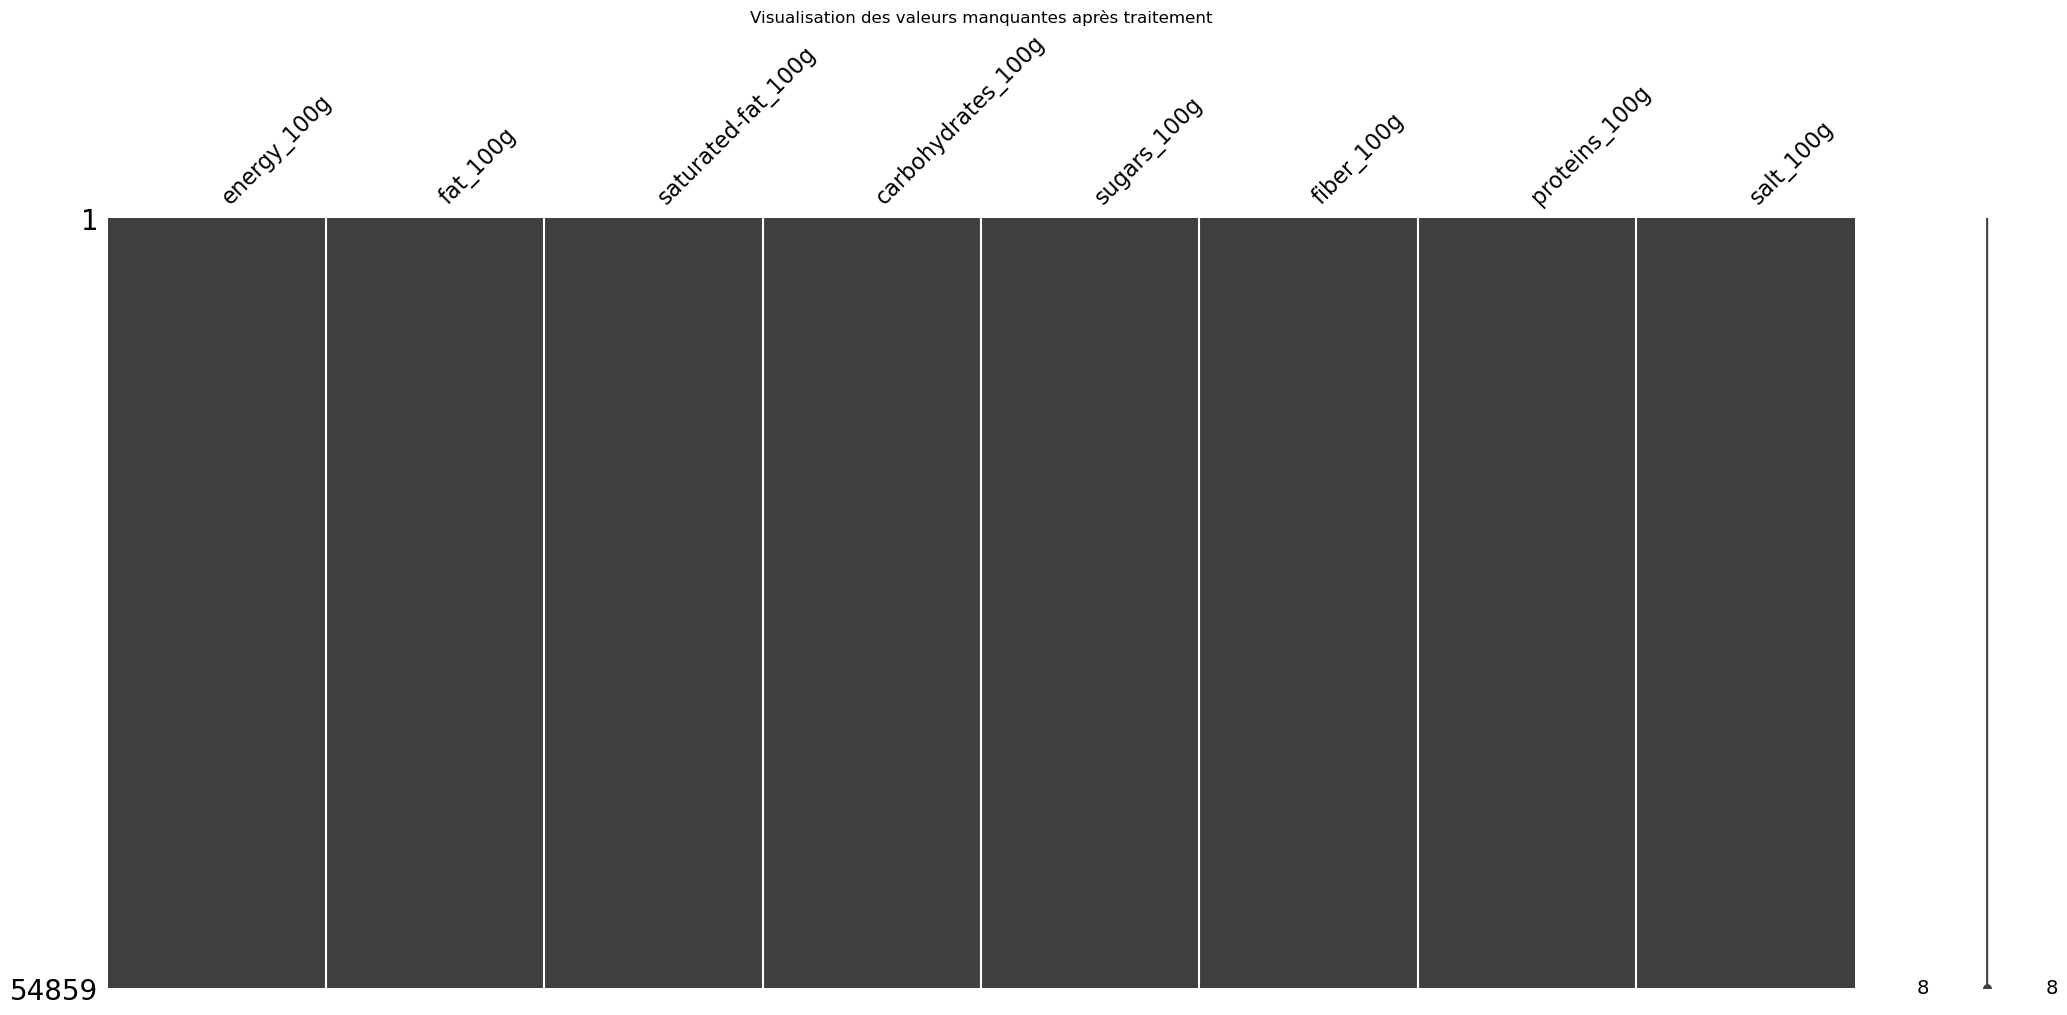

In [1261]:
!pip install missingno
import missingno as msno

# Heatmap des valeurs manquantes
msno.matrix(X)
plt.title("Visualisation des valeurs manquantes après traitement")
plt.show()

## 4.3. Sauvegarde <a id="Sauvegarde"></a>

In [1264]:
X.to_csv('C:\\Users\\matym\\Documents\\X_cleaned.csv', index=False)
y.to_csv('C:\\Users\\matym\\Documents\\y_target.csv', index=False)